## v2 after first one disappeared

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('prices250.txt')

prices = data[:,:]

# IQR investigation

<AxesSubplot:ylabel='Count'>

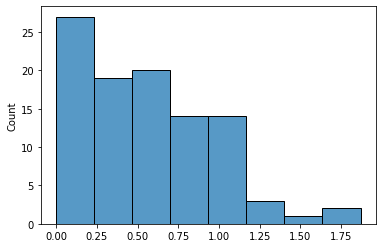

In [3]:
from scipy.stats import iqr
import seaborn as sns
iqr_data = iqr(data[221:250,], axis=0)
sns.histplot(data=iqr_data)

In [4]:
np.where(iqr_data == np.max(iqr_data))

(array([78]),)

# Correlation with straight line (monotonically increasing)

In [5]:
straight_line_ref = np.linspace(1,250,250).reshape(250,1)

In [89]:
straight_line = np.hstack((data[:,50:],straight_line_ref))

In [90]:
straight_line.shape

(250, 51)

## Focus on 10 day window for straight line

In [103]:
corr = np.corrcoef(straight_line, rowvar=False)

In [104]:
# Sort lowest to highest
np.argsort(corr[-1])

array([ 0, 14, 26,  1, 12, 40, 36,  2, 20, 10, 28, 13, 24, 43, 15,  3, 32,
       29, 22, 46, 49, 21, 31, 33, 38, 48,  5, 17, 42, 41,  7, 19, 34, 35,
       44,  8,  6,  4, 45, 11, 23, 39, 16, 30, 37, 18, 47, 27, 25,  9, 50])

In [105]:
corr[-1]

array([-6.56239913e-01, -6.49100842e-01, -6.31353690e-01, -5.70159098e-01,
       -1.37417986e-01, -4.47480304e-01, -1.38702994e-01, -4.13713266e-01,
       -3.23457702e-01,  7.52761100e-01, -6.20491902e-01,  2.62437770e-04,
       -6.46860285e-01, -5.91768063e-01, -6.56010328e-01, -5.81557357e-01,
        3.71989111e-01, -4.32911600e-01,  6.52016872e-01, -4.13033277e-01,
       -6.23536829e-01, -4.84495009e-01, -5.38380609e-01,  2.07147212e-02,
       -5.88205817e-01,  7.27446221e-01, -6.54180764e-01,  6.96093501e-01,
       -5.98479474e-01, -5.52808770e-01,  3.88944295e-01, -4.82601362e-01,
       -5.55093494e-01, -4.77224822e-01, -3.69295249e-01, -3.47932743e-01,
       -6.41925215e-01,  5.58042871e-01, -4.75452687e-01,  3.03181054e-01,
       -6.43697068e-01, -4.28450021e-01, -4.29222319e-01, -5.86393642e-01,
       -3.45409558e-01, -8.30551445e-02, -5.19942398e-01,  6.66001835e-01,
       -4.71534683e-01, -4.97794692e-01,  1.00000000e+00])

In [106]:
mono_incr = np.where(corr[-1]>0.5)

In [107]:
flat = np.where((corr[-1]>-0.2) & (corr[-1] < 0.2))

In [108]:
print(len(flat[0]))

5


In [109]:
print(len(mono_incr[0]))

7


In [110]:
mono_decr = np.where(corr[-1]<-0.5)

In [111]:
print(len(mono_decr[0]))

20


# Findings of correlation with straight line (threshold of 75%)

### 18 monotonically increasing stocks
### 15 monotonically decreasing stocks
### 10 flat

0


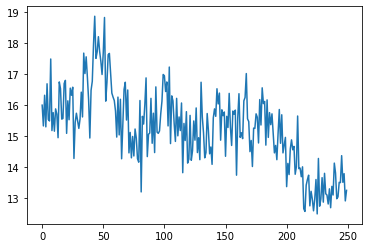

1


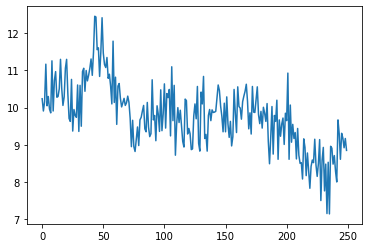

2


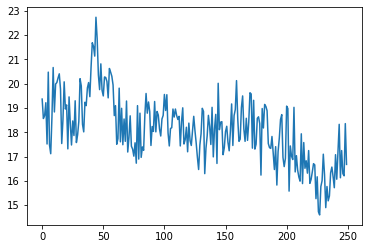

3


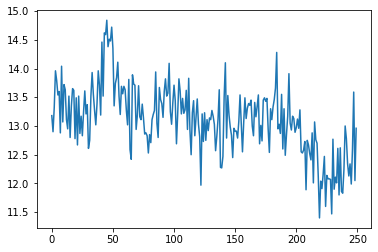

10


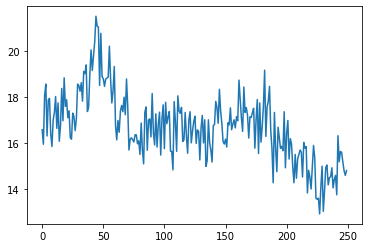

12


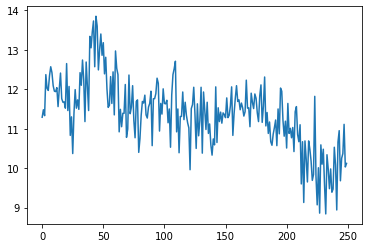

13


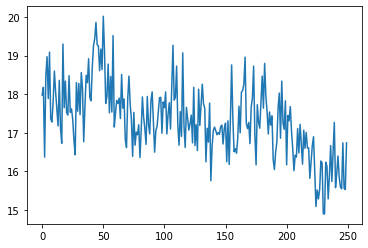

14


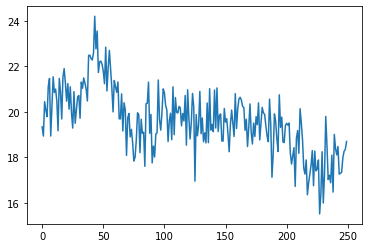

15


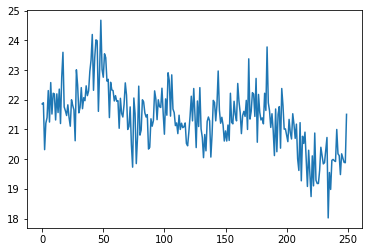

20


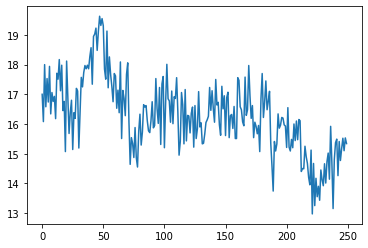

22


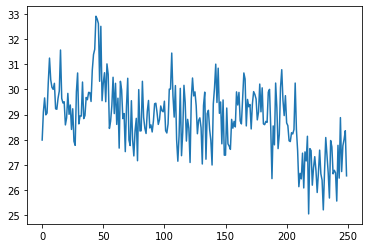

24


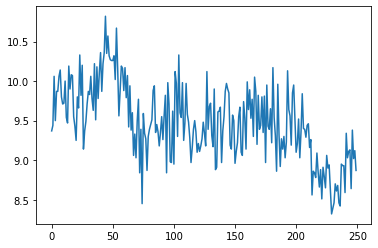

26


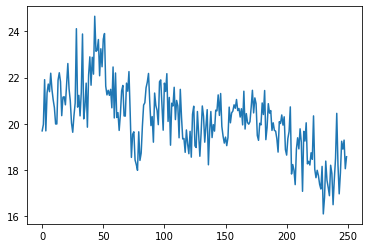

28


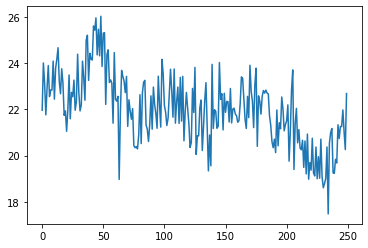

29


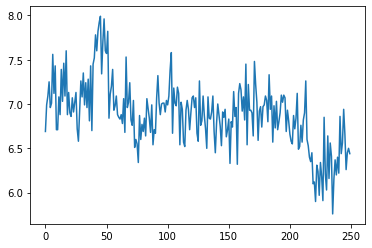

32


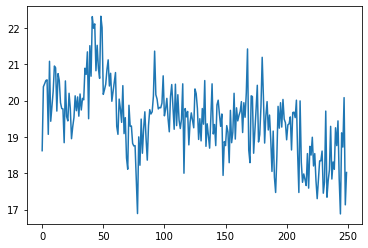

36


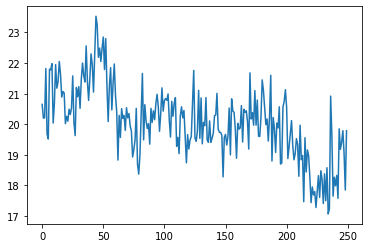

40


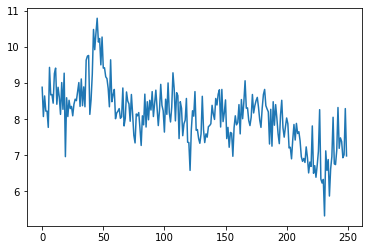

43


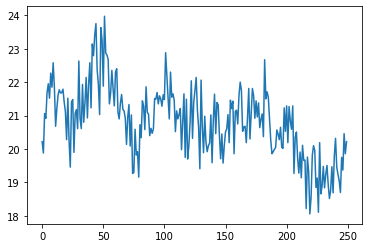

46


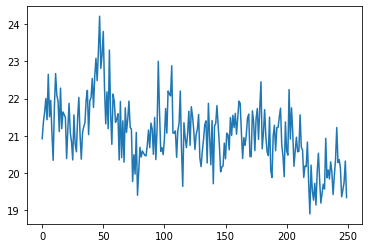

In [113]:
for index in mono_decr[0]:
    if index == 50:
        break
    sns.lineplot(data = straight_line[:,index])
    print(index)
    plt.show()

# Log experimentation

<AxesSubplot:>

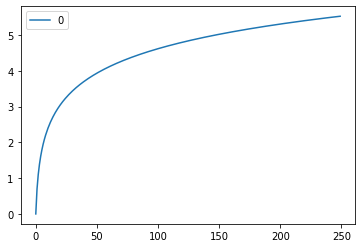

In [19]:
sns.lineplot(data = np.log(straight_line_ref))

In [211]:
log = np.hstack((data[240:250,:50],10*log_line))

In [212]:
corr = np.corrcoef(log, rowvar=False)

In [173]:
# Explore data
decr_exp = np.where(corr[-1]>0.5)
incr_exp = np.where(corr[-1]<-0.5)

no_sig_corr = np.where((corr[-1]>-0.2) & (corr[-1] < 0.2))

print("Decr: ", len(decr_exp[0]), "\nIncr: ", len(incr_exp[0]), "\nNo corr: ", len(no_sig_corr[0]))

Decr:  19 
Incr:  10 
No corr:  9


2


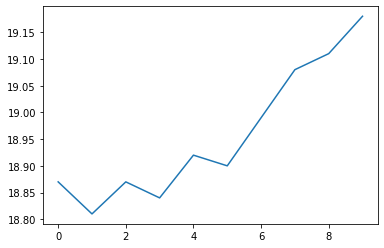

4


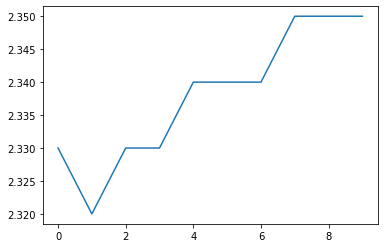

8


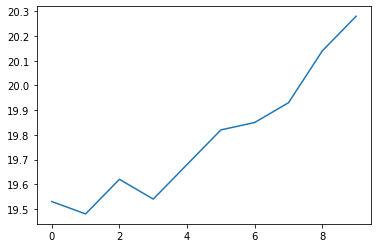

10


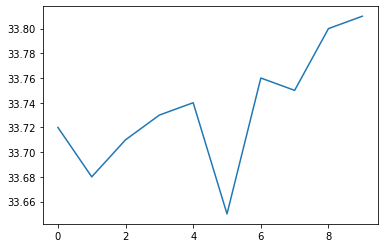

14


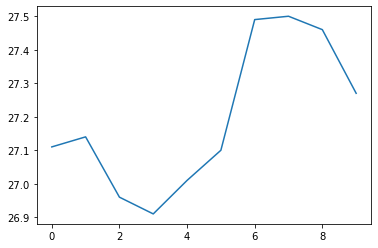

17


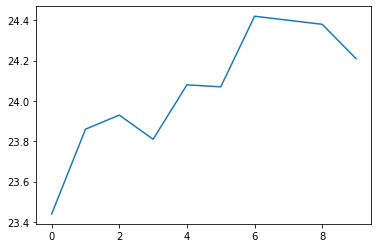

23


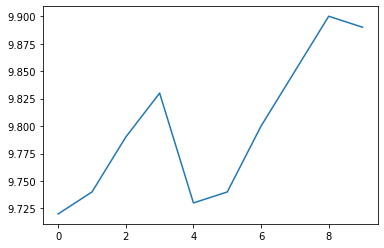

24


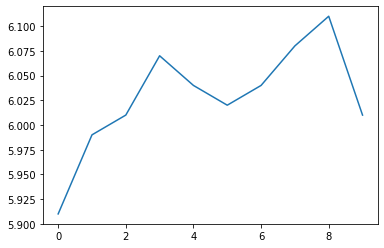

26


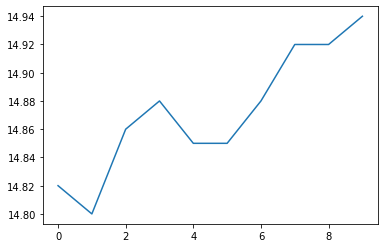

28


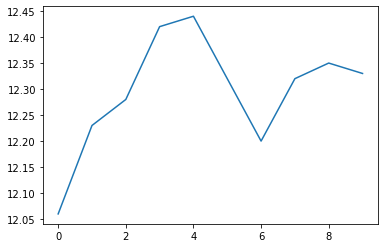

29


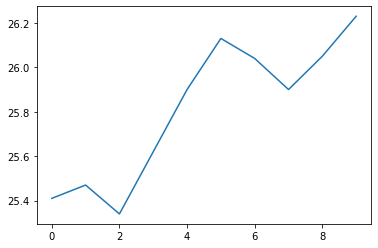

31


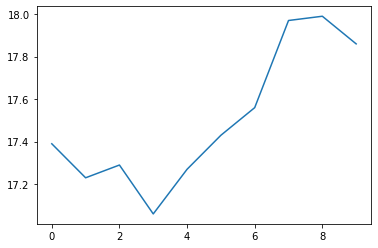

33


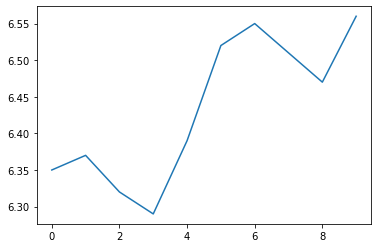

40


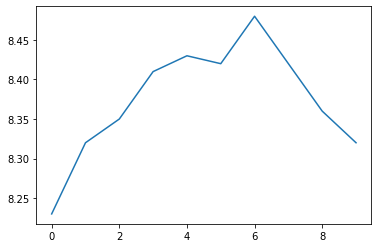

42


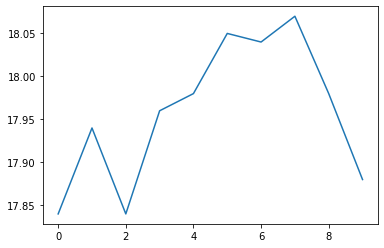

45


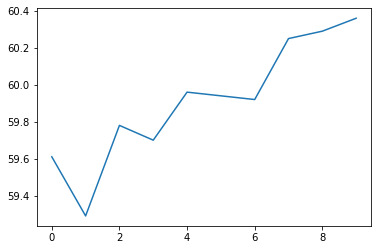

46


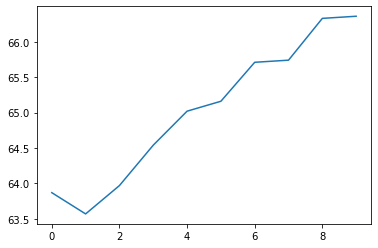

47


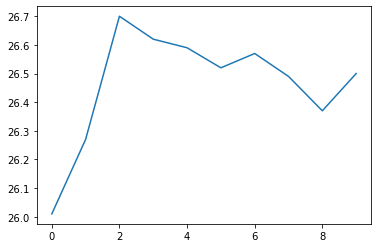

50


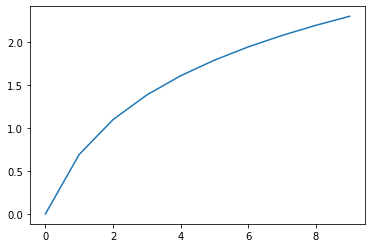

In [177]:
for index in decr_exp[0]:
    sns.lineplot(data = log[:,index])
    print(index)
    plt.show()

# Test

In [213]:
curve_or_flat = np.hstack((log,line))

In [214]:
curve_or_flat.shape

(10, 52)

<AxesSubplot:>

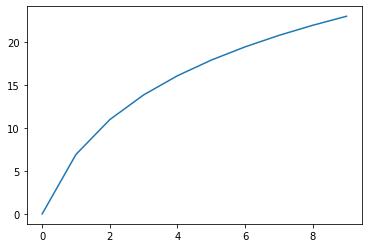

In [215]:
sns.lineplot(data=curve_or_flat[:,50])

In [232]:
corr = np.corrcoef(curve_or_flat, rowvar=False)

In [237]:
np.where(corr == np.min(corr[-2]))

(array([18, 50]), array([50, 18]))

<AxesSubplot:>

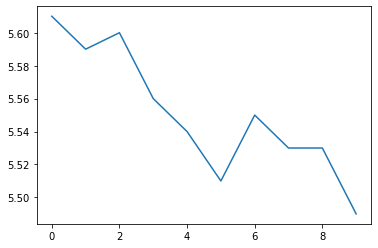

In [238]:
sns.lineplot(data=curve_or_flat[:,18])

In [228]:
up_log = np.where(corr[-2]>0.5)

log_list = []
up_list = []

for index in up_log[0]:
    if (corr[-2, index] > corr[-1, index]): log_list.append(index)
    else:up_list.append(index)

In [229]:
print(len(log_list),len(up_list))

9 11


7


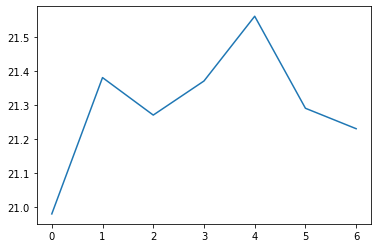

16


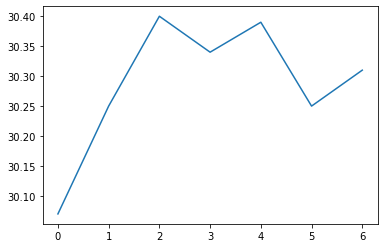

22


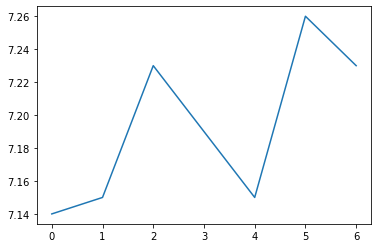

24


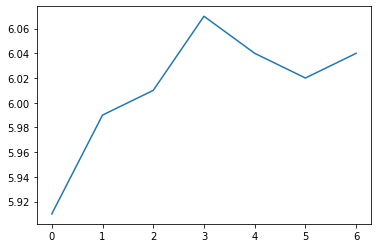

26


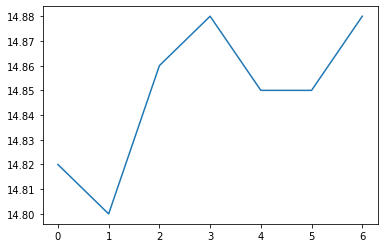

28


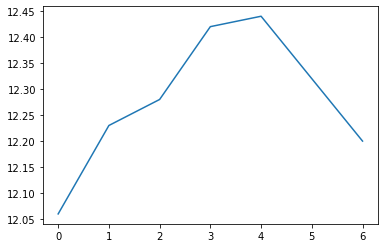

40


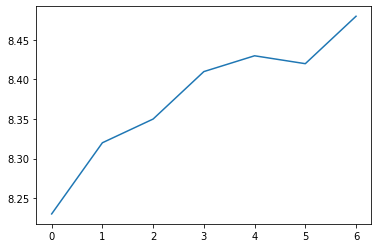

47


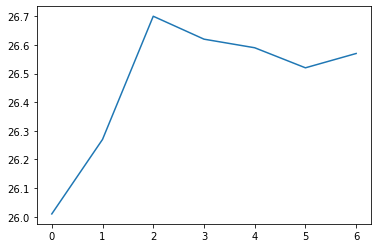

50


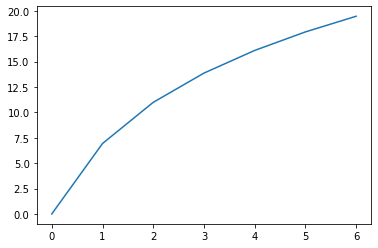

In [231]:
for index in log_list:
    sns.lineplot(data = curve_or_flat[:7,index])
    print(index)
    plt.show()

<AxesSubplot:>

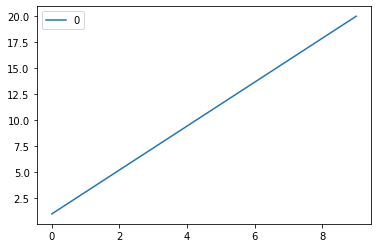

In [188]:
line = np.linspace(1,20,10).reshape(10,1)
sns.lineplot(data=line)

<AxesSubplot:>

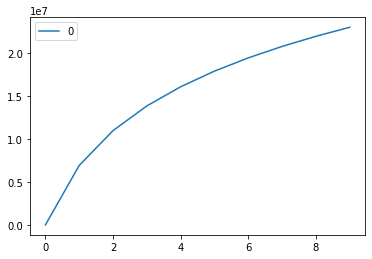

In [25]:
log_line = np.log(np.linspace(1,10,10).reshape(10,1))
sns.lineplot(data=10000000*log_line)

# Building a simple shape model

Loaded 100 instruments for 250 days


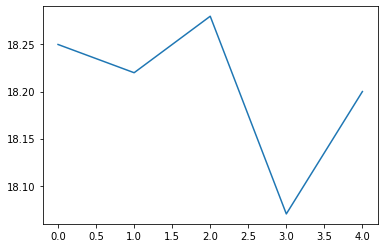

Up flat prob:  -0.3972715584944411 
Down flat prob:  0.3972715584944411 
Flat up prob:  -0.2626567276978569 
Flat down prob:  0.2626567276978569
0.0 0.0
Day 5 value: 0.00 todayPL: $0.00 $-traded: 0 return: 0.00000 frac0: 0.0000 frac1: 0.0000


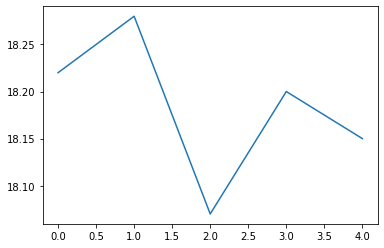

Up flat prob:  -0.41165061275991965 
Down flat prob:  0.41165061275991965 
Flat up prob:  -0.2750203306127481 
Flat down prob:  0.2750203306127481
0.0 0.0
Day 6 value: 0.00 todayPL: $0.00 $-traded: 0 return: 0.00000 frac0: 0.0000 frac1: 0.0000


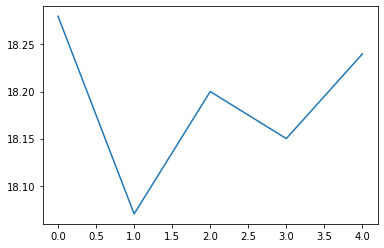

Up flat prob:  -0.42964422007191094 
Down flat prob:  0.42964422007191094 
Flat up prob:  0.29268133583049205 
Flat down prob:  -0.29268133583049205
0.0 0.0
Day 7 value: 0.00 todayPL: $0.00 $-traded: 0 return: 0.00000 frac0: 0.0000 frac1: 0.0000


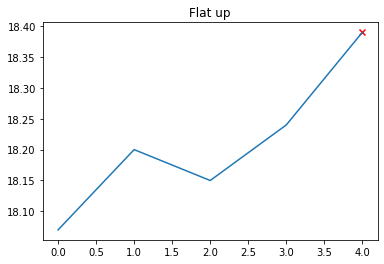

Up flat prob:  0.7338618533399529 
Down flat prob:  -0.7338618533399529 
Flat up prob:  0.9180911164843147 
Flat down prob:  -0.9180911164843147
9180.911164843148 0.0
Day 8 value: -49.93 todayPL: $-49.93 $-traded: 9986 return: -0.00500 frac0: 1.0000 frac1: 0.0000


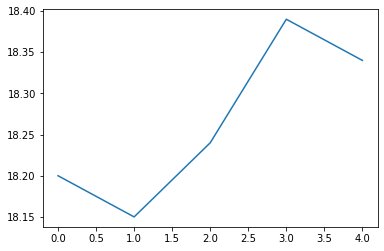

Up flat prob:  0.5743569392189037 
Down flat prob:  -0.5743569392189037 
Flat up prob:  0.6459494287984333 
Flat down prob:  -0.6459494287984333
0.0 9180.911164843148
Day 9 value: -77.26 todayPL: $-27.33 $-traded: 10022 return: -0.00771 frac0: 1.0000 frac1: 0.0000


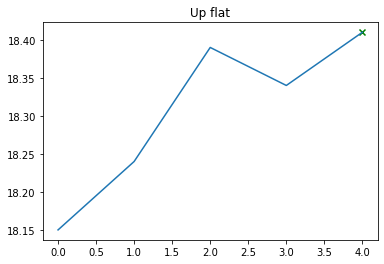

Up flat prob:  0.912328655539801 
Down flat prob:  -0.912328655539801 
Flat up prob:  0.6467024462451556 
Flat down prob:  -0.6467024462451556
-9123.28655539801 9180.911164843148
Day 10 value: -84.03 todayPL: $-6.77 $-traded: 19007 return: -0.00442 frac0: 1.0000 frac1: 0.0000


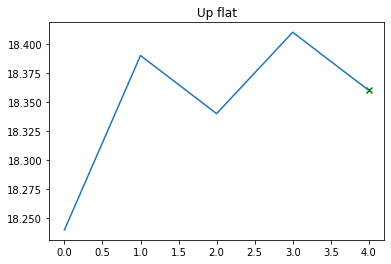

Up flat prob:  0.8607763953830811 
Down flat prob:  -0.8607763953830811 
Flat up prob:  0.26584906574880246 
Flat down prob:  -0.26584906574880246
-8607.763953830812 57.62460944513805
Day 11 value: -142.05 todayPL: $-58.02 $-traded: 30041 return: -0.00473 frac0: 1.0000 frac1: 0.0000


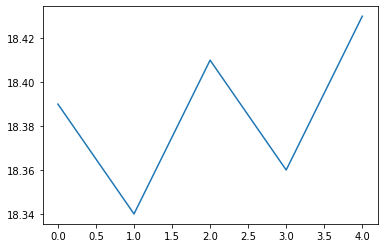

Up flat prob:  0.12346792627467712 
Down flat prob:  -0.12346792627467712 
Flat up prob:  0.6147992543428855 
Flat down prob:  -0.6147992543428855
0.0 -8550.139344385674
Day 12 value: -180.32 todayPL: $-38.26 $-traded: 30078 return: -0.00600 frac0: 1.0000 frac1: 0.0000


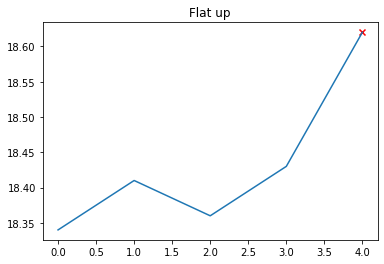

Up flat prob:  0.5541742168977651 
Down flat prob:  -0.5541742168977651 
Flat up prob:  0.9705631070601543 
Flat down prob:  -0.9705631070601543
9705.631070601543 -8550.139344385674
Day 13 value: -383.75 todayPL: $-203.43 $-traded: 50169 return: -0.00765 frac0: 1.0000 frac1: 0.0000


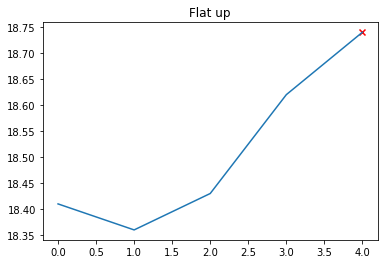

Up flat prob:  0.5503561331531076 
Down flat prob:  -0.5503561331531076 
Flat up prob:  0.920764651708425 
Flat down prob:  -0.920764651708425
9207.646517084251 1155.4917262158688
Day 14 value: -319.69 todayPL: $64.07 $-traded: 50244 return: -0.00636 frac0: 1.0000 frac1: 0.0000


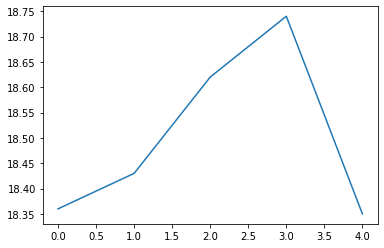

Up flat prob:  0.5050731870953205 
Down flat prob:  -0.5050731870953205 
Flat up prob:  -0.25667379545283675 
Flat down prob:  0.25667379545283675
0.0 10363.13824330012
Day 15 value: -528.57 todayPL: $-208.88 $-traded: 50446 return: -0.01048 frac0: 1.0000 frac1: 0.0000


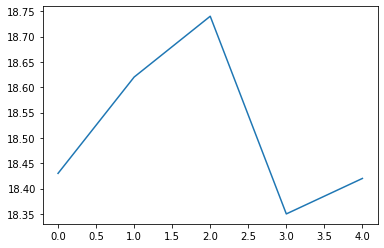

Up flat prob:  0.13577096171352204 
Down flat prob:  -0.13577096171352204 
Flat up prob:  -0.4346185123797026 
Flat down prob:  0.4346185123797026
0.0 10363.13824330012
Day 16 value: -490.67 todayPL: $37.90 $-traded: 50482 return: -0.00972 frac0: 1.0000 frac1: 0.0000


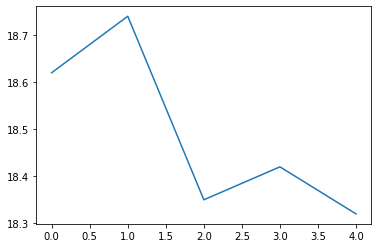

Up flat prob:  -0.6153026018430193 
Down flat prob:  0.6153026018430193 
Flat up prob:  -0.639768733883419 
Flat down prob:  0.639768733883419
0.0 10363.13824330012
Day 17 value: -545.15 todayPL: $-54.47 $-traded: 50537 return: -0.01079 frac0: 1.0000 frac1: 0.0000


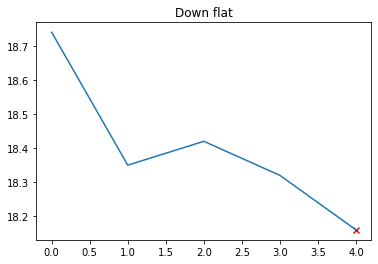

Up flat prob:  -0.9151252770622589 
Down flat prob:  0.9151252770622589 
Flat up prob:  -0.7210987307606521 
Flat down prob:  0.7210987307606521
9151.252770622588 10363.13824330012
Day 18 value: -632.80 todayPL: $-87.65 $-traded: 50628 return: -0.01250 frac0: 1.0000 frac1: 0.0000


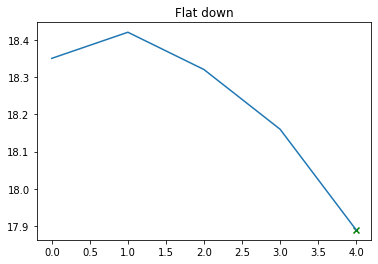

Up flat prob:  -0.511031469289215 
Down flat prob:  0.511031469289215 
Flat up prob:  -0.9746175495785885 
Flat down prob:  0.9746175495785885
-9746.175495785885 19514.39101392271
Day 19 value: -782.02 todayPL: $-149.22 $-traded: 50771 return: -0.01540 frac0: 1.0000 frac1: 0.0000


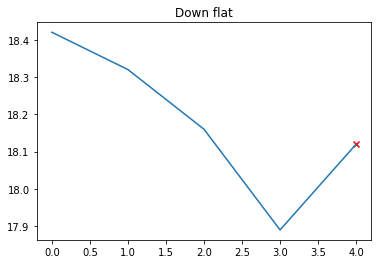

Up flat prob:  -0.790313505782104 
Down flat prob:  0.790313505782104 
Flat up prob:  -0.41986522926981457 
Flat down prob:  0.41986522926981457
7903.13505782104 9768.215518136823
Day 20 value: -654.31 todayPL: $127.71 $-traded: 50898 return: -0.01286 frac0: 1.0000 frac1: 0.0000


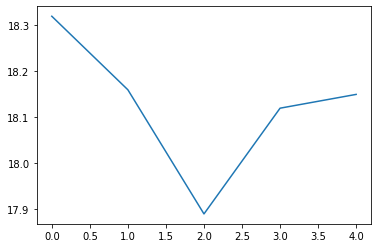

Up flat prob:  -0.7048608620383124 
Down flat prob:  0.7048608620383124 
Flat up prob:  0.008609251118912763 
Flat down prob:  -0.008609251118912763
0.0 17671.350575957862
Day 21 value: -637.87 todayPL: $16.44 $-traded: 50916 return: -0.01253 frac0: 1.0000 frac1: 0.0000


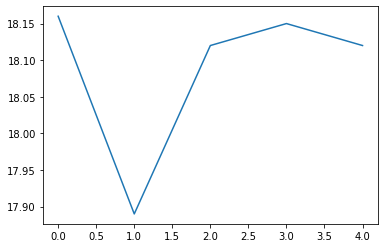

Up flat prob:  -0.10447191601256986 
Down flat prob:  0.10447191601256986 
Flat up prob:  0.25737627834506244 
Flat down prob:  -0.25737627834506244
0.0 17671.350575957862
Day 22 value: -654.46 todayPL: $-16.59 $-traded: 50934 return: -0.01285 frac0: 1.0000 frac1: 0.0000


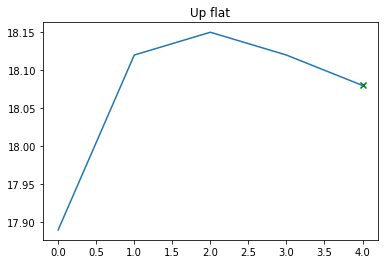

Up flat prob:  0.9179776980108343 
Down flat prob:  -0.9179776980108343 
Flat up prob:  0.16031177850461892 
Flat down prob:  -0.16031177850461892
-9179.776980108343 17671.350575957862
Day 23 value: -676.68 todayPL: $-22.22 $-traded: 50971 return: -0.01328 frac0: 1.0000 frac1: 0.0000


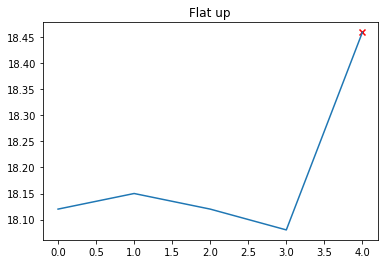

Up flat prob:  0.31769230521893926 
Down flat prob:  -0.31769230521893926 
Flat up prob:  0.9136871944863062 
Flat down prob:  -0.9136871944863062
9136.871944863062 8491.573595849519
Day 24 value: -467.65 todayPL: $209.03 $-traded: 51192 return: -0.00914 frac0: 1.0000 frac1: 0.0000


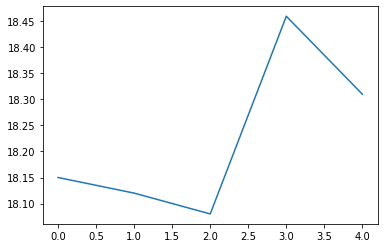

Up flat prob:  0.41414623061860817 
Down flat prob:  -0.41414623061860817 
Flat up prob:  0.5252161440658869 
Flat down prob:  -0.5252161440658869
0.0 17628.44554071258
Day 25 value: -549.26 todayPL: $-81.61 $-traded: 51284 return: -0.01071 frac0: 1.0000 frac1: 0.0000


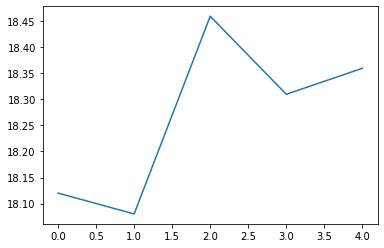

Up flat prob:  0.6733111518868566 
Down flat prob:  -0.6733111518868566 
Flat up prob:  0.4342039107594259 
Flat down prob:  -0.4342039107594259
0.0 17628.44554071258
Day 26 value: -522.14 todayPL: $27.12 $-traded: 51320 return: -0.01017 frac0: 1.0000 frac1: 0.0000


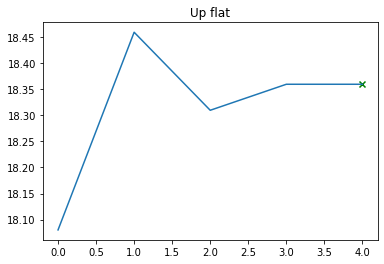

Up flat prob:  0.8070783524839924 
Down flat prob:  -0.8070783524839924 
Flat up prob:  0.2563798084369162 
Flat down prob:  -0.2563798084369162
-8070.783524839924 17628.44554071258
Day 27 value: -522.14 todayPL: $0.00 $-traded: 51320 return: -0.01017 frac0: 1.0000 frac1: 0.0000


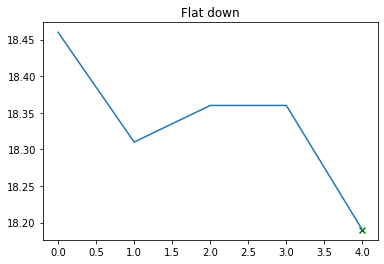

Up flat prob:  -0.7202178433844516 
Down flat prob:  0.7202178433844516 
Flat up prob:  -0.8350376721290542 
Flat down prob:  0.8350376721290542
-8350.376721290542 9557.662015872655
Day 28 value: -615.08 todayPL: $-92.93 $-traded: 51411 return: -0.01196 frac0: 1.0000 frac1: 0.0000


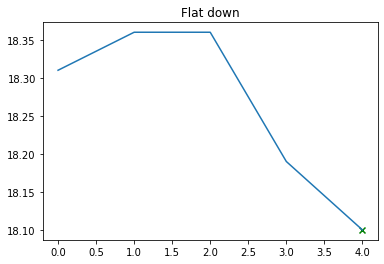

Up flat prob:  -0.4086281210305113 
Down flat prob:  0.4086281210305113 
Flat up prob:  -0.9092165042093575 
Flat down prob:  0.9092165042093575
-9092.165042093575 1207.2852945821123
Day 29 value: -764.13 todayPL: $-149.05 $-traded: 71339 return: -0.01071 frac0: 1.0000 frac1: 0.0000


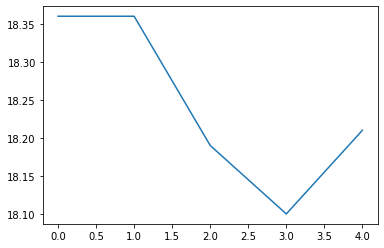

Up flat prob:  -0.7430441078580228 
Down flat prob:  0.7430441078580228 
Flat up prob:  -0.4009228205689726 
Flat down prob:  0.4009228205689726
0.0 -7884.8797475114625
Day 30 value: -825.12 todayPL: $-60.99 $-traded: 71394 return: -0.01156 frac0: 1.0000 frac1: 0.0000


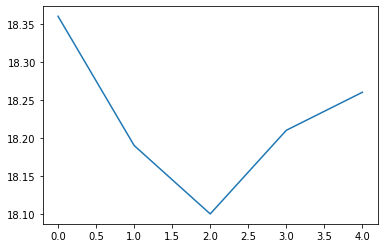

Up flat prob:  -0.726473755492819 
Down flat prob:  0.726473755492819 
Flat up prob:  0.1373308295477661 
Flat down prob:  -0.1373308295477661
0.0 -7884.8797475114625
Day 31 value: -852.75 todayPL: $-27.63 $-traded: 71431 return: -0.01194 frac0: 1.0000 frac1: 0.0000


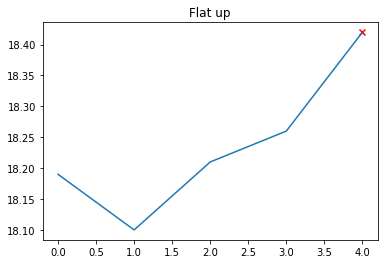

Up flat prob:  0.4324814558807525 
Down flat prob:  -0.4324814558807525 
Flat up prob:  0.9392156458570533 
Flat down prob:  -0.9392156458570533
9392.156458570533 -7884.8797475114625
Day 32 value: -1040.57 todayPL: $-187.82 $-traded: 91490 return: -0.01137 frac0: 1.0000 frac1: 0.0000


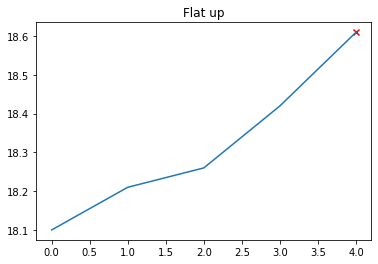

Up flat prob:  0.7587188375481242 
Down flat prob:  -0.7587188375481242 
Flat up prob:  0.9318105058528734 
Flat down prob:  -0.9318105058528734
9318.105058528734 1507.2767110590703
Day 33 value: -938.05 todayPL: $102.51 $-traded: 91583 return: -0.01024 frac0: 1.0000 frac1: 0.0000


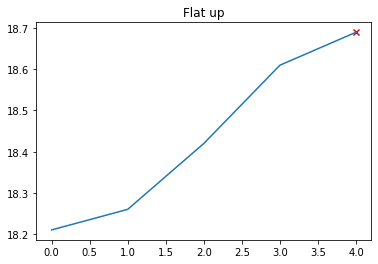

Up flat prob:  0.7814052156230156 
Down flat prob:  -0.7814052156230156 
Flat up prob:  0.8364313786985527 
Flat down prob:  -0.8364313786985527
8364.313786985527 10825.381769587804
Day 34 value: -895.28 todayPL: $42.77 $-traded: 91620 return: -0.00977 frac0: 1.0000 frac1: 0.0000


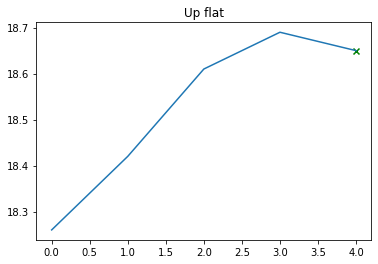

Up flat prob:  0.9405854540625072 
Down flat prob:  -0.9405854540625072 
Flat up prob:  0.5733599963369943 
Flat down prob:  -0.5733599963369943
-9405.854540625072 19189.69555657333
Day 35 value: -916.77 todayPL: $-21.49 $-traded: 91639 return: -0.01000 frac0: 1.0000 frac1: 0.0000


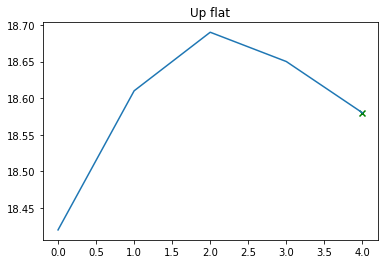

Up flat prob:  0.8930115118197651 
Down flat prob:  -0.8930115118197651 
Flat up prob:  0.08498332439417218 
Flat down prob:  -0.08498332439417218
-8930.115118197651 9783.841015948257
Day 36 value: -954.48 todayPL: $-37.71 $-traded: 91676 return: -0.01041 frac0: 1.0000 frac1: 0.0000


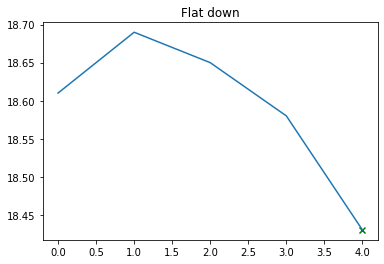

Up flat prob:  -0.29720783168531706 
Down flat prob:  0.29720783168531706 
Flat up prob:  -0.950850309685627 
Flat down prob:  0.950850309685627
-9508.50309685627 853.7258977506062
Day 37 value: -1134.70 todayPL: $-180.22 $-traded: 111581 return: -0.01017 frac0: 1.0000 frac1: 0.0000


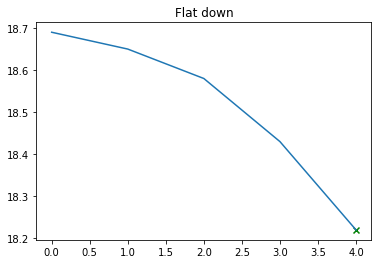

Up flat prob:  -0.6748844759812819 
Down flat prob:  0.6748844759812819 
Flat up prob:  -0.9612666860556086 
Flat down prob:  0.9612666860556086
-9612.666860556086 -8654.777199105663
Day 38 value: -1021.43 todayPL: $113.27 $-traded: 111690 return: -0.00915 frac0: 1.0000 frac1: 0.0000


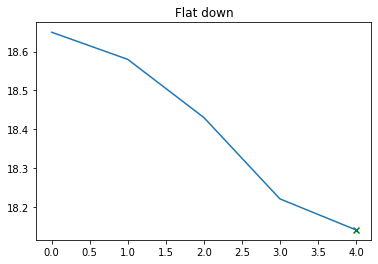

Up flat prob:  -0.7912061703624618 
Down flat prob:  0.7912061703624618 
Flat up prob:  -0.8353938040974587 
Flat down prob:  0.8353938040974587
-8353.938040974586 -18267.44405966175
Day 39 value: -977.86 todayPL: $43.57 $-traded: 111744 return: -0.00875 frac0: 1.0000 frac1: 0.0000


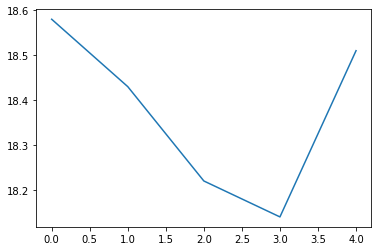

Up flat prob:  -0.6404789906449059 
Down flat prob:  0.6404789906449059 
Flat up prob:  0.17825260923679748 
Flat down prob:  -0.17825260923679748
0.0 -26621.382100636336
Day 40 value: -1182.75 todayPL: $-204.89 $-traded: 111948 return: -0.01057 frac0: 1.0000 frac1: 0.0000


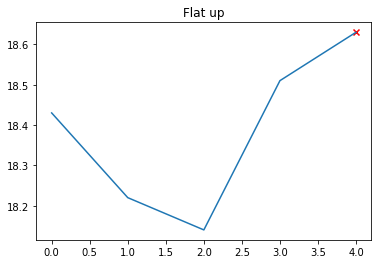

Up flat prob:  0.05656462398276709 
Down flat prob:  -0.05656462398276709 
Flat up prob:  0.7536848905930732 
Flat down prob:  -0.7536848905930732
7536.848905930732 -26621.382100636336
Day 41 value: -1247.92 todayPL: $-65.17 $-traded: 112022 return: -0.01114 frac0: 1.0000 frac1: 0.0000


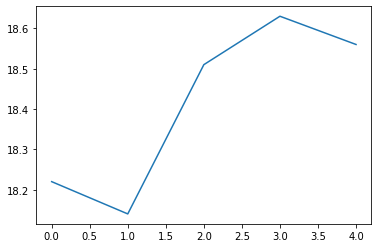

Up flat prob:  0.7024990716655614 
Down flat prob:  -0.7024990716655614 
Flat up prob:  0.579037466978542 
Flat down prob:  -0.579037466978542
0.0 -19084.533194705604
Day 42 value: -1210.59 todayPL: $37.33 $-traded: 112060 return: -0.01080 frac0: 1.0000 frac1: 0.0000


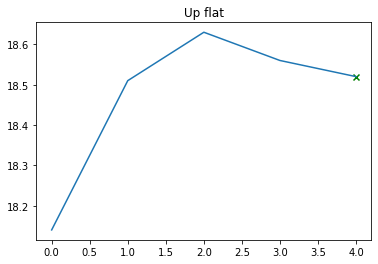

Up flat prob:  0.9555046866381913 
Down flat prob:  -0.9555046866381913 
Flat up prob:  0.2651300200385908 
Flat down prob:  -0.2651300200385908
-9555.046866381914 -19084.533194705604
Day 43 value: -1189.16 todayPL: $21.43 $-traded: 112078 return: -0.01061 frac0: 1.0000 frac1: 0.0000


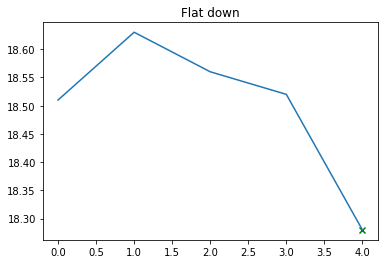

Up flat prob:  -0.23242950198084955 
Down flat prob:  0.23242950198084955 
Flat up prob:  -0.9369200364746801 
Flat down prob:  0.9369200364746801
-9369.200364746801 -28639.580061087516
Day 44 value: -1060.53 todayPL: $128.63 $-traded: 112224 return: -0.00945 frac0: 1.0000 frac1: 0.0000


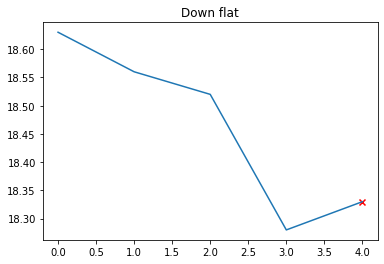

Up flat prob:  -0.7622304582252794 
Down flat prob:  0.7622304582252794 
Flat up prob:  -0.70639966774002 
Flat down prob:  0.70639966774002
7622.304582252794 -38008.78042583432
Day 45 value: -1088.06 todayPL: $-27.53 $-traded: 112261 return: -0.00969 frac0: 1.0000 frac1: 0.0000


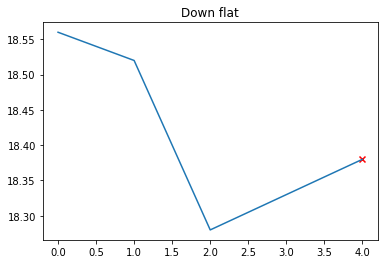

Up flat prob:  -0.8059101856901857 
Down flat prob:  0.8059101856901857 
Flat up prob:  -0.3239592259368927 
Flat down prob:  0.3239592259368927
8059.101856901857 -30386.475843581524
Day 46 value: -1115.41 todayPL: $-27.34 $-traded: 112279 return: -0.00993 frac0: 1.0000 frac1: 0.0000


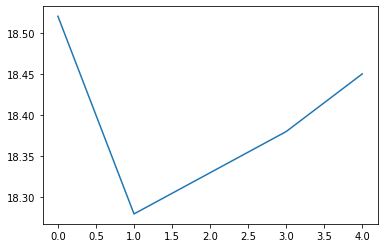

Up flat prob:  -0.5713845756930719 
Down flat prob:  0.5713845756930719 
Flat up prob:  0.29974115095189857 
Flat down prob:  -0.29974115095189857
0.0 -22327.373986679668
Day 47 value: -1153.67 todayPL: $-38.26 $-traded: 112316 return: -0.01027 frac0: 1.0000 frac1: 0.0000


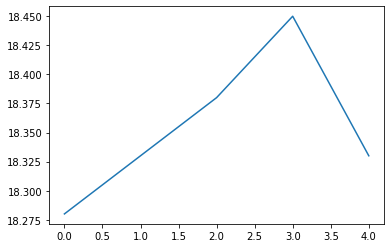

Up flat prob:  0.7137320642472852 
Down flat prob:  -0.7137320642472852 
Flat up prob:  0.04260864507692064 
Flat down prob:  -0.04260864507692064
0.0 -22327.373986679668
Day 48 value: -1088.91 todayPL: $64.77 $-traded: 112371 return: -0.00969 frac0: 1.0000 frac1: 0.0000


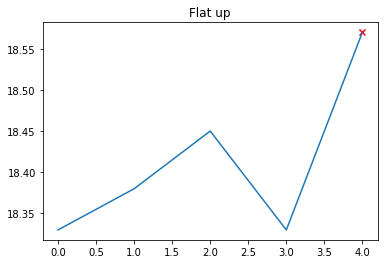

Up flat prob:  0.5263322632443779 
Down flat prob:  -0.5263322632443779 
Flat up prob:  0.8069707202125016 
Flat down prob:  -0.8069707202125016
8069.707202125016 -22327.373986679668
Day 49 value: -1220.36 todayPL: $-131.45 $-traded: 112501 return: -0.01085 frac0: 1.0000 frac1: 0.0000


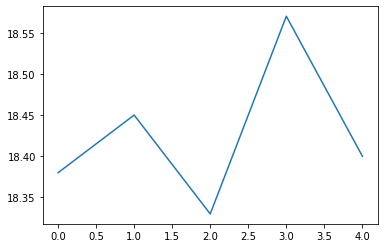

Up flat prob:  0.2871443126095689 
Down flat prob:  -0.2871443126095689 
Flat up prob:  0.050035797601690336 
Flat down prob:  -0.050035797601690336
0.0 -14257.66678455465
Day 50 value: -1129.36 todayPL: $91.00 $-traded: 112593 return: -0.01003 frac0: 1.0000 frac1: 0.0000


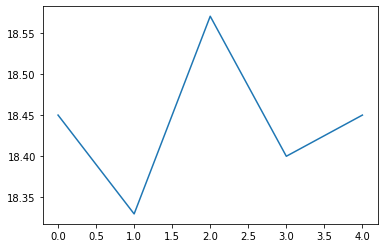

Up flat prob:  0.07991388755181346 
Down flat prob:  -0.07991388755181346 
Flat up prob:  0.04563367293718324 
Flat down prob:  -0.04563367293718324
0.0 -14257.66678455465
Day 51 value: -1156.60 todayPL: $-27.24 $-traded: 112612 return: -0.01027 frac0: 1.0000 frac1: 0.0000


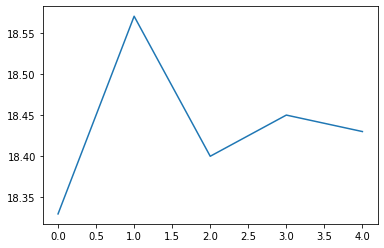

Up flat prob:  0.4798870007809438 
Down flat prob:  -0.4798870007809438 
Flat up prob:  -0.017118541577763248 
Flat down prob:  0.017118541577763248
0.0 -14257.66678455465
Day 52 value: -1145.76 todayPL: $10.84 $-traded: 112612 return: -0.01017 frac0: 1.0000 frac1: 0.0000


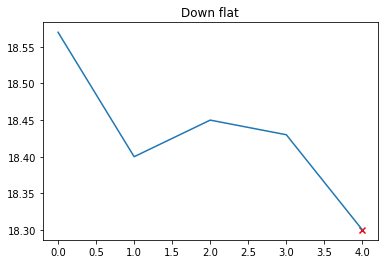

Up flat prob:  -0.8136549454957054 
Down flat prob:  0.8136549454957054 
Flat up prob:  -0.7887221247932843 
Flat down prob:  0.7887221247932843
8136.549454957054 -14257.66678455465
Day 53 value: -1075.66 todayPL: $70.09 $-traded: 112685 return: -0.00955 frac0: 1.0000 frac1: 0.0000


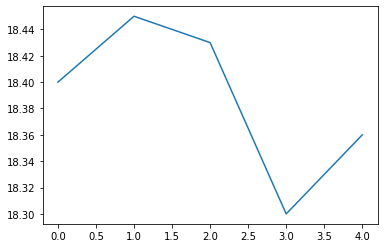

Up flat prob:  -0.31001654303120313 
Down flat prob:  0.31001654303120313 
Flat up prob:  -0.4830225853669855 
Flat down prob:  0.4830225853669855
0.0 -6121.117329597597
Day 54 value: -1108.61 todayPL: $-32.94 $-traded: 112722 return: -0.00983 frac0: 1.0000 frac1: 0.0000


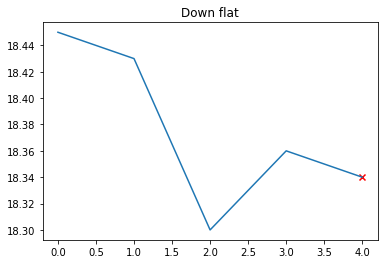

Up flat prob:  -0.788639169350727 
Down flat prob:  0.788639169350727 
Flat up prob:  -0.43008869675537986 
Flat down prob:  0.43008869675537986
7886.391693507269 -6121.117329597597
Day 55 value: -1197.59 todayPL: $-88.98 $-traded: 132694 return: -0.00903 frac0: 1.0000 frac1: 0.0000


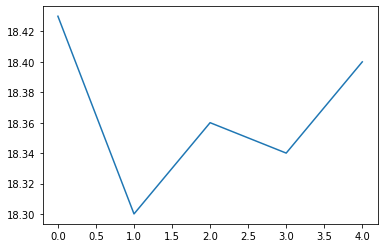

Up flat prob:  -0.5209414226942716 
Down flat prob:  0.5209414226942716 
Flat up prob:  0.29380754825490984 
Flat down prob:  -0.29380754825490984
0.0 1765.2743639096725
Day 56 value: -1165.07 todayPL: $32.52 $-traded: 132731 return: -0.00878 frac0: 1.0000 frac1: 0.0000


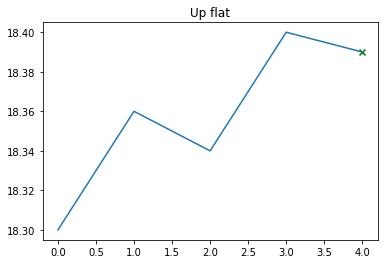

Up flat prob:  0.8579229354621841 
Down flat prob:  -0.8579229354621841 
Flat up prob:  0.6276227702456917 
Flat down prob:  -0.6276227702456917
-8579.22935462184 1765.2743639096725
Day 57 value: -1270.36 todayPL: $-105.29 $-traded: 152702 return: -0.00832 frac0: 1.0000 frac1: 0.0000


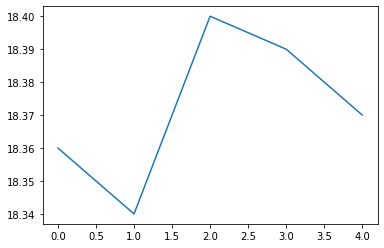

Up flat prob:  0.4627152978333108 
Down flat prob:  -0.4627152978333108 
Flat up prob:  0.11585580425366328 
Flat down prob:  -0.11585580425366328
0.0 -6813.954990712168
Day 58 value: -1259.59 todayPL: $10.77 $-traded: 152721 return: -0.00825 frac0: 1.0000 frac1: 0.0000


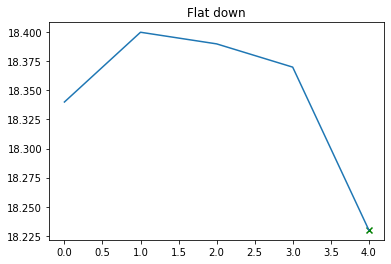

Up flat prob:  -0.11195106731330735 
Down flat prob:  0.11195106731330735 
Flat up prob:  -0.9074079412516823 
Flat down prob:  0.9074079412516823
-9074.079412516823 -6813.954990712168
Day 59 value: -1183.80 todayPL: $75.80 $-traded: 152793 return: -0.00775 frac0: 1.0000 frac1: 0.0000


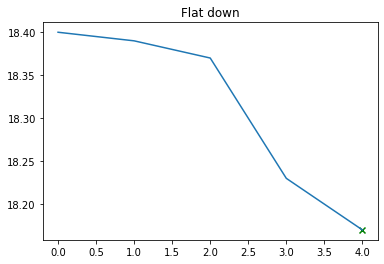

Up flat prob:  -0.6397533176183847 
Down flat prob:  0.6397533176183847 
Flat up prob:  -0.9024547900856544 
Flat down prob:  0.9024547900856544
-9024.547900856543 -15888.03440322899
Day 60 value: -1151.10 todayPL: $32.70 $-traded: 152830 return: -0.00753 frac0: 1.0000 frac1: 0.0000


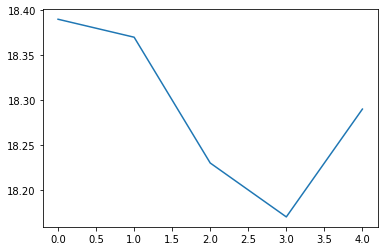

Up flat prob:  -0.7432300686801399 
Down flat prob:  0.7432300686801399 
Flat up prob:  -0.23715637502770912 
Flat down prob:  0.23715637502770912
0.0 -24912.582304085532
Day 61 value: -1217.46 todayPL: $-66.37 $-traded: 152903 return: -0.00796 frac0: 1.0000 frac1: 0.0000


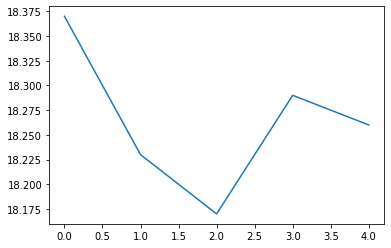

Up flat prob:  -0.7205132684012284 
Down flat prob:  0.7205132684012284 
Flat up prob:  -0.03518393456111634 
Flat down prob:  0.03518393456111634
0.0 -24912.582304085532
Day 62 value: -1201.18 todayPL: $16.29 $-traded: 152921 return: -0.00785 frac0: 1.0000 frac1: 0.0000


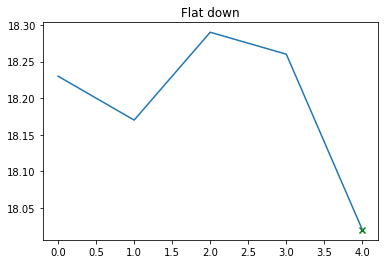

Up flat prob:  -0.20925783050122634 
Down flat prob:  0.20925783050122634 
Flat up prob:  -0.8258201566966845 
Flat down prob:  0.8258201566966845
-8258.201566966845 -24912.582304085532
Day 63 value: -1070.53 todayPL: $130.65 $-traded: 153047 return: -0.00699 frac0: 1.0000 frac1: 0.0000


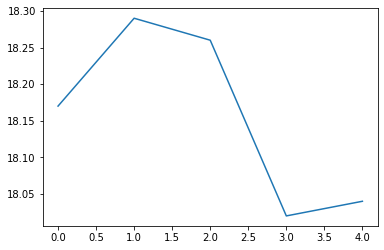

Up flat prob:  -0.27615526303632115 
Down flat prob:  0.27615526303632115 
Flat up prob:  -0.6943205540738266 
Flat down prob:  0.6943205540738266
0.0 -33170.78387105238
Day 64 value: -1081.61 todayPL: $-11.08 $-traded: 153047 return: -0.00707 frac0: 1.0000 frac1: 0.0000


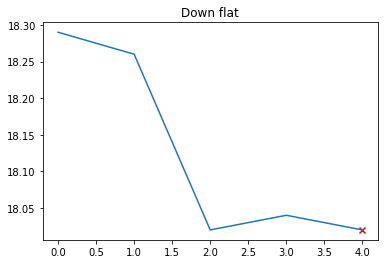

Up flat prob:  -0.8361059173917413 
Down flat prob:  0.8361059173917413 
Flat up prob:  -0.5914755270272648 
Flat down prob:  0.5914755270272648
8361.059173917414 -33170.78387105238
Day 65 value: -1070.53 todayPL: $11.08 $-traded: 153047 return: -0.00699 frac0: 1.0000 frac1: 0.0000


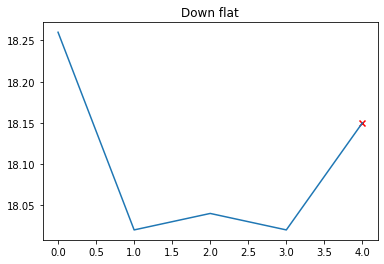

Up flat prob:  -0.7570938008001787 
Down flat prob:  0.7570938008001787 
Flat up prob:  0.13704571493692877 
Flat down prob:  -0.13704571493692877
7570.938008001787 -24809.724697134967
Day 66 value: -1142.91 todayPL: $-72.38 $-traded: 153120 return: -0.00746 frac0: 1.0000 frac1: 0.0000


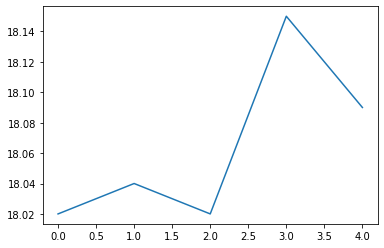

Up flat prob:  0.5593310008276859 
Down flat prob:  -0.5593310008276859 
Flat up prob:  0.49383131239738465 
Flat down prob:  -0.49383131239738465
0.0 -17238.78668913318
Day 67 value: -1110.09 todayPL: $32.82 $-traded: 153156 return: -0.00725 frac0: 1.0000 frac1: 0.0000


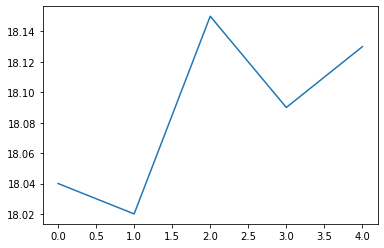

Up flat prob:  0.6339424269781654 
Down flat prob:  -0.6339424269781654 
Flat up prob:  0.5191884944068649 
Flat down prob:  -0.5191884944068649
0.0 -17238.78668913318
Day 68 value: -1132.26 todayPL: $-22.17 $-traded: 153174 return: -0.00739 frac0: 1.0000 frac1: 0.0000


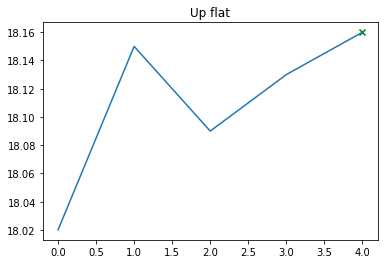

Up flat prob:  0.8332191098258191 
Down flat prob:  -0.8332191098258191 
Flat up prob:  0.5712938699774404 
Flat down prob:  -0.5712938699774404
-8332.191098258192 -17238.78668913318
Day 69 value: -1148.88 todayPL: $-16.62 $-traded: 153192 return: -0.00750 frac0: 1.0000 frac1: 0.0000


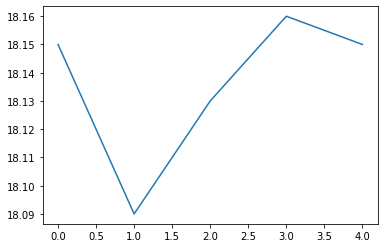

Up flat prob:  -0.021149628939100745 
Down flat prob:  0.021149628939100745 
Flat up prob:  0.4156126891421179 
Flat down prob:  -0.4156126891421179
0.0 -25570.97778739137
Day 70 value: -1143.38 todayPL: $5.50 $-traded: 153192 return: -0.00746 frac0: 1.0000 frac1: 0.0000


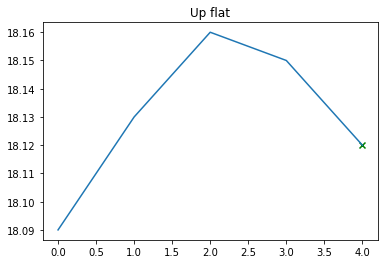

Up flat prob:  0.8114614406282743 
Down flat prob:  -0.8114614406282743 
Flat up prob:  -0.0453837451745255 
Flat down prob:  0.0453837451745255
-8114.614406282743 -25570.97778739137
Day 71 value: -1126.97 todayPL: $16.41 $-traded: 153211 return: -0.00736 frac0: 1.0000 frac1: 0.0000


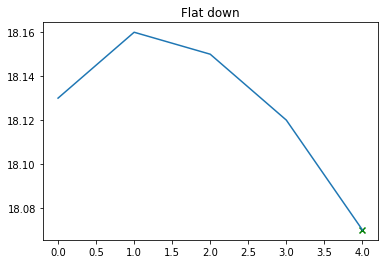

Up flat prob:  -0.2592421936248341 
Down flat prob:  0.2592421936248341 
Flat up prob:  -0.9371701623547664 
Flat down prob:  0.9371701623547664
-9371.701623547664 -33685.592193674114
Day 72 value: -1099.60 todayPL: $27.37 $-traded: 153247 return: -0.00718 frac0: 1.0000 frac1: 0.0000


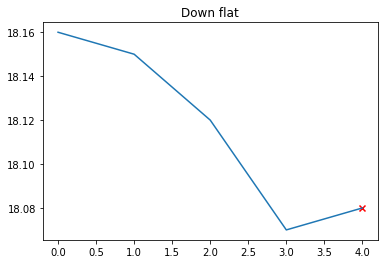

Up flat prob:  -0.7818253068202357 
Down flat prob:  0.7818253068202357 
Flat up prob:  -0.707855374008633 
Flat down prob:  0.707855374008633
7818.253068202356 -43057.29381722178
Day 73 value: -1105.13 todayPL: $-5.53 $-traded: 153247 return: -0.00721 frac0: 1.0000 frac1: 0.0000


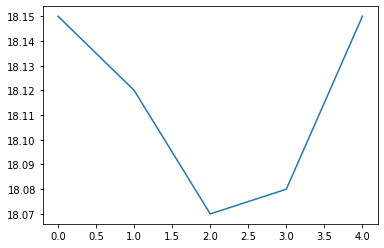

Up flat prob:  -0.5309443432063575 
Down flat prob:  0.5309443432063575 
Flat up prob:  0.36446989903494215 
Flat down prob:  -0.36446989903494215
0.0 -35239.04074901942
Day 74 value: -1144.12 todayPL: $-38.98 $-traded: 153301 return: -0.00746 frac0: 1.0000 frac1: 0.0000


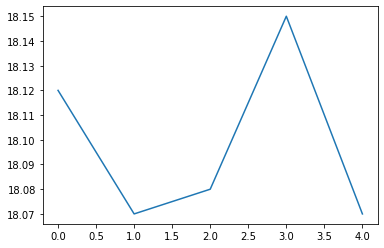

Up flat prob:  -0.2272818059411976 
Down flat prob:  0.2272818059411976 
Flat up prob:  -0.25339348844221216 
Flat down prob:  0.25339348844221216
0.0 -35239.04074901942
Day 75 value: -1100.39 todayPL: $43.73 $-traded: 153355 return: -0.00718 frac0: 1.0000 frac1: 0.0000


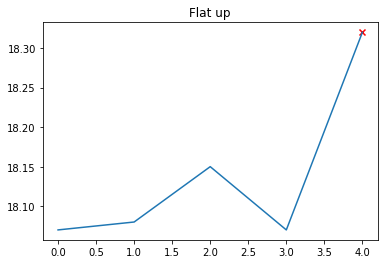

Up flat prob:  0.46940259147266694 
Down flat prob:  -0.46940259147266694 
Flat up prob:  0.9034354498276684 
Flat down prob:  -0.9034354498276684
9034.354498276683 -35239.04074901942
Day 76 value: -1239.37 todayPL: $-138.98 $-traded: 153502 return: -0.00807 frac0: 1.0000 frac1: 0.0000


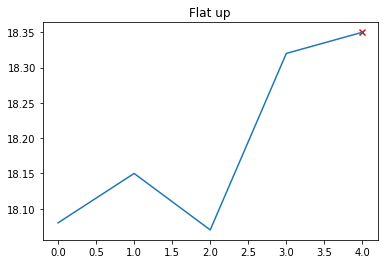

Up flat prob:  0.5984065348142976 
Down flat prob:  -0.5984065348142976 
Flat up prob:  0.8118065967836344 
Flat down prob:  -0.8118065967836344
8118.0659678363445 -26204.686250742736
Day 77 value: -1255.81 todayPL: $-16.44 $-traded: 153520 return: -0.00818 frac0: 1.0000 frac1: 0.0000


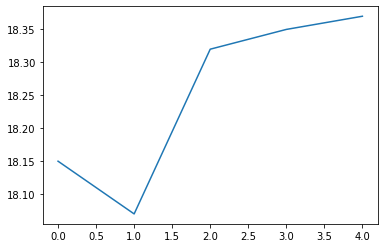

Up flat prob:  0.6502833172576103 
Down flat prob:  -0.6502833172576103 
Flat up prob:  0.655779629059522 
Flat down prob:  -0.655779629059522
0.0 -18086.62028290639
Day 78 value: -1266.69 todayPL: $-10.88 $-traded: 153520 return: -0.00825 frac0: 1.0000 frac1: 0.0000


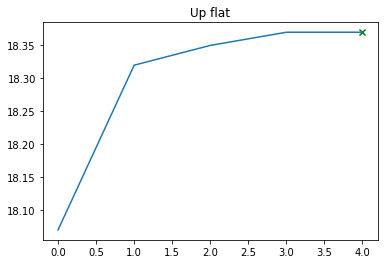

Up flat prob:  0.9934039323188484 
Down flat prob:  -0.9934039323188484 
Flat up prob:  0.4613962281207153 
Flat down prob:  -0.4613962281207153
-9934.039323188485 -18086.62028290639
Day 79 value: -1266.69 todayPL: $0.00 $-traded: 153520 return: -0.00825 frac0: 1.0000 frac1: 0.0000


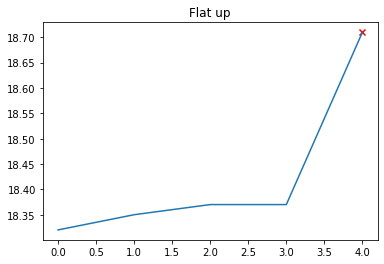

Up flat prob:  0.4788653678789762 
Down flat prob:  -0.4788653678789762 
Flat up prob:  0.9788988643900642 
Flat down prob:  -0.9788988643900642
9788.988643900642 -28020.659606094876
Day 80 value: -1452.59 todayPL: $-185.90 $-traded: 153707 return: -0.00945 frac0: 1.0000 frac1: 0.0000


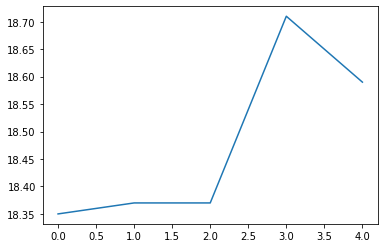

Up flat prob:  0.5938374517600795 
Down flat prob:  -0.5938374517600795 
Flat up prob:  0.6107585702901959 
Flat down prob:  -0.6107585702901959
0.0 -18231.670962194235
Day 81 value: -1388.79 todayPL: $63.80 $-traded: 153763 return: -0.00903 frac0: 1.0000 frac1: 0.0000


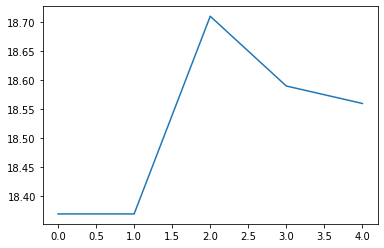

Up flat prob:  0.7095560917691525 
Down flat prob:  -0.7095560917691525 
Flat up prob:  0.28757357891015284 
Flat down prob:  -0.28757357891015284
0.0 -18231.670962194235
Day 82 value: -1372.77 todayPL: $16.02 $-traded: 153782 return: -0.00893 frac0: 1.0000 frac1: 0.0000


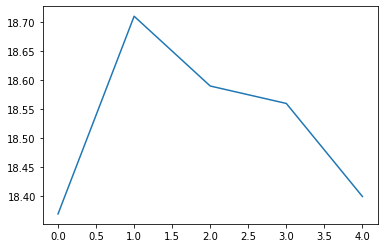

Up flat prob:  0.41680810298678955 
Down flat prob:  -0.41680810298678955 
Flat up prob:  -0.457818692820616 
Flat down prob:  0.457818692820616
0.0 -18231.670962194235
Day 83 value: -1287.15 todayPL: $85.62 $-traded: 153874 return: -0.00836 frac0: 1.0000 frac1: 0.0000


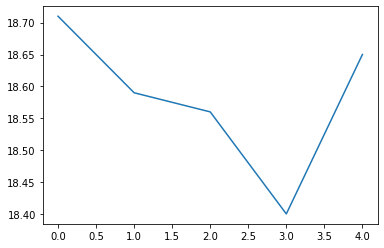

Up flat prob:  -0.6380848758398784 
Down flat prob:  0.6380848758398784 
Flat up prob:  0.07729271274323944 
Flat down prob:  -0.07729271274323944
0.0 -18231.670962194235
Day 84 value: -1423.55 todayPL: $-136.40 $-traded: 154004 return: -0.00924 frac0: 1.0000 frac1: 0.0000


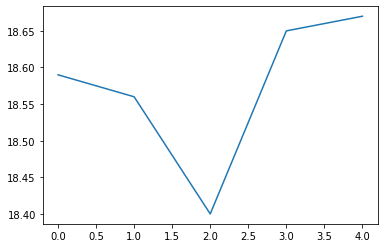

Up flat prob:  -0.0007855306414871504 
Down flat prob:  0.0007855306414871504 
Flat up prob:  0.5780599208302516 
Flat down prob:  -0.5780599208302516
0.0 -18231.670962194235
Day 85 value: -1434.36 todayPL: $-10.81 $-traded: 154023 return: -0.00931 frac0: 1.0000 frac1: 0.0000


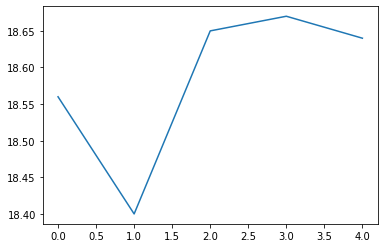

Up flat prob:  0.37132592636155504 
Down flat prob:  -0.37132592636155504 
Flat up prob:  0.43960210031427727 
Flat down prob:  -0.43960210031427727
0.0 -18231.670962194235
Day 86 value: -1418.41 todayPL: $15.96 $-traded: 154042 return: -0.00921 frac0: 1.0000 frac1: 0.0000


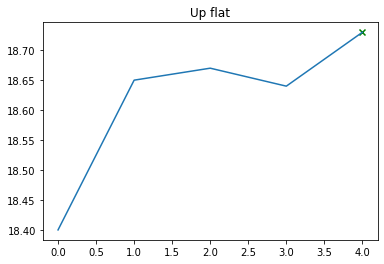

Up flat prob:  0.9596928836495779 
Down flat prob:  -0.9596928836495779 
Flat up prob:  0.575251074621922 
Flat down prob:  -0.575251074621922
-9596.92883649578 -18231.670962194235
Day 87 value: -1466.93 todayPL: $-48.52 $-traded: 154098 return: -0.00952 frac0: 1.0000 frac1: 0.0000


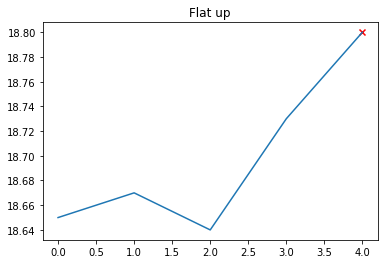

Up flat prob:  0.5311762201280159 
Down flat prob:  -0.5311762201280159 
Flat up prob:  0.943653035631 
Flat down prob:  -0.943653035631
9436.53035631 -27828.599798690015
Day 88 value: -1504.43 todayPL: $-37.50 $-traded: 154135 return: -0.00976 frac0: 1.0000 frac1: 0.0000


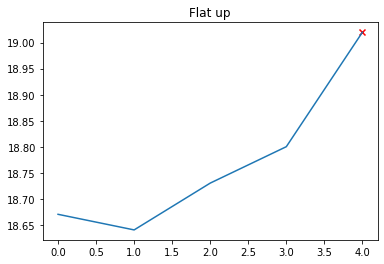

Up flat prob:  0.5564995562247512 
Down flat prob:  -0.5564995562247512 
Flat up prob:  0.9823389261850435 
Flat down prob:  -0.9823389261850435
9823.389261850434 -18392.069442380016
Day 89 value: -1621.82 todayPL: $-117.39 $-traded: 154249 return: -0.01051 frac0: 1.0000 frac1: 0.0000


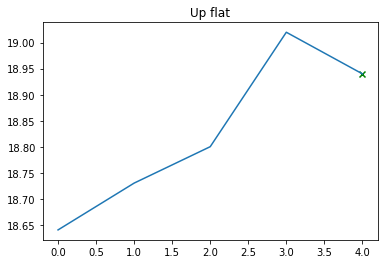

Up flat prob:  0.8161524979822871 
Down flat prob:  -0.8161524979822871 
Flat up prob:  0.6361970562351931 
Flat down prob:  -0.6361970562351931
-8161.524979822871 -8568.680180529582
Day 90 value: -1580.01 todayPL: $41.81 $-traded: 154287 return: -0.01024 frac0: 1.0000 frac1: 0.0000


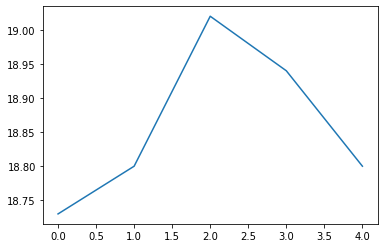

Up flat prob:  0.6559356020624798 
Down flat prob:  -0.6559356020624798 
Flat up prob:  -0.11844539461217109 
Flat down prob:  0.11844539461217109
0.0 -16730.205160352452
Day 91 value: -1506.60 todayPL: $73.40 $-traded: 154363 return: -0.00976 frac0: 1.0000 frac1: 0.0000


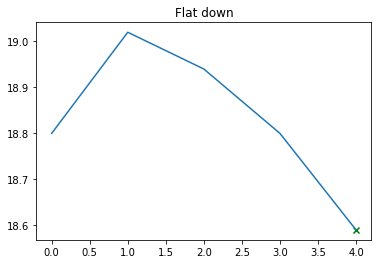

Up flat prob:  -0.11363189900082284 
Down flat prob:  0.11363189900082284 
Flat up prob:  -0.8585512250359045 
Flat down prob:  0.8585512250359045
-8585.512250359045 -16730.205160352452
Day 92 value: -1395.65 todayPL: $110.95 $-traded: 154474 return: -0.00903 frac0: 1.0000 frac1: 0.0000


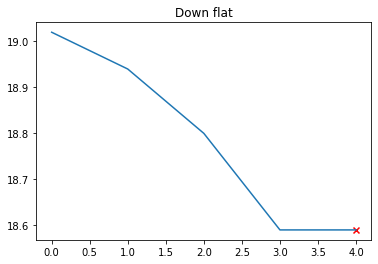

Up flat prob:  -0.8212028779435095 
Down flat prob:  0.8212028779435095 
Flat up prob:  -0.7546122910362749 
Flat down prob:  0.7546122910362749
8212.028779435095 -25315.7174107115
Day 93 value: -1395.65 todayPL: $0.00 $-traded: 154474 return: -0.00903 frac0: 1.0000 frac1: 0.0000


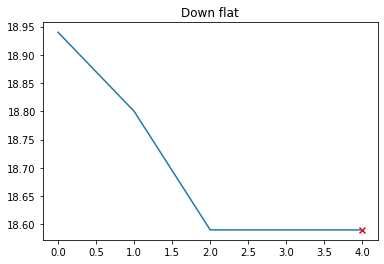

Up flat prob:  -0.9413588160197341 
Down flat prob:  0.9413588160197341 
Flat up prob:  -0.5547015260671724 
Flat down prob:  0.5547015260671724
9413.588160197341 -17103.688631276404
Day 94 value: -1395.65 todayPL: $0.00 $-traded: 154474 return: -0.00903 frac0: 1.0000 frac1: 0.0000


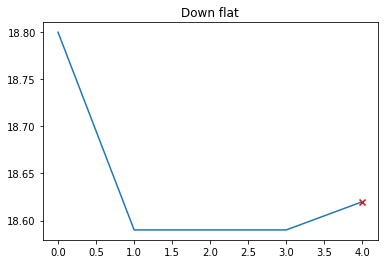

Up flat prob:  -0.9357704028474018 
Down flat prob:  0.9357704028474018 
Flat up prob:  -0.2337151353333046 
Flat down prob:  0.2337151353333046
9357.704028474018 -7690.100471079062
Day 95 value: -1511.75 todayPL: $-116.10 $-traded: 174472 return: -0.00866 frac0: 1.0000 frac1: 0.0000


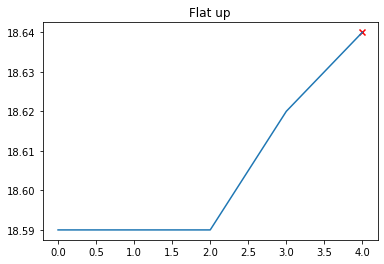

Up flat prob:  0.5547015260671745 
Down flat prob:  -0.5547015260671745 
Flat up prob:  0.94135881601973 
Flat down prob:  -0.94135881601973
9413.5881601973 1667.6035573949557
Day 96 value: -1501.10 todayPL: $10.65 $-traded: 174491 return: -0.00860 frac0: 1.0000 frac1: 0.0000


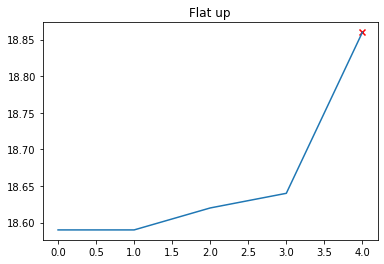

Up flat prob:  0.48623620384214983 
Down flat prob:  -0.48623620384214983 
Flat up prob:  0.9932215309788147 
Flat down prob:  -0.9932215309788147
9932.215309788147 11081.191717592255
Day 97 value: -1383.75 todayPL: $117.35 $-traded: 174604 return: -0.00793 frac0: 1.0000 frac1: 0.0000


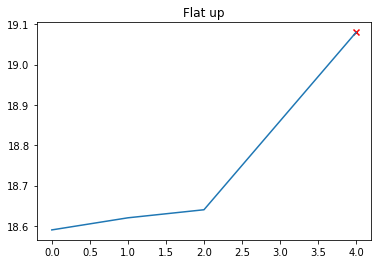

Up flat prob:  0.607940651094457 
Down flat prob:  -0.607940651094457 
Flat up prob:  0.9638759406314885 
Flat down prob:  -0.9638759406314885
9638.759406314884 21013.407027380403
Day 98 value: -1267.72 todayPL: $116.03 $-traded: 174718 return: -0.00726 frac0: 1.0000 frac1: 0.0000


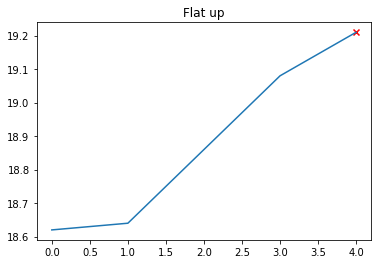

Up flat prob:  0.7453798383266372 
Down flat prob:  -0.7453798383266372 
Flat up prob:  0.85776012038746 
Flat down prob:  -0.85776012038746
8577.6012038746 30652.16643369529
Day 99 value: -1199.99 todayPL: $67.74 $-traded: 174795 return: -0.00687 frac0: 1.0000 frac1: 0.0000


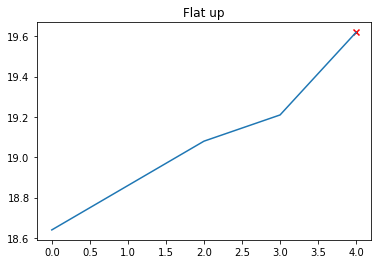

Up flat prob:  0.8051868949166663 
Down flat prob:  -0.8051868949166663 
Flat up prob:  0.9135539025216299 
Flat down prob:  -0.9135539025216299
9135.5390252163 39229.76763756989
Day 100 value: -987.86 todayPL: $212.12 $-traded: 175011 return: -0.00564 frac0: 1.0000 frac1: 0.0000


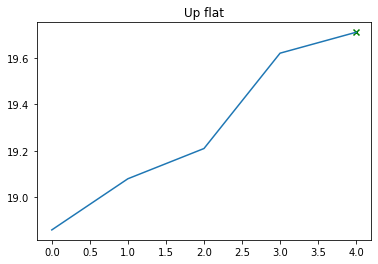

Up flat prob:  0.8204075156841281 
Down flat prob:  -0.8204075156841281 
Flat up prob:  0.8157883104042956 
Flat down prob:  -0.8157883104042956
-8204.07515684128 48365.306662786184
Day 101 value: -942.25 todayPL: $45.61 $-traded: 175050 return: -0.00538 frac0: 1.0000 frac1: 0.0000


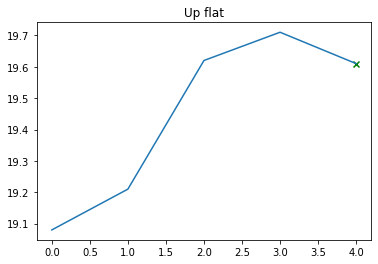

Up flat prob:  0.8765314655645529 
Down flat prob:  -0.8765314655645529 
Flat up prob:  0.5231375049792424 
Flat down prob:  -0.5231375049792424
-8765.314655645529 40161.2315059449
Day 102 value: -993.15 todayPL: $-50.90 $-traded: 175090 return: -0.00567 frac0: 1.0000 frac1: 0.0000


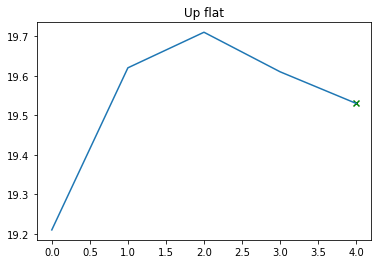

Up flat prob:  0.8862878278688748 
Down flat prob:  -0.8862878278688748 
Flat up prob:  0.09069912364812695 
Flat down prob:  -0.09069912364812695
-8862.878278688748 31395.916850299374
Day 103 value: -1034.16 todayPL: $-41.01 $-traded: 175148 return: -0.00590 frac0: 1.0000 frac1: 0.0000


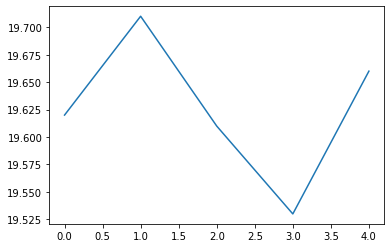

Up flat prob:  -0.13239081364383745 
Down flat prob:  0.13239081364383745 
Flat up prob:  0.06399280332967554 
Flat down prob:  -0.06399280332967554
0.0 22533.038571610625
Day 104 value: -967.99 todayPL: $66.17 $-traded: 175227 return: -0.00552 frac0: 1.0000 frac1: 0.0000


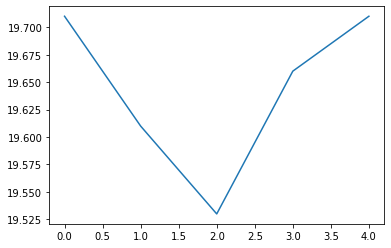

Up flat prob:  -0.3756446311089354 
Down flat prob:  0.3756446311089354 
Flat up prob:  0.4791497160421268 
Flat down prob:  -0.4791497160421268
0.0 22533.038571610625
Day 105 value: -942.69 todayPL: $25.30 $-traded: 175246 return: -0.00538 frac0: 1.0000 frac1: 0.0000


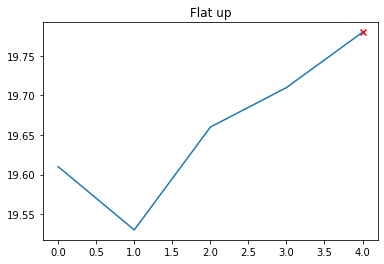

Up flat prob:  0.5181784076200657 
Down flat prob:  -0.5181784076200657 
Flat up prob:  0.8403153582441804 
Flat down prob:  -0.8403153582441804
8403.153582441804 22533.038571610625
Day 106 value: -907.40 todayPL: $35.29 $-traded: 175286 return: -0.00518 frac0: 1.0000 frac1: 0.0000


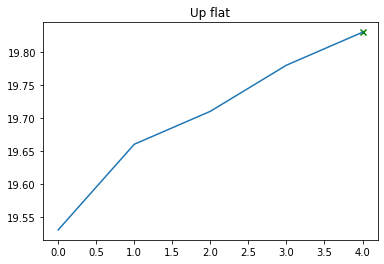

Up flat prob:  0.9316370485114488 
Down flat prob:  -0.9316370485114488 
Flat up prob:  0.767552011869965 
Flat down prob:  -0.767552011869965
-9316.370485114488 30936.192154052427
Day 107 value: -882.25 todayPL: $25.15 $-traded: 175306 return: -0.00503 frac0: 1.0000 frac1: 0.0000


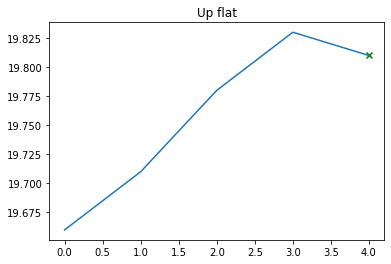

Up flat prob:  0.9068795435713767 
Down flat prob:  -0.9068795435713767 
Flat up prob:  0.6105528343092186 
Flat down prob:  -0.6105528343092186
-9068.795435713766 21619.82166893794
Day 108 value: -892.33 todayPL: $-10.08 $-traded: 175306 return: -0.00509 frac0: 1.0000 frac1: 0.0000


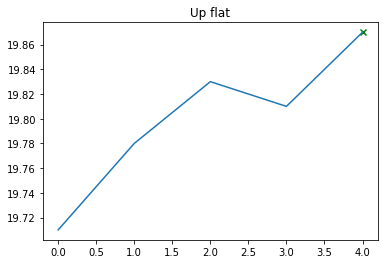

Up flat prob:  0.9232018649649585 
Down flat prob:  -0.9232018649649585 
Flat up prob:  0.7405788161139288 
Flat down prob:  -0.7405788161139288
-9232.018649649584 12551.026233224175
Day 109 value: -862.19 todayPL: $30.14 $-traded: 175326 return: -0.00492 frac0: 1.0000 frac1: 0.0000


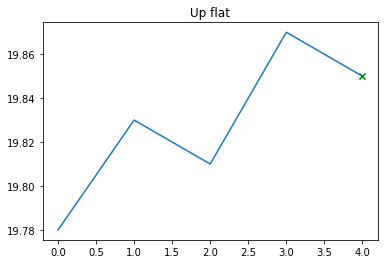

Up flat prob:  0.8184332976024484 
Down flat prob:  -0.8184332976024484 
Flat up prob:  0.5530510661813142 
Flat down prob:  -0.5530510661813142
-8184.332976024484 3319.00758357459
Day 110 value: -972.09 todayPL: $-109.91 $-traded: 195295 return: -0.00498 frac0: 1.0000 frac1: 0.0000


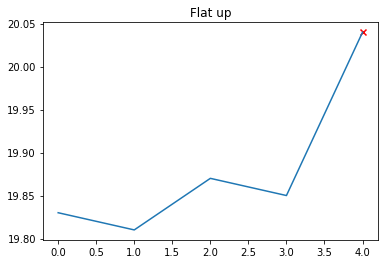

Up flat prob:  0.4576393428213229 
Down flat prob:  -0.4576393428213229 
Flat up prob:  0.9645685885452001 
Flat down prob:  -0.9645685885452001
9645.685885452001 -4865.325392449894
Day 111 value: -1168.06 todayPL: $-195.97 $-traded: 215375 return: -0.00542 frac0: 1.0000 frac1: 0.0000


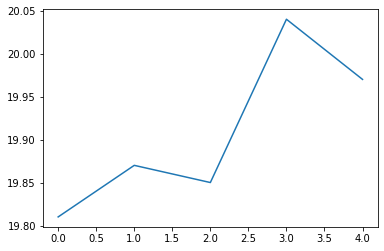

Up flat prob:  0.6977964261409163 
Down flat prob:  -0.6977964261409163 
Flat up prob:  0.5924717565186752 
Flat down prob:  -0.5924717565186752
0.0 4780.360493002107
Day 112 value: -1203.09 todayPL: $-35.03 $-traded: 215395 return: -0.00559 frac0: 1.0000 frac1: 0.0000


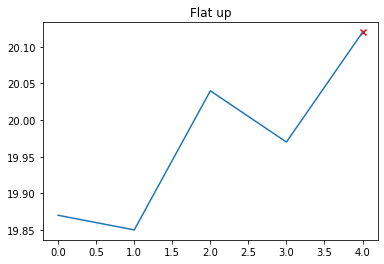

Up flat prob:  0.6711482746123218 
Down flat prob:  -0.6711482746123218 
Flat up prob:  0.8006518771267734 
Flat down prob:  -0.8006518771267734
8006.518771267734 4780.360493002107
Day 113 value: -1128.40 todayPL: $74.70 $-traded: 215455 return: -0.00524 frac0: 1.0000 frac1: 0.0000


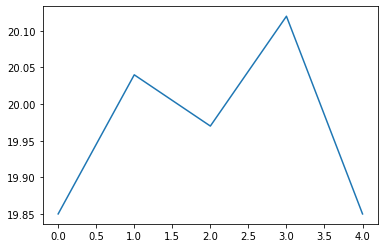

Up flat prob:  0.46294661363223716 
Down flat prob:  -0.46294661363223716 
Flat up prob:  -0.3566506551376724 
Flat down prob:  0.3566506551376724
0.0 12786.879264269843
Day 114 value: -1263.18 todayPL: $-134.79 $-traded: 215574 return: -0.00586 frac0: 1.0000 frac1: 0.0000


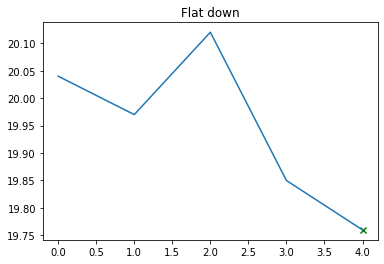

Up flat prob:  -0.4509095678722176 
Down flat prob:  0.4509095678722176 
Flat up prob:  -0.8318985487371398 
Flat down prob:  0.8318985487371398
-8318.985487371398 12786.879264269843
Day 115 value: -1308.75 todayPL: $-45.57 $-traded: 215634 return: -0.00607 frac0: 1.0000 frac1: 0.0000


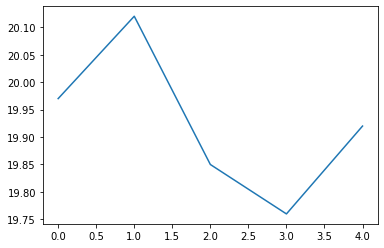

Up flat prob:  -0.4086426514002255 
Down flat prob:  0.4086426514002255 
Flat up prob:  -0.23110678455658717 
Flat down prob:  0.23110678455658717
0.0 4467.893776898445
Day 116 value: -1228.19 todayPL: $80.56 $-traded: 215713 return: -0.00569 frac0: 1.0000 frac1: 0.0000


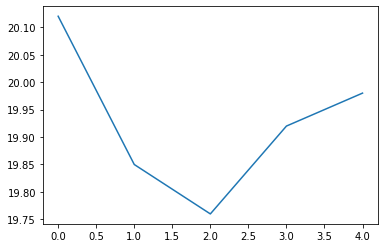

Up flat prob:  -0.6991681670263327 
Down flat prob:  0.6991681670263327 
Flat up prob:  0.16805273884892707 
Flat down prob:  -0.16805273884892707
0.0 4467.893776898445
Day 117 value: -1198.27 todayPL: $29.92 $-traded: 215753 return: -0.00555 frac0: 1.0000 frac1: 0.0000


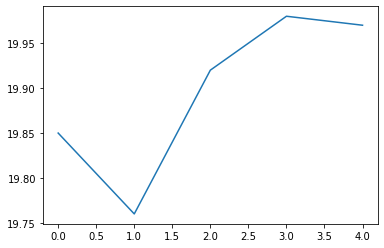

Up flat prob:  0.5248243604924202 
Down flat prob:  -0.5248243604924202 
Flat up prob:  0.6291600437207971 
Flat down prob:  -0.6291600437207971
0.0 4467.893776898445
Day 118 value: -1203.27 todayPL: $-5.00 $-traded: 215753 return: -0.00558 frac0: 1.0000 frac1: 0.0000


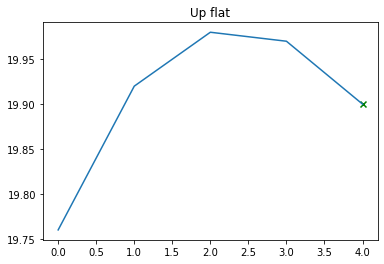

Up flat prob:  0.912204128662087 
Down flat prob:  -0.912204128662087 
Flat up prob:  0.1204700647374409 
Flat down prob:  -0.1204700647374409
-9122.04128662087 4467.893776898445
Day 119 value: -1337.97 todayPL: $-134.70 $-traded: 235693 return: -0.00568 frac0: 1.0000 frac1: 0.0000


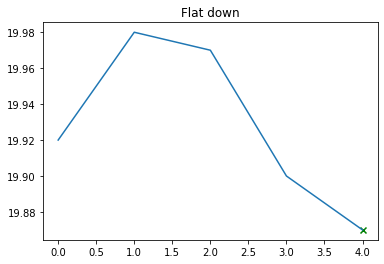

Up flat prob:  -0.11942956489882724 
Down flat prob:  0.11942956489882724 
Flat up prob:  -0.788858229021437 
Flat down prob:  0.788858229021437
-7888.58229021437 -4654.147509722425
Day 120 value: -1323.00 todayPL: $14.96 $-traded: 235713 return: -0.00561 frac0: 1.0000 frac1: 0.0000


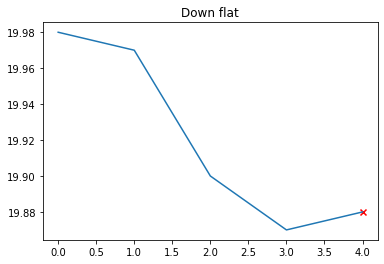

Up flat prob:  -0.8281534933677065 
Down flat prob:  0.8281534933677065 
Flat up prob:  -0.6322540375645582 
Flat down prob:  0.6322540375645582
8281.534933677065 -12542.729799936795
Day 121 value: -1328.03 todayPL: $-5.03 $-traded: 235713 return: -0.00563 frac0: 1.0000 frac1: 0.0000


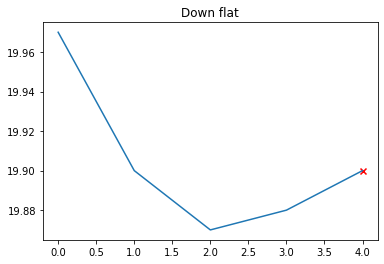

Up flat prob:  -0.9404827561490997 
Down flat prob:  0.9404827561490997 
Flat up prob:  -0.20373302093007797 
Flat down prob:  0.20373302093007797
9404.827561490996 -4261.19486625973
Day 122 value: -1438.09 todayPL: $-110.06 $-traded: 255712 return: -0.00562 frac0: 1.0000 frac1: 0.0000


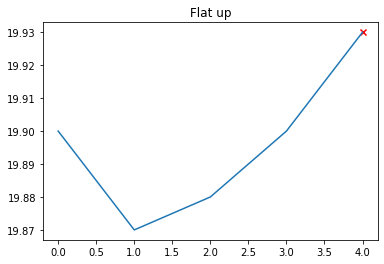

Up flat prob:  0.11539848208767849 
Down flat prob:  -0.11539848208767849 
Flat up prob:  0.864272672117492 
Flat down prob:  -0.864272672117492
8642.72672117492 5143.632695231267
Day 123 value: -1423.13 todayPL: $14.96 $-traded: 255732 return: -0.00556 frac0: 1.0000 frac1: 0.0000


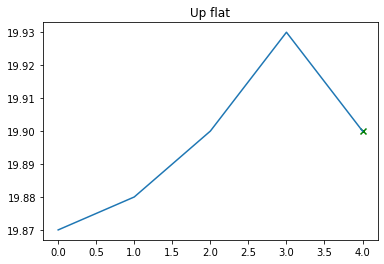

Up flat prob:  0.7650000895912438 
Down flat prob:  -0.7650000895912438 
Flat up prob:  0.3513959795355237 
Flat down prob:  -0.3513959795355237
-7650.000895912438 13786.359416406187
Day 124 value: -1438.26 todayPL: $-15.13 $-traded: 255752 return: -0.00562 frac0: 1.0000 frac1: 0.0000


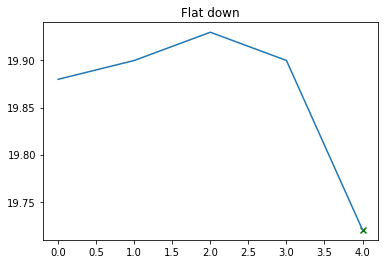

Up flat prob:  -0.20636869075373615 
Down flat prob:  0.20636869075373615 
Flat up prob:  -0.9319853433644049 
Flat down prob:  0.9319853433644049
-9319.853433644048 6136.358520493749
Day 125 value: -1628.11 todayPL: $-189.85 $-traded: 275650 return: -0.00591 frac0: 1.0000 frac1: 0.0000


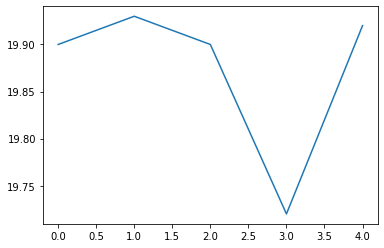

Up flat prob:  -0.28090282708531056 
Down flat prob:  0.28090282708531056 
Flat up prob:  0.0378369806408726 
Flat down prob:  -0.0378369806408726
0.0 -3183.494913150299
Day 126 value: -1730.01 todayPL: $-101.90 $-traded: 275749 return: -0.00627 frac0: 1.0000 frac1: 0.0000


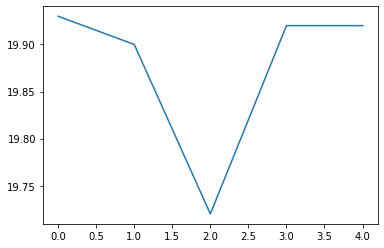

Up flat prob:  -0.3133904113559019 
Down flat prob:  0.3133904113559019 
Flat up prob:  0.2819677309811072 
Flat down prob:  -0.2819677309811072
0.0 -3183.494913150299
Day 127 value: -1730.01 todayPL: $0.00 $-traded: 275749 return: -0.00627 frac0: 1.0000 frac1: 0.0000


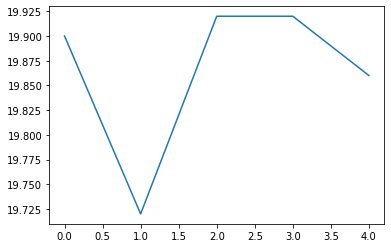

Up flat prob:  -0.004481483224159668 
Down flat prob:  0.004481483224159668 
Flat up prob:  0.09599378527142644 
Flat down prob:  -0.09599378527142644
0.0 -3183.494913150299
Day 128 value: -1699.99 todayPL: $30.02 $-traded: 275769 return: -0.00616 frac0: 1.0000 frac1: 0.0000


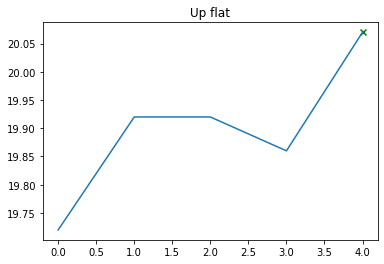

Up flat prob:  0.8045286997755209 
Down flat prob:  -0.8045286997755209 
Flat up prob:  0.7694827191198126 
Flat down prob:  -0.7694827191198126
-8045.286997755209 -3183.494913150299
Day 129 value: -1806.12 todayPL: $-106.13 $-traded: 275870 return: -0.00655 frac0: 1.0000 frac1: 0.0000


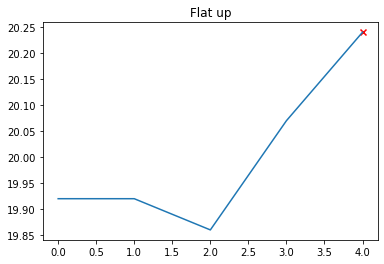

Up flat prob:  0.4427569222707032 
Down flat prob:  -0.4427569222707032 
Flat up prob:  0.9455550914063071 
Flat down prob:  -0.9455550914063071
9455.550914063071 -11228.781910905509
Day 130 value: -1891.18 todayPL: $-85.06 $-traded: 275951 return: -0.00685 frac0: 1.0000 frac1: 0.0000


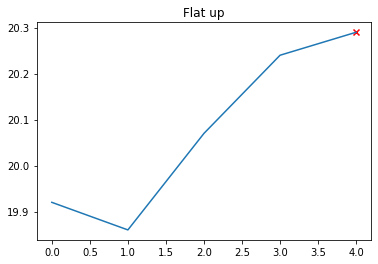

Up flat prob:  0.6727174550536281 
Down flat prob:  -0.6727174550536281 
Flat up prob:  0.8030583804444211 
Flat down prob:  -0.8030583804444211
8030.583804444212 -1773.230996842438
Day 131 value: -2015.91 todayPL: $-124.73 $-traded: 295956 return: -0.00681 frac0: 1.0000 frac1: 0.0000


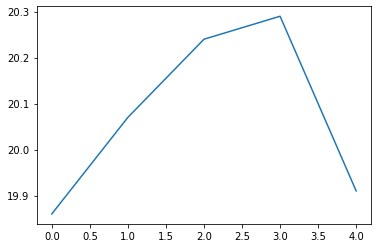

Up flat prob:  0.6168463971646972 
Down flat prob:  -0.6168463971646972 
Flat up prob:  -0.2811079690765601 
Flat down prob:  0.2811079690765601
0.0 6257.352807601774
Day 132 value: -2203.87 todayPL: $-187.96 $-traded: 296156 return: -0.00744 frac0: 1.0000 frac1: 0.0000


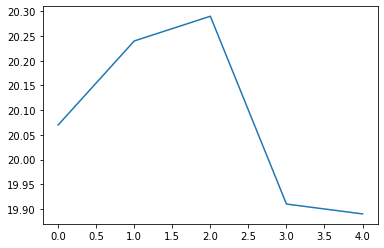

Up flat prob:  -0.15582521319065593 
Down flat prob:  0.15582521319065593 
Flat up prob:  -0.7099198733314378 
Flat down prob:  0.7099198733314378
0.0 6257.352807601774
Day 133 value: -2213.91 todayPL: $-10.04 $-traded: 296156 return: -0.00748 frac0: 1.0000 frac1: 0.0000


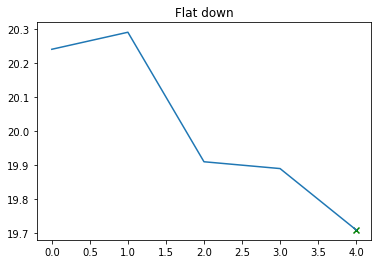

Up flat prob:  -0.72433561443514 
Down flat prob:  0.72433561443514 
Flat up prob:  -0.8008572084874831 
Flat down prob:  0.8008572084874831
-8008.572084874831 6257.352807601774
Day 134 value: -2403.70 todayPL: $-189.80 $-traded: 316043 return: -0.00761 frac0: 1.0000 frac1: 0.0000


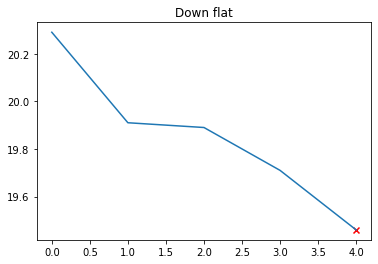

Up flat prob:  -0.8883262607363321 
Down flat prob:  0.8883262607363321 
Flat up prob:  -0.8362042180155209 
Flat down prob:  0.8362042180155209
8883.262607363322 -1751.2192772730568
Day 135 value: -2376.20 todayPL: $27.50 $-traded: 335892 return: -0.00707 frac0: 1.0000 frac1: 0.0000


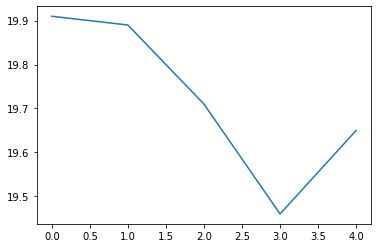

Up flat prob:  -0.7284608800292588 
Down flat prob:  0.7284608800292588 
Flat up prob:  -0.47002062930341154 
Flat down prob:  0.47002062930341154
0.0 7132.043330090265
Day 136 value: -2279.22 todayPL: $96.98 $-traded: 335990 return: -0.00678 frac0: 1.0000 frac1: 0.0000


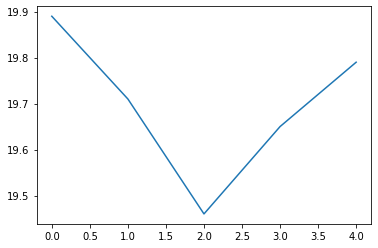

Up flat prob:  -0.6393367011042272 
Down flat prob:  0.6393367011042272 
Flat up prob:  0.21295673816440247 
Flat down prob:  -0.21295673816440247
0.0 7132.043330090265
Day 137 value: -2208.40 todayPL: $70.82 $-traded: 336050 return: -0.00657 frac0: 1.0000 frac1: 0.0000


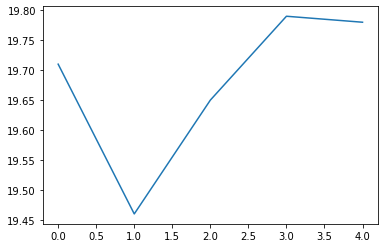

Up flat prob:  0.13104144447622745 
Down flat prob:  -0.13104144447622745 
Flat up prob:  0.5648479729309168 
Flat down prob:  -0.5648479729309168
0.0 7132.043330090265
Day 138 value: -2213.45 todayPL: $-5.05 $-traded: 336050 return: -0.00659 frac0: 1.0000 frac1: 0.0000


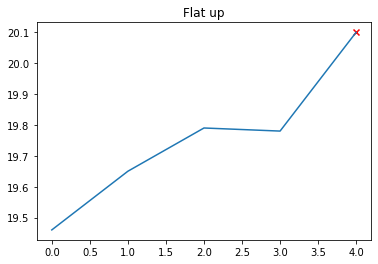

Up flat prob:  0.8203562924406839 
Down flat prob:  -0.8203562924406839 
Flat up prob:  0.8932180464361533 
Flat down prob:  -0.8932180464361533
8932.180464361532 7132.043330090265
Day 139 value: -2052.65 todayPL: $160.80 $-traded: 336211 return: -0.00611 frac0: 1.0000 frac1: 0.0000


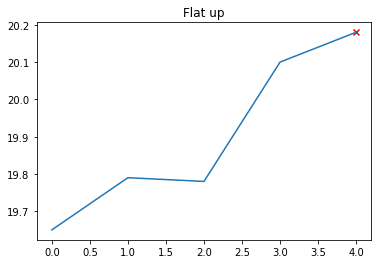

Up flat prob:  0.7484271946790126 
Down flat prob:  -0.7484271946790126 
Flat up prob:  0.8493572910995963 
Flat down prob:  -0.8493572910995963
8493.572910995963 16064.223794451798
Day 140 value: -2013.09 todayPL: $39.56 $-traded: 336251 return: -0.00599 frac0: 1.0000 frac1: 0.0000


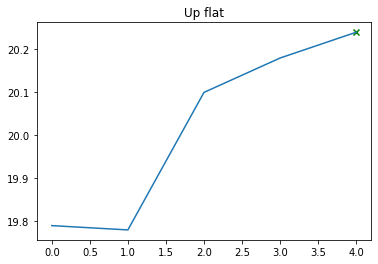

Up flat prob:  0.7784324459635431 
Down flat prob:  -0.7784324459635431 
Flat up prob:  0.7342163940697565 
Flat down prob:  -0.7342163940697565
-7784.324459635431 24557.796705447763
Day 141 value: -1983.50 todayPL: $29.60 $-traded: 336271 return: -0.00590 frac0: 1.0000 frac1: 0.0000


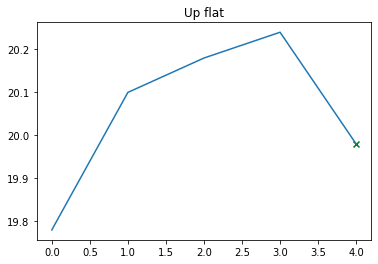

Up flat prob:  0.818137207804503 
Down flat prob:  -0.818137207804503 
Flat up prob:  -0.04569452556434382 
Flat down prob:  0.04569452556434382
-8181.37207804503 16773.472245812332
Day 142 value: -2112.54 todayPL: $-129.04 $-traded: 336391 return: -0.00628 frac0: 1.0000 frac1: 0.0000


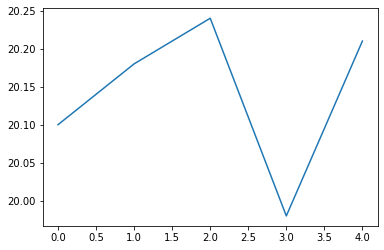

Up flat prob:  0.15130236841452105 
Down flat prob:  -0.15130236841452105 
Flat up prob:  0.17318465780392572 
Flat down prob:  -0.17318465780392572
0.0 8592.100167767301
Day 143 value: -1998.14 todayPL: $114.39 $-traded: 336512 return: -0.00594 frac0: 1.0000 frac1: 0.0000


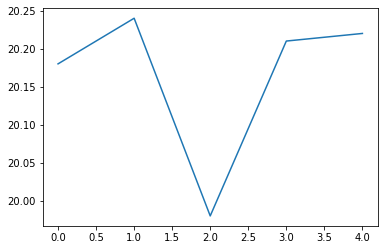

Up flat prob:  -0.12019926925255327 
Down flat prob:  0.12019926925255327 
Flat up prob:  0.29961132381883726 
Flat down prob:  -0.29961132381883726
0.0 8592.100167767301
Day 144 value: -1993.20 todayPL: $4.94 $-traded: 336512 return: -0.00592 frac0: 1.0000 frac1: 0.0000


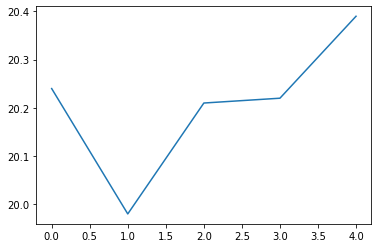

Up flat prob:  0.12896605832206967 
Down flat prob:  -0.12896605832206967 
Flat up prob:  0.7353041182452141 
Flat down prob:  -0.7353041182452141
0.0 8592.100167767301
Day 145 value: -1909.63 todayPL: $83.57 $-traded: 336594 return: -0.00567 frac0: 1.0000 frac1: 0.0000


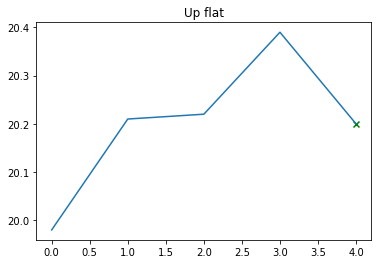

Up flat prob:  0.8663141963651348 
Down flat prob:  -0.8663141963651348 
Flat up prob:  0.22509378474967287 
Flat down prob:  -0.22509378474967287
-8663.14196365135 8592.100167767301
Day 146 value: -2059.39 todayPL: $-149.76 $-traded: 347926 return: -0.00592 frac0: 1.0000 frac1: 0.0000


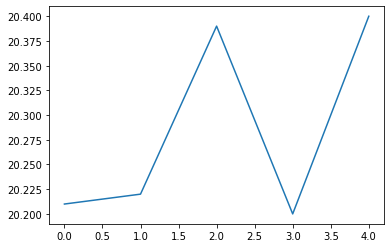

Up flat prob:  0.4994780118706071 
Down flat prob:  -0.4994780118706071 
Flat up prob:  0.5807428995585231 
Flat down prob:  -0.5807428995585231
0.0 -71.04179588404804
Day 147 value: -2073.59 todayPL: $-14.20 $-traded: 347926 return: -0.00596 frac0: 1.0000 frac1: 0.0000


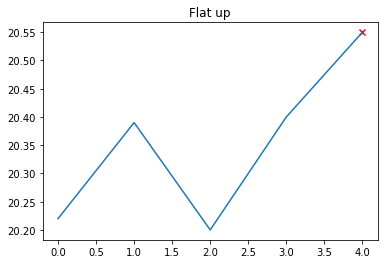

Up flat prob:  0.5431895196832159 
Down flat prob:  -0.5431895196832159 
Flat up prob:  0.8255108795946691 
Flat down prob:  -0.8255108795946691
8255.108795946691 -71.04179588404804
Day 148 value: -2141.47 todayPL: $-67.88 $-traded: 359372 return: -0.00596 frac0: 1.0000 frac1: 0.0000


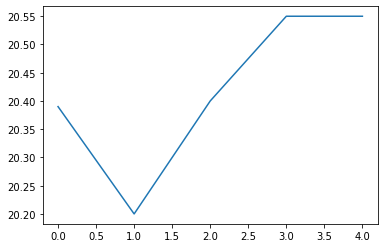

Up flat prob:  0.36429690491906 
Down flat prob:  -0.36429690491906 
Flat up prob:  0.6753295358067323 
Flat down prob:  -0.6753295358067323
0.0 8184.067000062643
Day 149 value: -2141.47 todayPL: $0.00 $-traded: 359372 return: -0.00596 frac0: 1.0000 frac1: 0.0000


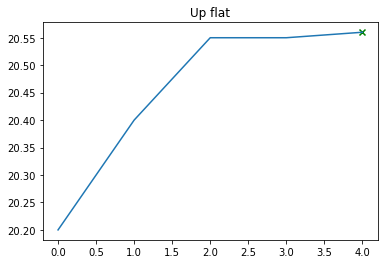

Up flat prob:  0.9827054361005048 
Down flat prob:  -0.9827054361005048 
Flat up prob:  0.5424052159181462 
Flat down prob:  -0.5424052159181462
-9827.054361005048 8184.067000062643
Day 150 value: -2236.53 todayPL: $-95.06 $-traded: 379357 return: -0.00590 frac0: 1.0000 frac1: 0.0000


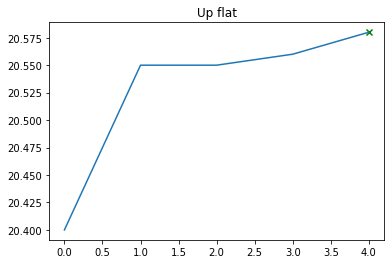

Up flat prob:  0.9792392291287667 
Down flat prob:  -0.9792392291287667 
Flat up prob:  0.5162868992734682 
Flat down prob:  -0.5162868992734682
-9792.392291287668 -1642.9873609424048
Day 151 value: -2246.36 todayPL: $-9.82 $-traded: 379377 return: -0.00592 frac0: 1.0000 frac1: 0.0000


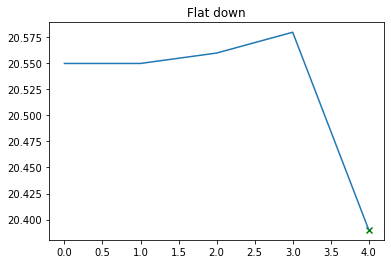

Up flat prob:  -0.2643844392676887 
Down flat prob:  0.2643844392676887 
Flat up prob:  -0.9093335851299623 
Flat down prob:  0.9093335851299623
-9093.335851299624 -11435.379652230073
Day 152 value: -2154.72 todayPL: $91.64 $-traded: 379479 return: -0.00568 frac0: 1.0000 frac1: 0.0000


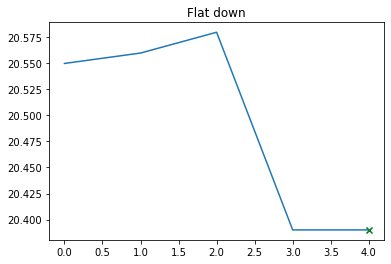

Up flat prob:  -0.49366630648981735 
Down flat prob:  0.49366630648981735 
Flat up prob:  -0.7816767627037392 
Flat down prob:  0.7816767627037392
-7816.767627037392 -20528.715503529696
Day 153 value: -2154.72 todayPL: $0.00 $-traded: 379479 return: -0.00568 frac0: 1.0000 frac1: 0.0000


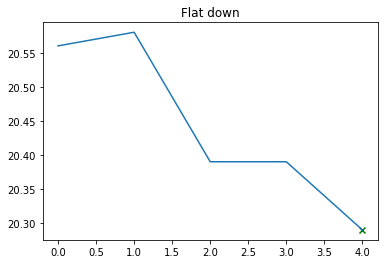

Up flat prob:  -0.7289956796908172 
Down flat prob:  0.7289956796908172 
Flat up prob:  -0.8067308995965977 
Flat down prob:  0.8067308995965977
-8067.308995965977 -28345.48313056709
Day 154 value: -2105.92 todayPL: $48.80 $-traded: 379520 return: -0.00555 frac0: 1.0000 frac1: 0.0000


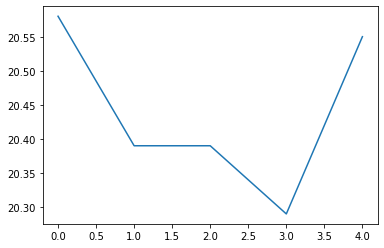

Up flat prob:  -0.5843168446109935 
Down flat prob:  0.5843168446109935 
Flat up prob:  0.30836922011209805 
Flat down prob:  -0.30836922011209805
0.0 -36412.792126533066
Day 155 value: -2234.46 todayPL: $-128.54 $-traded: 379643 return: -0.00589 frac0: 1.0000 frac1: 0.0000


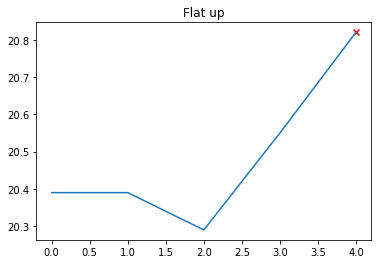

Up flat prob:  0.39953550261118825 
Down flat prob:  -0.39953550261118825 
Flat up prob:  0.9526052929848283 
Flat down prob:  -0.9526052929848283
9526.052929848283 -36412.792126533066
Day 156 value: -2366.30 todayPL: $-131.84 $-traded: 379768 return: -0.00623 frac0: 1.0000 frac1: 0.0000


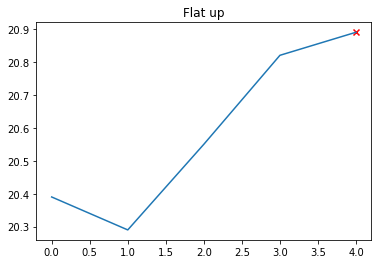

Up flat prob:  0.6373976881300905 
Down flat prob:  -0.6373976881300905 
Flat up prob:  0.8155924481490833 
Flat down prob:  -0.8155924481490833
8155.9244814908325 -26886.739196684783
Day 157 value: -2400.11 todayPL: $-33.81 $-traded: 379810 return: -0.00632 frac0: 1.0000 frac1: 0.0000


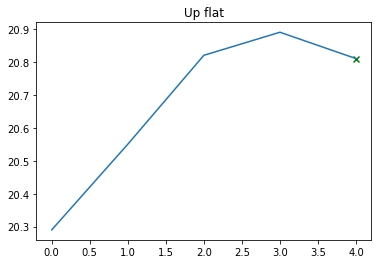

Up flat prob:  0.9558865660731104 
Down flat prob:  -0.9558865660731104 
Flat up prob:  0.49661620743941504 
Flat down prob:  -0.49661620743941504
-9558.865660731104 -18730.81471519395
Day 158 value: -2362.08 todayPL: $38.03 $-traded: 379851 return: -0.00622 frac0: 1.0000 frac1: 0.0000


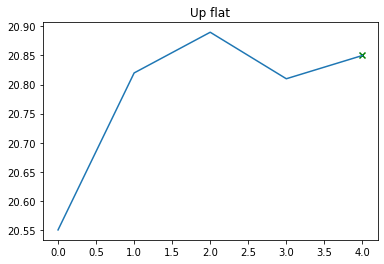

Up flat prob:  0.9521184401632696 
Down flat prob:  -0.9521184401632696 
Flat up prob:  0.36237115582277757 
Flat down prob:  -0.36237115582277757
-9521.184401632696 -28289.680375925054
Day 159 value: -2381.38 todayPL: $-19.30 $-traded: 379872 return: -0.00627 frac0: 1.0000 frac1: 0.0000


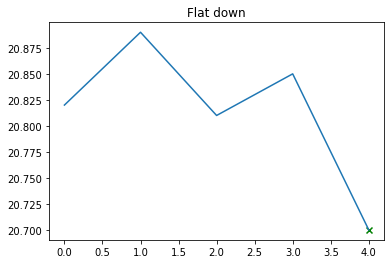

Up flat prob:  -0.23225082897017899 
Down flat prob:  0.23225082897017899 
Flat up prob:  -0.8622442444331451 
Flat down prob:  0.8622442444331451
-8622.442444331451 -37810.86477755775
Day 160 value: -2309.95 todayPL: $71.44 $-traded: 379955 return: -0.00608 frac0: 1.0000 frac1: 0.0000


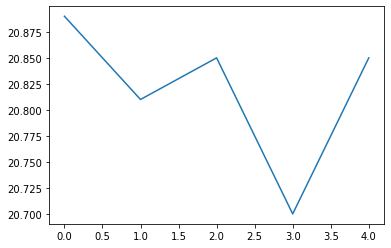

Up flat prob:  -0.5505696973258155 
Down flat prob:  0.5505696973258155 
Flat up prob:  -0.013822680457231598 
Flat down prob:  0.013822680457231598
0.0 -46433.3072218892
Day 161 value: -2382.81 todayPL: $-72.87 $-traded: 380039 return: -0.00627 frac0: 1.0000 frac1: 0.0000


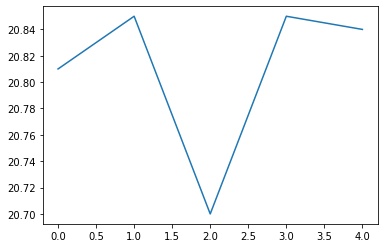

Up flat prob:  -0.03360552108110698 
Down flat prob:  0.03360552108110698 
Flat up prob:  0.3138124193242094 
Flat down prob:  -0.3138124193242094
0.0 -46433.3072218892
Day 162 value: -2378.02 todayPL: $4.79 $-traded: 380039 return: -0.00626 frac0: 1.0000 frac1: 0.0000


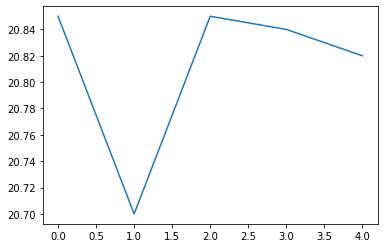

Up flat prob:  -0.09139467362111167 
Down flat prob:  0.09139467362111167 
Flat up prob:  0.1572485407570102 
Flat down prob:  -0.1572485407570102
0.0 -46433.3072218892
Day 163 value: -2368.55 todayPL: $9.48 $-traded: 380059 return: -0.00623 frac0: 1.0000 frac1: 0.0000


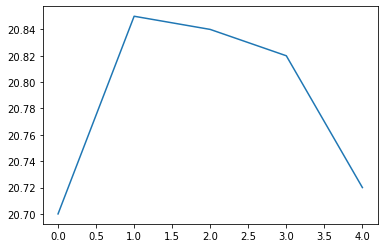

Up flat prob:  0.5332033633997348 
Down flat prob:  -0.5332033633997348 
Flat up prob:  -0.4316475200791193 
Flat down prob:  0.4316475200791193
0.0 -46433.3072218892
Day 164 value: -2320.75 todayPL: $47.79 $-traded: 380101 return: -0.00611 frac0: 1.0000 frac1: 0.0000


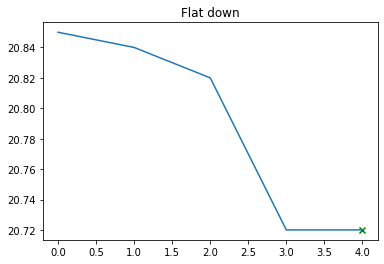

Up flat prob:  -0.6895124458623694 
Down flat prob:  0.6895124458623694 
Flat up prob:  -0.7942528392022711 
Flat down prob:  0.7942528392022711
-7942.528392022711 -46433.3072218892
Day 165 value: -2320.75 todayPL: $0.00 $-traded: 380101 return: -0.00611 frac0: 1.0000 frac1: 0.0000


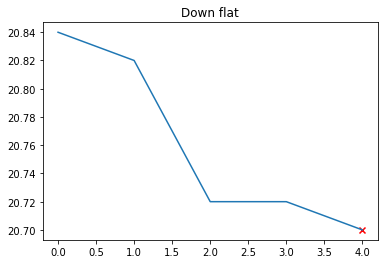

Up flat prob:  -0.8547298219661725 
Down flat prob:  0.8547298219661725 
Flat up prob:  -0.6721855002008734 
Flat down prob:  0.6721855002008734
8547.298219661725 -54375.835613911906
Day 166 value: -2311.22 todayPL: $9.54 $-traded: 380121 return: -0.00608 frac0: 1.0000 frac1: 0.0000


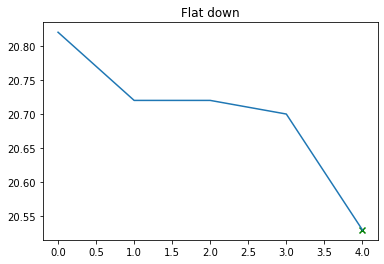

Up flat prob:  -0.7355311349804681 
Down flat prob:  0.7355311349804681 
Flat up prob:  -0.9365255456561988 
Flat down prob:  0.9365255456561988
-9365.255456561988 -45828.53739425018
Day 167 value: -2229.52 todayPL: $81.70 $-traded: 380204 return: -0.00586 frac0: 1.0000 frac1: 0.0000


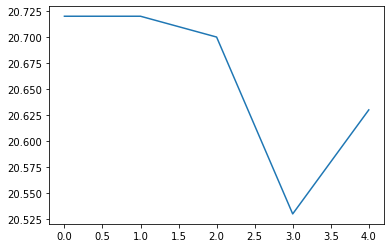

Up flat prob:  -0.566640781417597 
Down flat prob:  0.566640781417597 
Flat up prob:  -0.45606816481129686 
Flat down prob:  0.45606816481129686
0.0 -55193.79285081217
Day 168 value: -2278.53 todayPL: $-49.01 $-traded: 380266 return: -0.00599 frac0: 1.0000 frac1: 0.0000


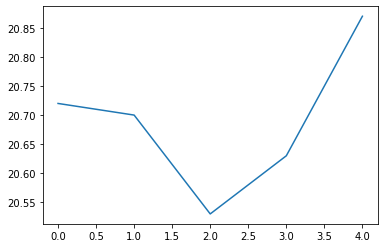

Up flat prob:  -0.09344106305348314 
Down flat prob:  0.09344106305348314 
Flat up prob:  0.7180978199797576 
Flat down prob:  -0.7180978199797576
0.0 -55193.79285081217
Day 169 value: -2395.21 todayPL: $-116.68 $-traded: 380370 return: -0.00630 frac0: 1.0000 frac1: 0.0000


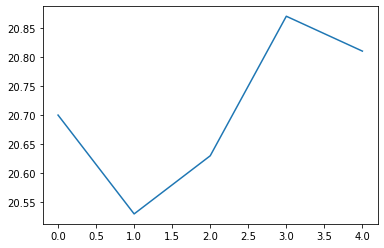

Up flat prob:  0.2670991437837034 
Down flat prob:  -0.2670991437837034 
Flat up prob:  0.6042121799024346 
Flat down prob:  -0.6042121799024346
0.0 -55193.79285081217
Day 170 value: -2366.57 todayPL: $28.64 $-traded: 380391 return: -0.00622 frac0: 1.0000 frac1: 0.0000


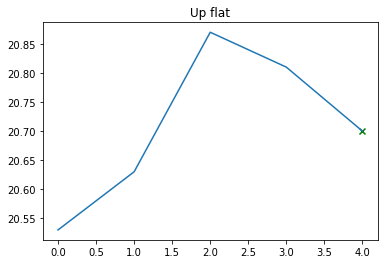

Up flat prob:  0.8100453607913943 
Down flat prob:  -0.8100453607913943 
Flat up prob:  0.138092425620774 
Flat down prob:  -0.138092425620774
-8100.453607913943 -55193.79285081217
Day 171 value: -2314.08 todayPL: $52.49 $-traded: 380453 return: -0.00608 frac0: 1.0000 frac1: 0.0000


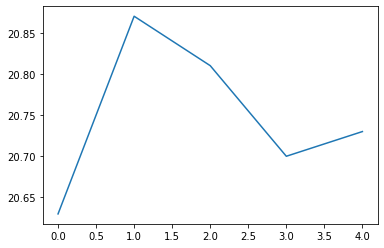

Up flat prob:  0.5047217746326983 
Down flat prob:  -0.5047217746326983 
Flat up prob:  -0.15668433134936904 
Flat down prob:  0.15668433134936904
0.0 -63294.24645872611
Day 172 value: -2328.68 todayPL: $-14.59 $-traded: 380473 return: -0.00612 frac0: 1.0000 frac1: 0.0000


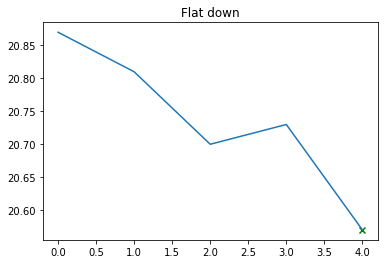

Up flat prob:  -0.790052635766454 
Down flat prob:  0.790052635766454 
Flat up prob:  -0.8792380879449996 
Flat down prob:  0.8792380879449996
-8792.380879449996 -63294.24645872611
Day 173 value: -2251.97 todayPL: $76.71 $-traded: 380556 return: -0.00592 frac0: 1.0000 frac1: 0.0000


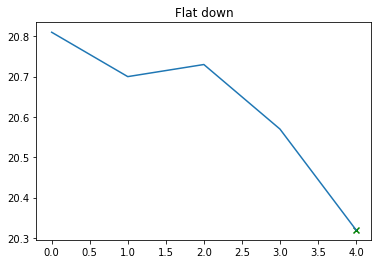

Up flat prob:  -0.656859783585394 
Down flat prob:  0.656859783585394 
Flat up prob:  -0.9696401842058998 
Flat down prob:  0.9696401842058998
-9696.401842058998 -72086.62733817611
Day 174 value: -2131.08 todayPL: $120.89 $-traded: 380678 return: -0.00560 frac0: 1.0000 frac1: 0.0000


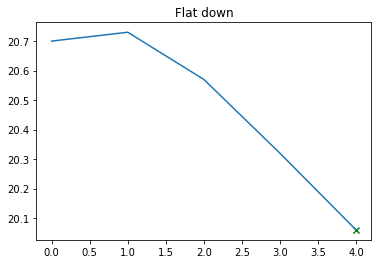

Up flat prob:  -0.6296411196352016 
Down flat prob:  0.6296411196352016 
Flat up prob:  -0.941231819788385 
Flat down prob:  0.941231819788385
-9412.31819788385 -81783.02918023511
Day 175 value: -2003.76 todayPL: $127.32 $-traded: 380798 return: -0.00526 frac0: 1.0000 frac1: 0.0000


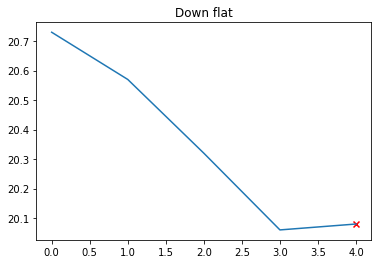

Up flat prob:  -0.8673333555724341 
Down flat prob:  0.8673333555724341 
Flat up prob:  -0.708635475767808 
Flat down prob:  0.708635475767808
8673.33355572434 -91195.34737811897
Day 176 value: -2013.72 todayPL: $-9.96 $-traded: 380798 return: -0.00529 frac0: 1.0000 frac1: 0.0000


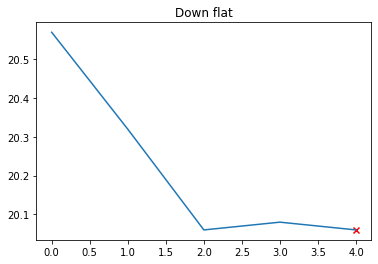

Up flat prob:  -0.9661364943253353 
Down flat prob:  0.9661364943253353 
Flat up prob:  -0.5461542330906246 
Flat down prob:  0.5461542330906246
9661.364943253353 -82522.01382239463
Day 177 value: -2003.76 todayPL: $9.96 $-traded: 380798 return: -0.00526 frac0: 1.0000 frac1: 0.0000


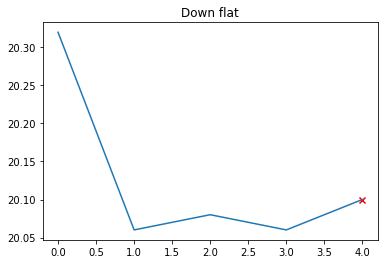

Up flat prob:  -0.9309402207025624 
Down flat prob:  0.9309402207025624 
Flat up prob:  -0.24913197275829738 
Flat down prob:  0.24913197275829738
9309.402207025625 -72860.64887914127
Day 178 value: -2023.78 todayPL: $-20.02 $-traded: 380818 return: -0.00531 frac0: 1.0000 frac1: 0.0000


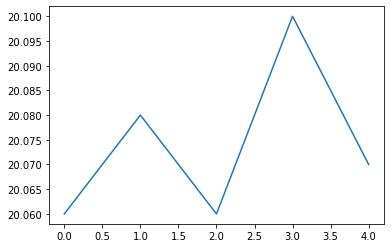

Up flat prob:  0.45940779397798426 
Down flat prob:  -0.45940779397798426 
Flat up prob:  0.08392698769948713 
Flat down prob:  -0.08392698769948713
0.0 -63551.246672115645
Day 179 value: -2008.97 todayPL: $14.81 $-traded: 380838 return: -0.00528 frac0: 1.0000 frac1: 0.0000


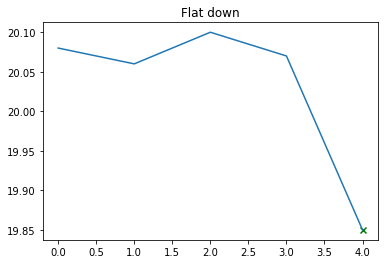

Up flat prob:  -0.35664875385251876 
Down flat prob:  0.35664875385251876 
Flat up prob:  -0.9578098628505883 
Flat down prob:  0.9578098628505883
-9578.098628505883 -63551.246672115645
Day 180 value: -1899.91 todayPL: $109.06 $-traded: 380937 return: -0.00499 frac0: 1.0000 frac1: 0.0000


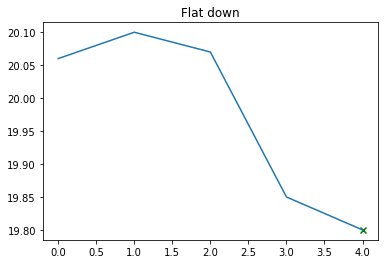

Up flat prob:  -0.5271147012215954 
Down flat prob:  0.5271147012215954 
Flat up prob:  -0.8603063621260244 
Flat down prob:  0.8603063621260244
-8603.063621260244 -73129.34530062153
Day 181 value: -1874.96 todayPL: $24.95 $-traded: 380977 return: -0.00492 frac0: 1.0000 frac1: 0.0000


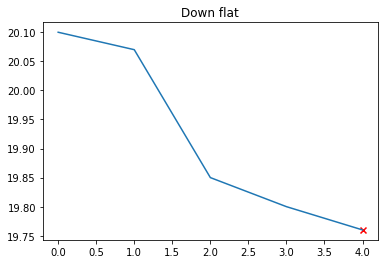

Up flat prob:  -0.8297654676267175 
Down flat prob:  0.8297654676267175 
Flat up prob:  -0.7193411626833156 
Flat down prob:  0.7193411626833156
8297.654676267175 -81732.40892188177
Day 182 value: -1854.85 todayPL: $20.10 $-traded: 380997 return: -0.00487 frac0: 1.0000 frac1: 0.0000


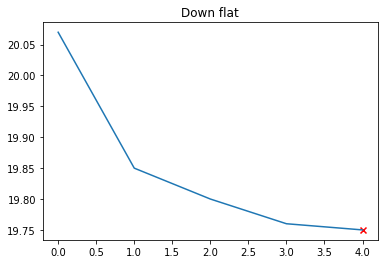

Up flat prob:  -0.9970773481787695 
Down flat prob:  0.9970773481787695 
Flat up prob:  -0.5599112955578373 
Flat down prob:  0.5599112955578373
9970.773481787695 -73434.75424561459
Day 183 value: -1849.79 todayPL: $5.06 $-traded: 380997 return: -0.00486 frac0: 1.0000 frac1: 0.0000


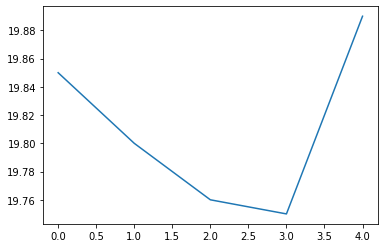

Up flat prob:  -0.3230019768892785 
Down flat prob:  0.3230019768892785 
Flat up prob:  0.5899830606536641 
Flat down prob:  -0.5899830606536641
0.0 -63463.9807638269
Day 184 value: -1921.03 todayPL: $-71.24 $-traded: 381076 return: -0.00504 frac0: 1.0000 frac1: 0.0000


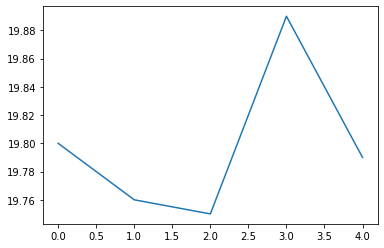

Up flat prob:  0.11575689911119455 
Down flat prob:  -0.11575689911119455 
Flat up prob:  0.14622168507921024 
Flat down prob:  -0.14622168507921024
0.0 -63463.9807638269
Day 185 value: -1871.13 todayPL: $49.90 $-traded: 381136 return: -0.00491 frac0: 1.0000 frac1: 0.0000


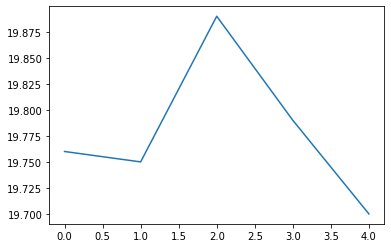

Up flat prob:  0.1449193779097834 
Down flat prob:  -0.1449193779097834 
Flat up prob:  -0.5615146464358038 
Flat down prob:  0.5615146464358038
0.0 -63463.9807638269
Day 186 value: -1825.88 todayPL: $45.25 $-traded: 381175 return: -0.00479 frac0: 1.0000 frac1: 0.0000


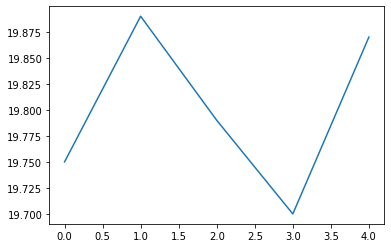

Up flat prob:  0.20134195940868688 
Down flat prob:  -0.20134195940868688 
Flat up prob:  0.3164882154916344 
Flat down prob:  -0.3164882154916344
0.0 -63463.9807638269
Day 187 value: -1912.46 todayPL: $-86.59 $-traded: 381255 return: -0.00502 frac0: 1.0000 frac1: 0.0000


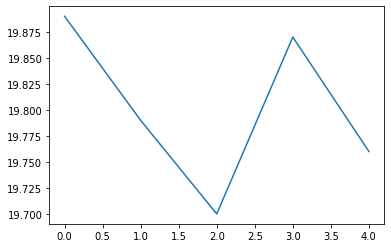

Up flat prob:  -0.5904880254516437 
Down flat prob:  0.5904880254516437 
Flat up prob:  -0.23297573983931955 
Flat down prob:  0.23297573983931955
0.0 -63463.9807638269
Day 188 value: -1857.43 todayPL: $55.03 $-traded: 381314 return: -0.00487 frac0: 1.0000 frac1: 0.0000


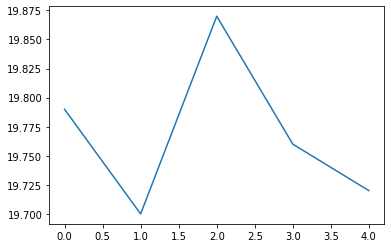

Up flat prob:  -0.09289958864371696 
Down flat prob:  0.09289958864371696 
Flat up prob:  -0.3882042672901931 
Flat down prob:  0.3882042672901931
0.0 -63463.9807638269
Day 189 value: -1837.29 todayPL: $20.14 $-traded: 381334 return: -0.00482 frac0: 1.0000 frac1: 0.0000


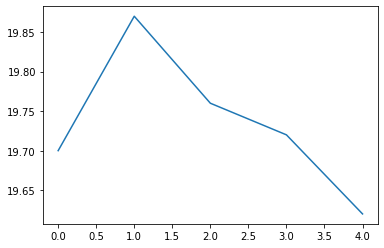

Up flat prob:  -0.03923360036168127 
Down flat prob:  0.03923360036168127 
Flat up prob:  -0.73811180014183 
Flat down prob:  0.73811180014183
0.0 -63463.9807638269
Day 190 value: -1786.78 todayPL: $50.50 $-traded: 381373 return: -0.00469 frac0: 1.0000 frac1: 0.0000


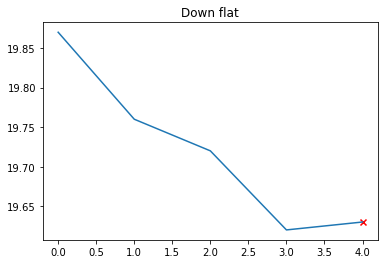

Up flat prob:  -0.923484813968498 
Down flat prob:  0.923484813968498 
Flat up prob:  -0.6799272233429436 
Flat down prob:  0.6799272233429436
9234.84813968498 -63463.9807638269
Day 191 value: -1791.87 todayPL: $-5.09 $-traded: 381373 return: -0.00470 frac0: 1.0000 frac1: 0.0000


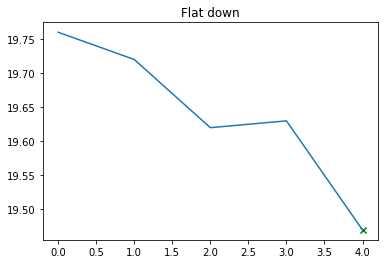

Up flat prob:  -0.7473276493783955 
Down flat prob:  0.7473276493783955 
Flat up prob:  -0.9178356769080968 
Flat down prob:  0.9178356769080968
-9178.356769080967 -54229.132624141916
Day 192 value: -1710.82 todayPL: $81.05 $-traded: 381451 return: -0.00449 frac0: 1.0000 frac1: 0.0000


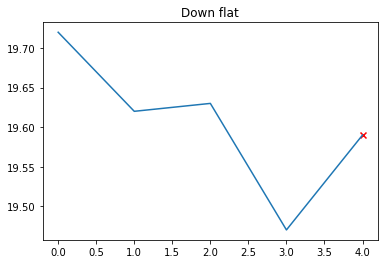

Up flat prob:  -0.7743786133390165 
Down flat prob:  0.7743786133390165 
Flat up prob:  -0.34444525636106976 
Flat down prob:  0.34444525636106976
7743.786133390165 -63407.48939322288
Day 193 value: -1772.68 todayPL: $-61.85 $-traded: 381510 return: -0.00465 frac0: 1.0000 frac1: 0.0000


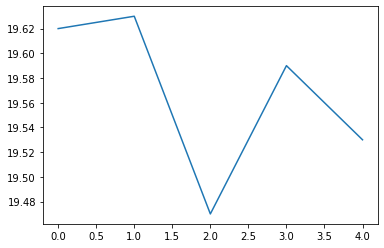

Up flat prob:  -0.5517035827033566 
Down flat prob:  0.5517035827033566 
Flat up prob:  -0.33764969118039395 
Flat down prob:  0.33764969118039395
0.0 -55663.70325983271
Day 194 value: -1742.27 todayPL: $30.40 $-traded: 381549 return: -0.00457 frac0: 1.0000 frac1: 0.0000


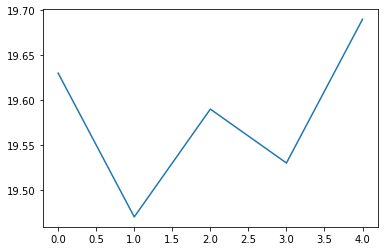

Up flat prob:  -0.1124243617187297 
Down flat prob:  0.1124243617187297 
Flat up prob:  0.6396453740025794 
Flat down prob:  -0.6396453740025794
0.0 -55663.70325983271
Day 195 value: -1824.69 todayPL: $-82.41 $-traded: 381647 return: -0.00478 frac0: 1.0000 frac1: 0.0000


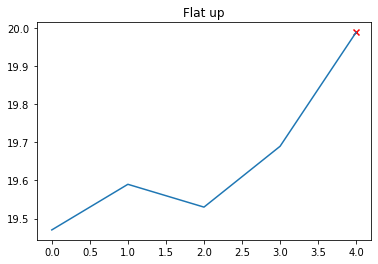

Up flat prob:  0.6123551957941545 
Down flat prob:  -0.6123551957941545 
Flat up prob:  0.974925431993601 
Flat down prob:  -0.974925431993601
9749.25431993601 -55663.70325983271
Day 196 value: -1977.48 todayPL: $-152.80 $-traded: 381787 return: -0.00518 frac0: 1.0000 frac1: 0.0000


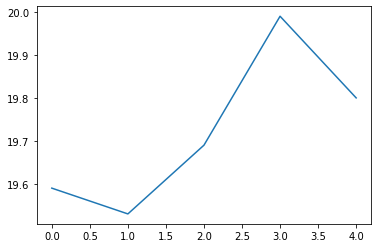

Up flat prob:  0.5903300193556064 
Down flat prob:  -0.5903300193556064 
Flat up prob:  0.4904377724605652 
Flat down prob:  -0.4904377724605652
0.0 -45914.448939896705
Day 197 value: -1882.98 todayPL: $94.51 $-traded: 381886 return: -0.00493 frac0: 1.0000 frac1: 0.0000


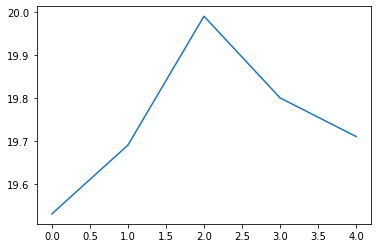

Up flat prob:  0.7395641237312257 
Down flat prob:  -0.7395641237312257 
Flat up prob:  -0.0016863000975165382 
Flat down prob:  0.0016863000975165382
0.0 -45914.448939896705
Day 198 value: -1837.73 todayPL: $45.25 $-traded: 381925 return: -0.00481 frac0: 1.0000 frac1: 0.0000


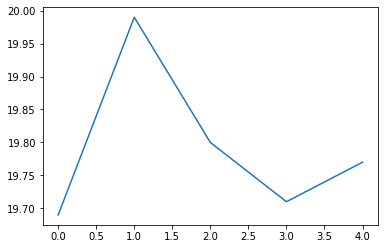

Up flat prob:  0.2343227602828696 
Down flat prob:  -0.2343227602828696 
Flat up prob:  -0.20509222322679763 
Flat down prob:  0.20509222322679763
0.0 -45914.448939896705
Day 199 value: -1868.34 todayPL: $-30.62 $-traded: 381965 return: -0.00489 frac0: 1.0000 frac1: 0.0000


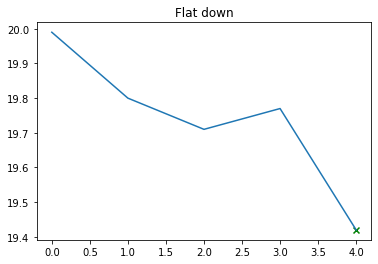

Up flat prob:  -0.7717438632019061 
Down flat prob:  0.7717438632019061 
Flat up prob:  -0.8932719465994238 
Flat down prob:  0.8932719465994238
-8932.719465994238 -45914.448939896705
Day 200 value: -1692.47 todayPL: $175.88 $-traded: 382140 return: -0.00443 frac0: 1.0000 frac1: 0.0000


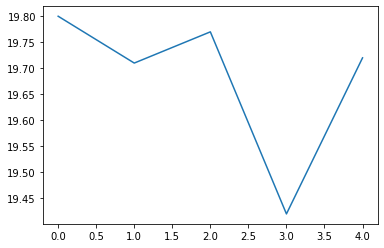

Up flat prob:  -0.4900612419225198 
Down flat prob:  0.4900612419225198 
Flat up prob:  -0.12270935718961283 
Flat down prob:  0.12270935718961283
0.0 -54847.168405890945
Day 201 value: -1847.36 todayPL: $-154.89 $-traded: 382278 return: -0.00483 frac0: 1.0000 frac1: 0.0000


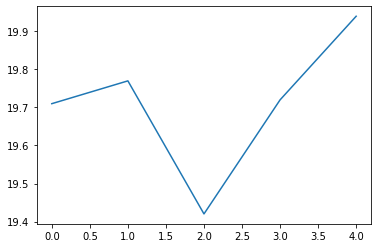

Up flat prob:  0.024338689862179064 
Down flat prob:  -0.024338689862179064 
Flat up prob:  0.6626995917202994 
Flat down prob:  -0.6626995917202994
0.0 -54847.168405890945
Day 202 value: -1959.50 todayPL: $-112.14 $-traded: 382397 return: -0.00512 frac0: 1.0000 frac1: 0.0000


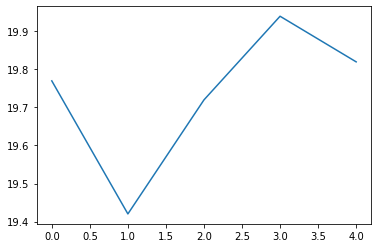

Up flat prob:  0.15359223660539267 
Down flat prob:  -0.15359223660539267 
Flat up prob:  0.4226505336871604 
Flat down prob:  -0.4226505336871604
0.0 -54847.168405890945
Day 203 value: -1899.67 todayPL: $59.82 $-traded: 382457 return: -0.00497 frac0: 1.0000 frac1: 0.0000


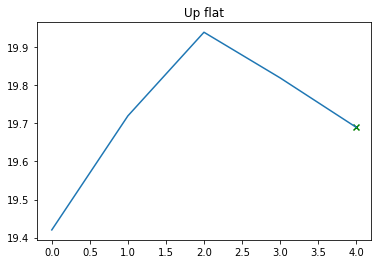

Up flat prob:  0.8580660872814995 
Down flat prob:  -0.8580660872814995 
Flat up prob:  0.054166170508632226 
Flat down prob:  -0.054166170508632226
-8580.660872814995 -54847.168405890945
Day 204 value: -1834.45 todayPL: $65.22 $-traded: 382516 return: -0.00480 frac0: 1.0000 frac1: 0.0000


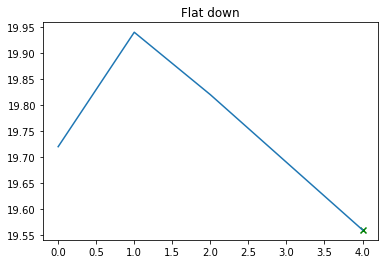

Up flat prob:  -0.13869570067760084 
Down flat prob:  0.13869570067760084 
Flat up prob:  -0.8031108381264556 
Flat down prob:  0.8031108381264556
-8031.108381264556 -63427.82927870594
Day 205 value: -1768.93 todayPL: $65.52 $-traded: 382594 return: -0.00462 frac0: 1.0000 frac1: 0.0000


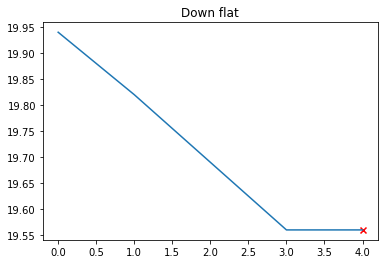

Up flat prob:  -0.8999375473044459 
Down flat prob:  0.8999375473044459 
Flat up prob:  -0.7065596183869315 
Flat down prob:  0.7065596183869315
8999.375473044458 -71458.9376599705
Day 206 value: -1768.93 todayPL: $0.00 $-traded: 382594 return: -0.00462 frac0: 1.0000 frac1: 0.0000


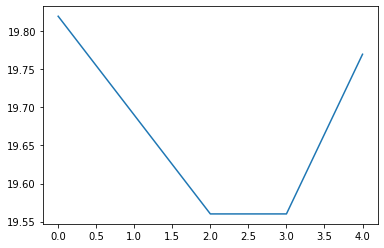

Up flat prob:  -0.6580333184871906 
Down flat prob:  0.6580333184871906 
Flat up prob:  0.23618780575059062 
Flat down prob:  -0.23618780575059062
0.0 -62459.56218692604
Day 207 value: -1876.83 todayPL: $-107.90 $-traded: 382713 return: -0.00490 frac0: 1.0000 frac1: 0.0000


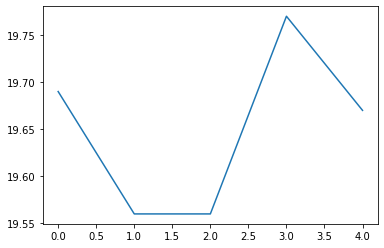

Up flat prob:  -0.06485602116376209 
Down flat prob:  0.06485602116376209 
Flat up prob:  0.2992679660594871 
Flat down prob:  -0.2992679660594871
0.0 -62459.56218692604
Day 208 value: -1826.63 todayPL: $50.20 $-traded: 382772 return: -0.00477 frac0: 1.0000 frac1: 0.0000


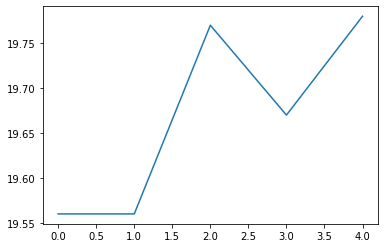

Up flat prob:  0.7219759184905118 
Down flat prob:  -0.7219759184905118 
Flat up prob:  0.6547116570172985 
Flat down prob:  -0.6547116570172985
0.0 -62459.56218692604
Day 209 value: -1882.81 todayPL: $-56.18 $-traded: 382831 return: -0.00492 frac0: 1.0000 frac1: 0.0000


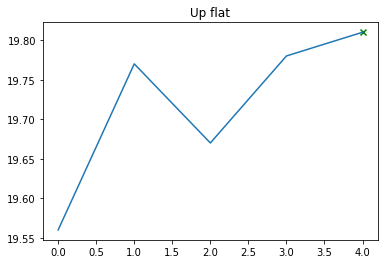

Up flat prob:  0.8438075835369899 
Down flat prob:  -0.8438075835369899 
Flat up prob:  0.6168988874077326 
Flat down prob:  -0.6168988874077326
-8438.075835369898 -62459.56218692604
Day 210 value: -1898.05 todayPL: $-15.25 $-traded: 382851 return: -0.00496 frac0: 1.0000 frac1: 0.0000


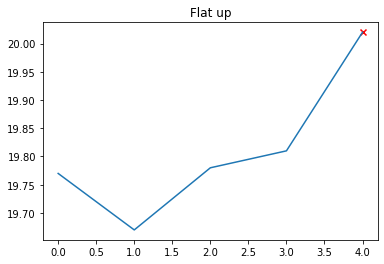

Up flat prob:  0.3775330048960915 
Down flat prob:  -0.3775330048960915 
Flat up prob:  0.9488556147653335 
Flat down prob:  -0.9488556147653335
9488.556147653335 -70897.63802229594
Day 211 value: -2004.40 todayPL: $-106.34 $-traded: 382951 return: -0.00523 frac0: 1.0000 frac1: 0.0000


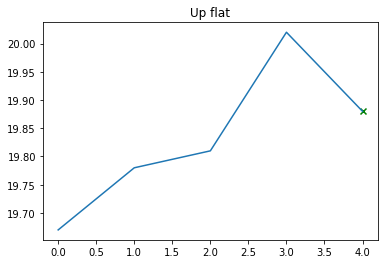

Up flat prob:  0.8039008910037077 
Down flat prob:  -0.8039008910037077 
Flat up prob:  0.4516878632541638 
Flat down prob:  -0.4516878632541638
-8039.008910037077 -61409.08187464261
Day 212 value: -1934.93 todayPL: $69.46 $-traded: 383031 return: -0.00505 frac0: 1.0000 frac1: 0.0000


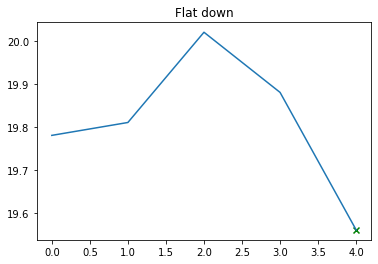

Up flat prob:  0.04569739477786455 
Down flat prob:  -0.04569739477786455 
Flat up prob:  -0.7600847163992069 
Flat down prob:  0.7600847163992069
-7600.847163992069 -69448.09078467969
Day 213 value: -1774.76 todayPL: $160.18 $-traded: 383187 return: -0.00463 frac0: 1.0000 frac1: 0.0000


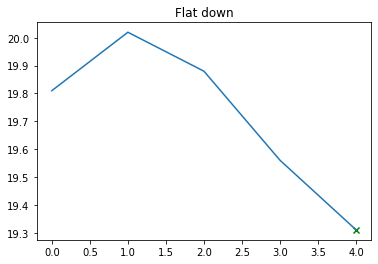

Up flat prob:  -0.3997774797681979 
Down flat prob:  0.3997774797681979 
Flat up prob:  -0.9124627898913351 
Flat down prob:  0.9124627898913351
-9124.627898913352 -77048.93794867177
Day 214 value: -1647.58 todayPL: $127.17 $-traded: 383303 return: -0.00430 frac0: 1.0000 frac1: 0.0000


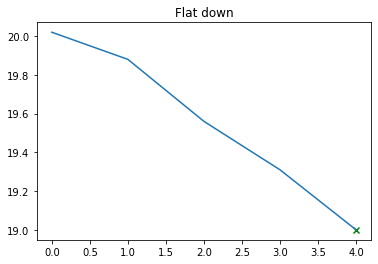

Up flat prob:  -0.7931358596186742 
Down flat prob:  0.7931358596186742 
Flat up prob:  -0.8827434876313321 
Flat down prob:  0.8827434876313321
-8827.434876313322 -86173.56584758512
Day 215 value: -1488.17 todayPL: $159.41 $-traded: 383474 return: -0.00388 frac0: 1.0000 frac1: 0.0000


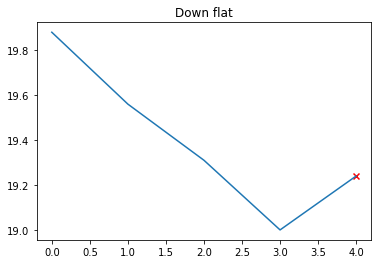

Up flat prob:  -0.9116352679102502 
Down flat prob:  0.9116352679102502 
Flat up prob:  -0.4858243825573977 
Flat down prob:  0.4858243825573977
9116.352679102501 -95001.00072389844
Day 216 value: -1615.08 todayPL: $-126.91 $-traded: 383609 return: -0.00421 frac0: 1.0000 frac1: 0.0000


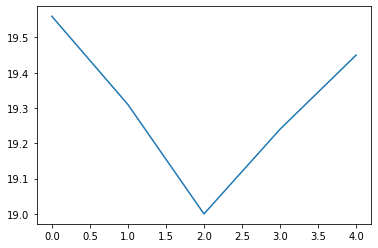

Up flat prob:  -0.618339871567157 
Down flat prob:  0.618339871567157 
Flat up prob:  0.26122119760184226 
Flat down prob:  -0.26122119760184226
0.0 -85884.64804479593
Day 217 value: -1724.56 todayPL: $-109.48 $-traded: 383706 return: -0.00449 frac0: 1.0000 frac1: 0.0000


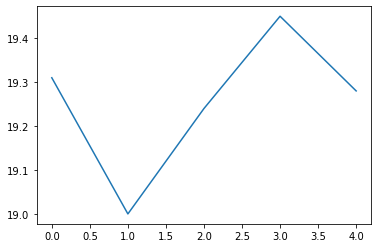

Up flat prob:  0.05832549229004404 
Down flat prob:  -0.05832549229004404 
Flat up prob:  0.26578435825999186 
Flat down prob:  -0.26578435825999186
0.0 -85884.64804479593
Day 218 value: -1637.56 todayPL: $86.99 $-traded: 383783 return: -0.00427 frac0: 1.0000 frac1: 0.0000


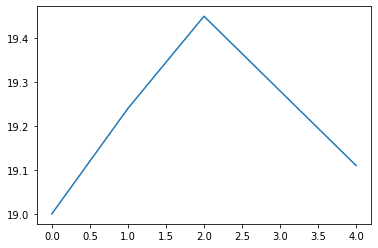

Up flat prob:  0.6608674064282329 
Down flat prob:  -0.6608674064282329 
Flat up prob:  -0.24232123107916936 
Flat down prob:  0.24232123107916936
0.0 -85884.64804479593
Day 219 value: -1549.98 todayPL: $87.58 $-traded: 383878 return: -0.00404 frac0: 1.0000 frac1: 0.0000


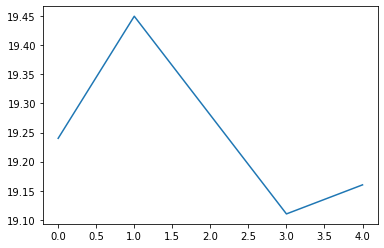

Up flat prob:  -0.2222433249542747 
Down flat prob:  0.2222433249542747 
Flat up prob:  -0.5490249473113994 
Flat down prob:  0.5490249473113994
0.0 -85884.64804479593
Day 220 value: -1576.32 todayPL: $-26.34 $-traded: 383917 return: -0.00411 frac0: 1.0000 frac1: 0.0000


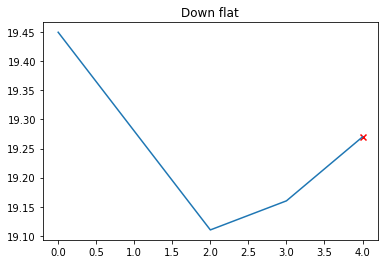

Up flat prob:  -0.864067058987892 
Down flat prob:  0.864067058987892 
Flat up prob:  -0.09491848663377361 
Flat down prob:  0.09491848663377361
8640.67058987892 -85884.64804479593
Day 221 value: -1633.92 todayPL: $-57.60 $-traded: 383975 return: -0.00426 frac0: 1.0000 frac1: 0.0000


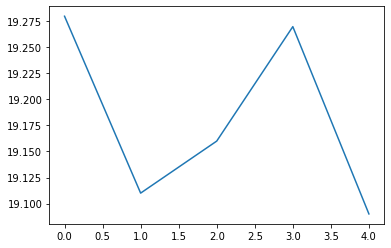

Up flat prob:  -0.5195313462078912 
Down flat prob:  0.5195313462078912 
Flat up prob:  -0.4696862564451313 
Flat down prob:  0.4696862564451313
0.0 -77243.97745491701
Day 222 value: -1541.16 todayPL: $92.76 $-traded: 384070 return: -0.00401 frac0: 1.0000 frac1: 0.0000


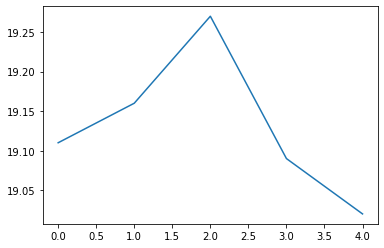

Up flat prob:  0.010261961498421752 
Down flat prob:  -0.010261961498421752 
Flat up prob:  -0.7039157027580317 
Flat down prob:  0.7039157027580317
0.0 -77243.97745491701
Day 223 value: -1504.74 todayPL: $36.42 $-traded: 384108 return: -0.00392 frac0: 1.0000 frac1: 0.0000


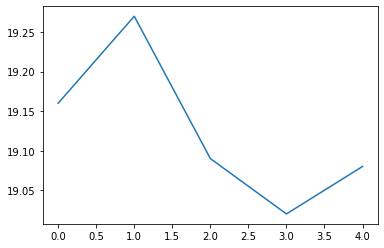

Up flat prob:  -0.4527965307835627 
Down flat prob:  0.4527965307835627 
Flat up prob:  -0.4566466571173758 
Flat down prob:  0.4566466571173758
0.0 -77243.97745491701
Day 224 value: -1536.34 todayPL: $-31.60 $-traded: 384127 return: -0.00400 frac0: 1.0000 frac1: 0.0000


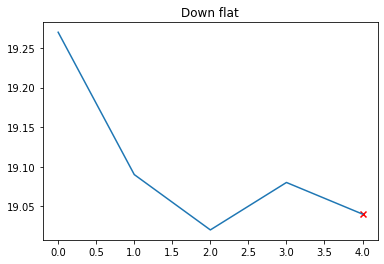

Up flat prob:  -0.9629204617997837 
Down flat prob:  0.9629204617997837 
Flat up prob:  -0.4304472663220581 
Flat down prob:  0.4304472663220581
9629.204617997837 -77243.97745491701
Day 225 value: -1515.47 todayPL: $20.86 $-traded: 384146 return: -0.00395 frac0: 1.0000 frac1: 0.0000


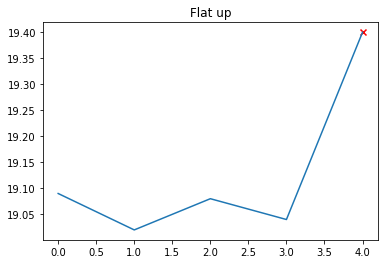

Up flat prob:  0.2700763442415901 
Down flat prob:  -0.2700763442415901 
Flat up prob:  0.9326820660190742 
Flat down prob:  -0.9326820660190742
9326.820660190742 -67614.77283691918
Day 226 value: -1705.44 todayPL: $-189.97 $-traded: 384340 return: -0.00444 frac0: 1.0000 frac1: 0.0000


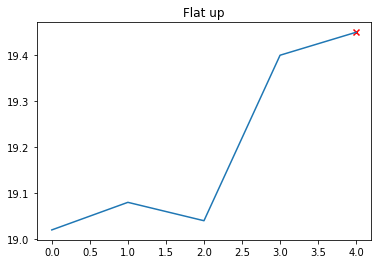

Up flat prob:  0.624872608617402 
Down flat prob:  -0.624872608617402 
Flat up prob:  0.838388176679552 
Flat down prob:  -0.838388176679552
8383.88176679552 -58287.95217672843
Day 227 value: -1731.29 todayPL: $-25.85 $-traded: 384360 return: -0.00450 frac0: 1.0000 frac1: 0.0000


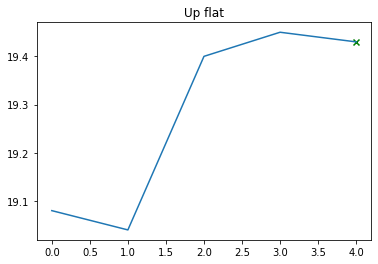

Up flat prob:  0.7517816866085374 
Down flat prob:  -0.7517816866085374 
Flat up prob:  0.5968133554759568 
Flat down prob:  -0.5968133554759568
-7517.8168660853735 -49904.07040993291
Day 228 value: -1721.01 todayPL: $10.28 $-traded: 384360 return: -0.00448 frac0: 1.0000 frac1: 0.0000


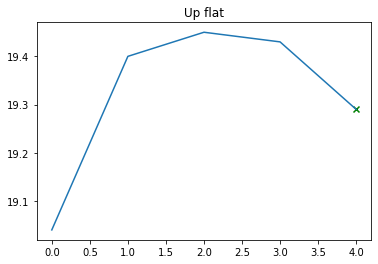

Up flat prob:  0.872349020328944 
Down flat prob:  -0.872349020328944 
Flat up prob:  0.03316504761135946 
Flat down prob:  -0.03316504761135946
-8723.49020328944 -57421.887276018286
Day 229 value: -1649.43 todayPL: $71.57 $-traded: 384437 return: -0.00429 frac0: 1.0000 frac1: 0.0000


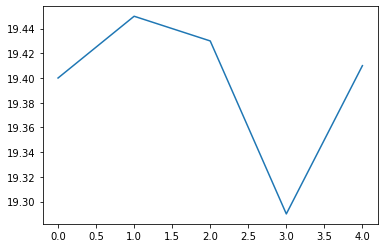

Up flat prob:  -0.19083732316616495 
Down flat prob:  0.19083732316616495 
Flat up prob:  -0.11799514997810993 
Flat down prob:  0.11799514997810993
0.0 -66145.37747930773
Day 230 value: -1711.89 todayPL: $-62.45 $-traded: 384495 return: -0.00445 frac0: 1.0000 frac1: 0.0000


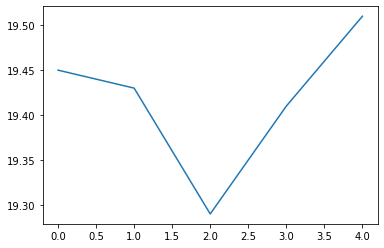

Up flat prob:  -0.18797357787703659 
Down flat prob:  0.18797357787703659 
Flat up prob:  0.5906766655823074 
Flat down prob:  -0.5906766655823074
0.0 -66145.37747930773
Day 231 value: -1763.68 todayPL: $-51.79 $-traded: 384554 return: -0.00459 frac0: 1.0000 frac1: 0.0000


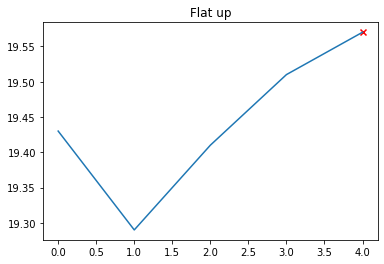

Up flat prob:  0.31337235936365987 
Down flat prob:  -0.31337235936365987 
Flat up prob:  0.7942054877727273 
Flat down prob:  -0.7942054877727273
7942.0548777272725 -66145.37747930773
Day 232 value: -1794.59 todayPL: $-30.92 $-traded: 384593 return: -0.00467 frac0: 1.0000 frac1: 0.0000


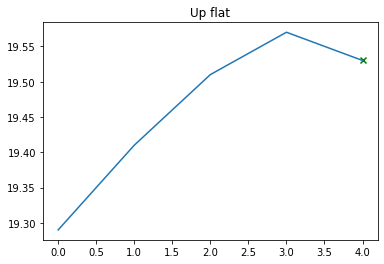

Up flat prob:  0.9548910871713601 
Down flat prob:  -0.9548910871713601 
Flat up prob:  0.5332697829515041 
Flat down prob:  -0.5332697829515041
-9548.9108717136 -58203.32260158046
Day 233 value: -1774.39 todayPL: $20.20 $-traded: 384632 return: -0.00461 frac0: 1.0000 frac1: 0.0000


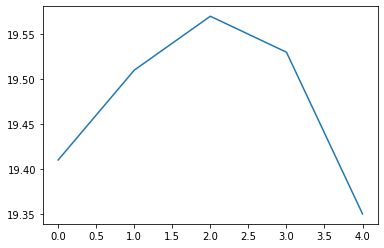

Up flat prob:  0.2980821804821622 
Down flat prob:  -0.2980821804821622 
Flat up prob:  -0.6554320180452431 
Flat down prob:  0.6554320180452431
0.0 -67752.23347329407
Day 234 value: -1682.62 todayPL: $91.77 $-traded: 384709 return: -0.00437 frac0: 1.0000 frac1: 0.0000


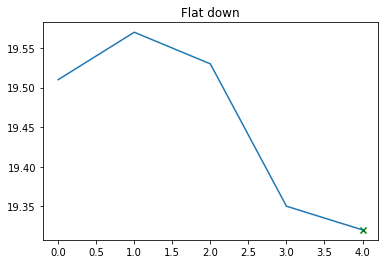

Up flat prob:  -0.47286436617809646 
Down flat prob:  0.47286436617809646 
Flat up prob:  -0.8324294178784728 
Flat down prob:  0.8324294178784728
-8324.294178784729 -67752.23347329407
Day 235 value: -1667.23 todayPL: $15.38 $-traded: 384729 return: -0.00433 frac0: 1.0000 frac1: 0.0000


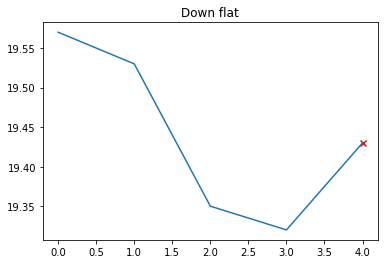

Up flat prob:  -0.7982435920647246 
Down flat prob:  0.7982435920647246 
Flat up prob:  -0.2675785054979426 
Flat down prob:  0.2675785054979426
7982.435920647246 -76076.52765207879
Day 236 value: -1724.39 todayPL: $-57.16 $-traded: 384787 return: -0.00448 frac0: 1.0000 frac1: 0.0000


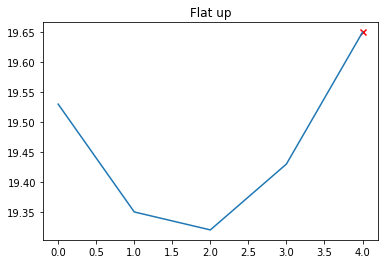

Up flat prob:  -0.14638530249719134 
Down flat prob:  0.14638530249719134 
Flat up prob:  0.7653853572407886 
Flat down prob:  -0.7653853572407886
7653.853572407886 -68094.09173143154
Day 237 value: -1838.06 todayPL: $-113.67 $-traded: 384905 return: -0.00478 frac0: 1.0000 frac1: 0.0000


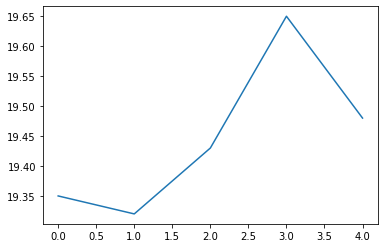

Up flat prob:  0.5887520594264037 
Down flat prob:  -0.5887520594264037 
Flat up prob:  0.40136434099747254 
Flat down prob:  -0.40136434099747254
0.0 -60440.23815902366
Day 238 value: -1752.19 todayPL: $85.87 $-traded: 385002 return: -0.00455 frac0: 1.0000 frac1: 0.0000


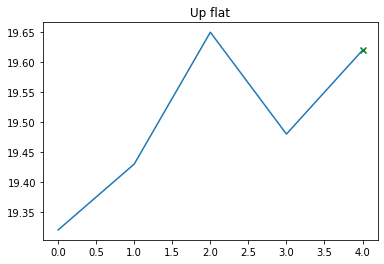

Up flat prob:  0.8212238837265958 
Down flat prob:  -0.8212238837265958 
Flat up prob:  0.542168523021759 
Flat down prob:  -0.542168523021759
-8212.238837265959 -60440.23815902366
Day 239 value: -1824.40 todayPL: $-72.21 $-traded: 385081 return: -0.00474 frac0: 1.0000 frac1: 0.0000


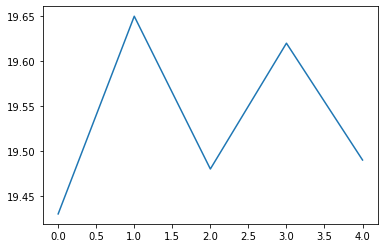

Up flat prob:  0.4601586319253634 
Down flat prob:  -0.4601586319253634 
Flat up prob:  -0.13632069308242023 
Flat down prob:  0.13632069308242023
0.0 -68652.47699628962
Day 240 value: -1758.62 todayPL: $65.78 $-traded: 385159 return: -0.00457 frac0: 1.0000 frac1: 0.0000


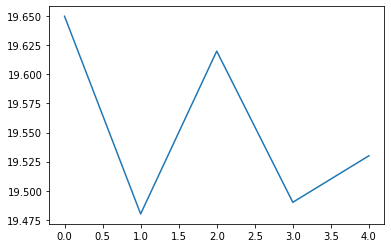

Up flat prob:  -0.6104313195950072 
Down flat prob:  0.6104313195950072 
Flat up prob:  -0.29540410218884583 
Flat down prob:  0.29540410218884583
0.0 -68652.47699628962
Day 241 value: -1779.24 todayPL: $-20.62 $-traded: 385178 return: -0.00462 frac0: 1.0000 frac1: 0.0000


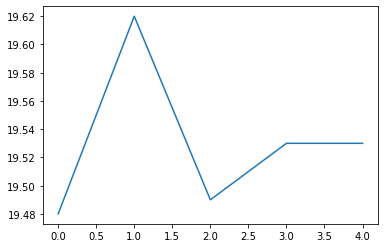

Up flat prob:  0.29796957528744206 
Down flat prob:  -0.29796957528744206 
Flat up prob:  -0.016294182052721685 
Flat down prob:  0.016294182052721685
0.0 -68652.47699628962
Day 242 value: -1779.24 todayPL: $0.00 $-traded: 385178 return: -0.00462 frac0: 1.0000 frac1: 0.0000


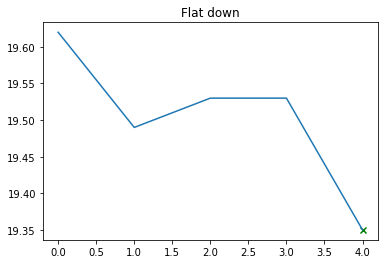

Up flat prob:  -0.6915640536764612 
Down flat prob:  0.6915640536764612 
Flat up prob:  -0.8756658296756585 
Flat down prob:  0.8756658296756585
-8756.658296756585 -68652.47699628962
Day 243 value: -1687.47 todayPL: $91.77 $-traded: 385255 return: -0.00438 frac0: 1.0000 frac1: 0.0000


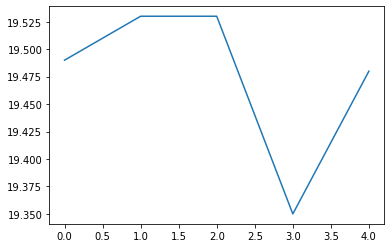

Up flat prob:  -0.25034447497652024 
Down flat prob:  0.25034447497652024 
Flat up prob:  -0.21263350594000982 
Flat down prob:  0.21263350594000982
0.0 -77409.13529304622
Day 244 value: -1754.84 todayPL: $-67.37 $-traded: 385314 return: -0.00455 frac0: 1.0000 frac1: 0.0000


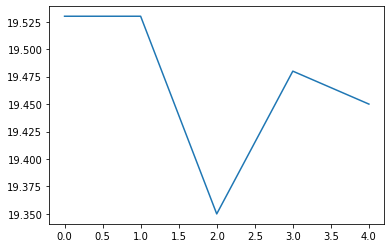

Up flat prob:  -0.5657506409208681 
Down flat prob:  0.5657506409208681 
Flat up prob:  -0.1802016751372698 
Flat down prob:  0.1802016751372698
0.0 -77409.13529304622
Day 245 value: -1739.55 todayPL: $15.29 $-traded: 385333 return: -0.00451 frac0: 1.0000 frac1: 0.0000


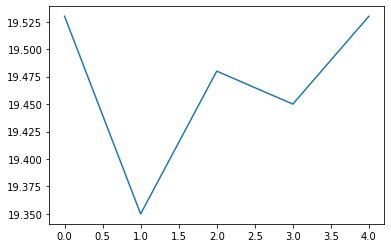

Up flat prob:  -0.23497205934001994 
Down flat prob:  0.23497205934001994 
Flat up prob:  0.44680137446276574 
Flat down prob:  -0.44680137446276574
0.0 -77409.13529304622
Day 246 value: -1780.86 todayPL: $-41.32 $-traded: 385372 return: -0.00462 frac0: 1.0000 frac1: 0.0000


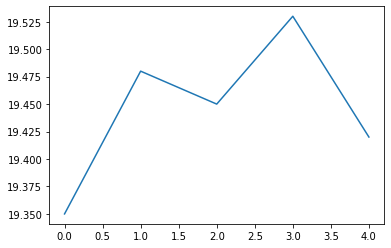

Up flat prob:  0.7480386183310279 
Down flat prob:  -0.7480386183310279 
Flat up prob:  -0.012914787534274903 
Flat down prob:  0.012914787534274903
0.0 -77409.13529304622
Day 247 value: -1724.74 todayPL: $56.13 $-traded: 385411 return: -0.00448 frac0: 1.0000 frac1: 0.0000


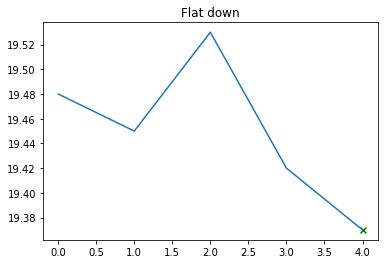

Up flat prob:  -0.34988307862037193 
Down flat prob:  0.34988307862037193 
Flat up prob:  -0.8105264958444883 
Flat down prob:  0.8105264958444883
-8105.264958444884 -77409.13529304622
Day 248 value: -1699.23 todayPL: $25.51 $-traded: 385450 return: -0.00441 frac0: 1.0000 frac1: 0.0000


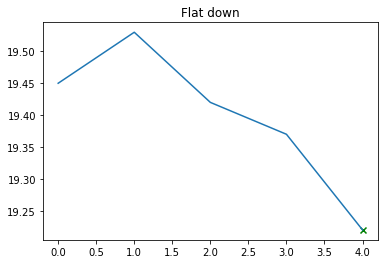

Up flat prob:  -0.4663379944777781 
Down flat prob:  0.4663379944777781 
Flat up prob:  -0.9390567262170554 
Flat down prob:  0.9390567262170554
-9390.567262170554 -85514.4002514911
Day 249 value: -1622.21 todayPL: $77.02 $-traded: 385527 return: -0.00421 frac0: 1.0000 frac1: 0.0000


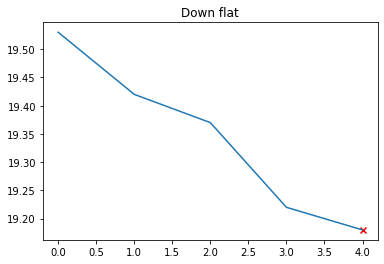

Up flat prob:  -0.8537019356815052 
Down flat prob:  0.8537019356815052 
Flat up prob:  -0.8058702417067481 
Flat down prob:  0.8058702417067481
8537.019356815052 -94904.96751366166
Day 250 value: -1601.51 todayPL: $20.70 $-traded: 385546 return: -0.00415 frac0: 1.0000 frac1: 0.0000
=====
mean(PL): -7
return: -0.00415
annSharpe(PL): -1.26 
totDvolume: 385546 


In [703]:
# eval.py

#!/usr/bin/envblah python

import numpy as np
import pandas as pd

# Algorithm testing file. 
# Quantitative judging will be determined from output of this program.
# Judging will use unseeen, future price data from the same universe.

nInst = 0
nt = 0

# Commission rate.
commRate = 0.0050

# Dollar position limit (maximum absolute dollar value of any individual stock position).
dlrPosLimit = 10000

def loadPrices(fn):
    global nt, nInst
    df=pd.read_csv(fn, sep='\s+', header=None, index_col=None)
    nt, nInst = df.values.shape
    return (df.values).T

pricesFile="./prices250.txt"
prcAll = loadPrices(pricesFile)
print ("Loaded %d instruments for %d days" % (nInst, nt))

def calcPL(prcHist):
    cash = 0
    curPos = np.zeros(nInst)
    totDVolume = 0
    totDVolume0 = 0
    totDVolume1 = 0
    frac0 = 0.
    frac1 = 0.
    value = 0
    todayPLL = []
    (_,nt) = prcHist.shape
    
    global currentPos
    currentPos = np.zeros(100)
    global buys
    buys = []
    global sells 
    sells = []
#     global previousShape
#     previousShape = 'flat'
    global window
    window = 5

    for t in range(window,251):
        prcHistSoFar = prcHist[:,:t]
        currentPos += shapePos(currentPos,prcHistSoFar)
        newPosOrig = currentPos
        curPrices = prcHistSoFar[:,-1]
        posLimits = np.array([int(x) for x in dlrPosLimit / curPrices])
        newPos = np.array([int(p) for p in np.clip(newPosOrig, -posLimits, posLimits)])
        deltaPos = newPos - curPos
        dvolumes = curPrices * np.abs(deltaPos)
        dvolume0 = np.sum(dvolumes[:50])
        dvolume1 = np.sum(dvolumes[50:])
        dvolume = np.sum(dvolumes)
        totDVolume += dvolume
        totDVolume0 += dvolume0
        totDVolume1 += dvolume1
        comm = dvolume * commRate
        cash -= curPrices.dot(deltaPos) + comm
        curPos = np.array(newPos)
        posValue = curPos.dot(curPrices)
        todayPL = cash + posValue - value
        todayPLL.append(todayPL)
        value = cash + posValue
        ret = 0.0
        if (totDVolume > 0):
            ret = value / totDVolume
            frac0 = totDVolume0 / totDVolume
            frac1 = totDVolume1 / totDVolume
        print ("Day %d value: %.2lf todayPL: $%.2lf $-traded: %.0lf return: %.5lf frac0: %.4lf frac1: %.4lf" % (t,value, todayPL, totDVolume, ret, frac0, frac1))
    pll = np.array(todayPLL)
    (plmu,plstd) = (np.mean(pll), np.std(pll))
    annSharpe = 0.0
    if (plstd > 0):
        annSharpe = 16 * plmu / plstd
    return (plmu, ret, annSharpe, totDVolume)

# Output.
(meanpl, ret, sharpe, dvol) = calcPL(prcAll)
print ("=====")
print ("mean(PL): %.0lf" % meanpl)
print ("return: %.5lf" % ret)
print ("annSharpe(PL): %.2lf " % sharpe)
print ("totDvolume: %.0lf " % dvol)

In [704]:
print ("=====")
print ("mean(PL): %.0lf" % meanpl)
print ("return: %.5lf" % ret)
print ("annSharpe(PL): %.2lf " % sharpe)
print ("totDvolume: %.0lf " % dvol)

=====
mean(PL): -7
return: -0.00415
annSharpe(PL): -1.26 
totDvolume: 385546 


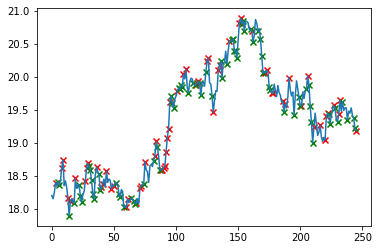

In [705]:
plt.plot(prices[window-1:,0])
plt.scatter([i[0] for i in buys], [i[1] for i in buys], marker = 'x', color='red')
plt.scatter([i[0] for i in sells], [i[1] for i in sells], marker = 'x', color='green')

In [702]:
def shapePos(currentPos,prcSoFar):
    
    # Window threshold subject to optimisation
    #window = 100
    
    # Focus on first stock for now, then expand
    shape = prcSoFar[0,:]
    shape_reshaped = shape[-window:].reshape(1,window)
    
    # Create empty position vector
    pos = np.zeros(100)
    
    # Define exponential patterns to look for matches against
    up_flat = -np.exp(-5*np.linspace(0,1,window))
    down_flat = np.exp(-5*np.linspace(0,1,window))
    flat_up = np.exp(5*np.linspace(0,1,window))
    flat_down = -np.exp(5*np.linspace(0,1,window))
    
    # Stack matrixes for cross-correlation calculations
    shape_data = np.concatenate((shape_reshaped,(up_flat,down_flat,flat_up,flat_down)), axis=0)
    
    # Calculate correlation
    shape_corr = np.corrcoef(shape_data,rowvar=True)
    
    ## Looking ok
    plt.plot(shape[-window:])
    # Categorise current window
    if shape_corr[-4,0] > shape_corr[-2,0]:
        if (shape_corr[-4,0] > 0.75):
#             if (currentPos[0] == 0): 
#                 pos[0] = -100*shape_corr[-4,0]
#                 plt.title("Up flat")
#                 plt.scatter(window-1, shape[-1], marker = 'x', color='green')
#                 sells.append((len(shape)-101,shape[-1]))
#             elif (currentPos[0] > 0):
#                 pos[0] = -currentPos[0]
#                 plt.title("Up flat")
#                 plt.scatter(window-1, shape[-1], marker = 'x', color='green')
#                 sells.append((len(shape)-101,shape[-1]))
            pos[0] = -10000*shape_corr[-4,0]
            plt.title("Up flat")
            plt.scatter(window-1, shape[-1], marker = 'x', color='green')
            sells.append((len(shape)-window,shape[-1]))
    else:
        if (shape_corr[-2,0] > 0.75):
#             if (currentPos[0] == 0): 
#                 pos[0] = 100*shape_corr[-2,0]
#                 plt.title("Flat up")
#                 plt.scatter(window-1, shape[-1], marker = 'x', color='red')
#                 buys.append((len(shape)-101,shape[-1]))
#             elif (currentPos[0] < 0): 
#                 pos[0] = -currentPos[0]
#                 plt.title("Flat up")
#                 plt.scatter(window-1, shape[-1], marker = 'x', color='red')
#                 buys.append((len(shape)-101,shape[-1]))
            pos[0] = 10000*shape_corr[-2,0]
            plt.title("Flat up")
            plt.scatter(window-1, shape[-1], marker = 'x', color='red')
            buys.append((len(shape)-window,shape[-1]))
        
    if shape_corr[-3,0] > shape_corr[-1,0]:
        if (shape_corr[-3,0] > 0.75):
#             if (currentPos[0] == 0): 
#                 pos[0] = 100*shape_corr[-3,0]
#                 plt.title("Down flat")
#                 plt.scatter(window-1, shape[-1], marker = 'x', color='red')
#                 buys.append((len(shape)-101,shape[-1]))
#             elif (currentPos[0] < 0): 
#                 pos[0] = -currentPos[0]
#                 plt.title("Down flat")
#                 plt.scatter(window-1, shape[-1], marker = 'x', color='red')
#                 buys.append((len(shape)-101,shape[-1]))
            pos[0] = 10000*shape_corr[-3,0]
            plt.title("Down flat")
            plt.scatter(window-1, shape[-1], marker = 'x', color='red')
            buys.append((len(shape)-window,shape[-1]))
    else:
        if (shape_corr[-1,0] > 0.75):
#             if (currentPos[0] == 0): 
#                 pos[0] = -100*shape_corr[-1,0]
#                 plt.title("Flat down")
#                 plt.scatter(window-1, shape[-1], marker = 'x', color='green')
#                 sells.append((len(shape)-window,shape[-1]))
#             elif (currentPos[0] > 0): 
#                 pos[0] = -currentPos[0]
#                 plt.title("Flat down")
#                 plt.scatter(window-1, shape[-1], marker = 'x', color='green')
#                 sells.append((len(shape)-window,shape[-1]))
            pos[0] = -10000*shape_corr[-1,0]
            plt.title("Flat down")
            plt.scatter(window-1, shape[-1], marker = 'x', color='green')
            sells.append((len(shape)-window,shape[-1]))
            
    plt.show()
    print("Up flat prob: ", shape_corr[-4,0], "\nDown flat prob: ", shape_corr[-3,0], "\nFlat up prob: ", shape_corr[-2,0], "\nFlat down prob: ", shape_corr[-1,0])
        
    print(pos[0], currentPos[0])
    
    return pos

In [332]:
# import numpy as np

# def shapePos(currentPos, prcSoFar):
        
#     # Window size subject to optimisation
#     window = 3
    
#     # Note: prcSoFar is a transposed version of prices250.txt so stocks are the rows
#     shape = prcSoFar[0,]
    
#     # For volatile testing, position of 0's for first 50 stocks
#     pos = np.zeros(100)
    
#     straight_line_ref = np.linspace(1,window,window).reshape(1,window)
#     straight_line = np.vstack((shape[-window:],straight_line_ref))    
#     log = np.vstack((shape[-window:,], 10000*np.log(straight_line_ref)))
#     neg_log = np.vstack((shape[-window:,], -1*np.log(40*straight_line_ref)))

#     corr = np.corrcoef(straight_line,rowvar=True)
#     corr_log = np.corrcoef(log,rowvar=True)
#     corr_neg_log = np.corrcoef(neg_log,rowvar=True)

#     up = np.where(corr[-1] > 0.5)
#     up_flat = np.where(corr_log[-1] > 0.5)
#     up_flat = up_flat[0][:-1]
    
#     up_flat_list = []
#     up_list = []

#     for index in up_flat:
#         print(corr_log[-1,index], corr[-1,index])
#         if (corr_log[-1, index] > corr[-1, index]-0.1): up_flat_list.append(index)
#         else: up_list.append(index)
        
#     down = np.where(corr[-1] < -0.5)
#     down_flat = np.where(corr_neg_log[-1] > 0.5)
#     down_flat = down_flat[0][:-1]
    
#     flat = np.where((corr[-1] >-0.2) & (corr[-1] < 0.2))
    
#     down_flat_list = []
#     down_list = []

#     for index in down_flat:
#         print(corr_neg_log[-1,index], corr[-1,index])
#         if (corr_neg_log[-1, index] > -1*corr[-1, index]): down_flat_list.append(index)
#         else: down_list.append(index)
        
#     plt.plot(shape[-window:])
#     if (len(up_list)):
#         plt.title("Up")
#         plt.scatter(window-1, shape[-1], marker = 'x', color='red')
#         buys.append((len(shape)-201,shape[-1]))
#     elif (len(up_flat_list)):
#         plt.title("Up flattening")
#         plt.scatter(window-1, shape[-1], marker = 'x', color='green')
#         sells.append((len(shape)-201,shape[-1]))
#     elif (len(down_list)):
#         plt.title("Down")
#         plt.scatter(window-1, shape[-1], marker = 'x', color='green')
#         sells.append((len(shape)-201,shape[-1]))
#     elif (len(down_flat_list)):
#         plt.title("Down flattening")
#         plt.scatter(window-1, shape[-1], marker = 'x', color='red')
#         buys.append((len(shape)-201,shape[-1]))
#     elif (len(flat[0])):
#         plt.title("Flat")
#         if (currentPos[0] > 0): 
#             plt.scatter(window-1, shape[-1], marker = 'x', color='green')
#             sells.append((len(shape)-201,shape[-1]))
#         if (currentPos[0] < 0): 
#             plt.scatter(window-1, shape[-1], marker = 'x', color='red')
#             buys.append((len(shape)-201,shape[-1]))
#     plt.show()
    
#     print("Flat score: ", corr[-1,0], "Up flat: ", corr_log[-1,0], "Down flat: ", corr_neg_log[-1,0])
    
#     for num in up_list:
#         pos[num] = 1*1000*corr[-1,num]
#     for num in up_flat_list:
#         pos[num] = -1*1000*corr_log[-1,num]
#     for num in down_list: 
#         pos[num] = 1000*corr[-1,num]
#     for num in down_flat_list: 
#         pos[num] = -1*1000*corr[-1,num]
# #     for num in flat[0]: 
# #         currentPos[num] != 0: pos[num] = 2*currentPos[num]*-1

#     print(pos[0])
#     return pos

# Exploring overall correlation and lagging & leading indicators

In [ ]:
data_double = np.concatenate((data[201:250,:], data[200:249,:]), axis=1)
corr_test = np.corrcoef(data_double,rowvar=False)

In [ ]:
# Sort for specific correlation
np.argsort(corr_test[41])

In [83]:
# Minimum total score
corr_test = np.corrcoef(data_double)
np.min(corr_test)

-0.950781094710656

In [84]:
np.where(corr_test==np.min(corr_test))

(array([ 26, 149]), array([149,  26]))

<AxesSubplot:>

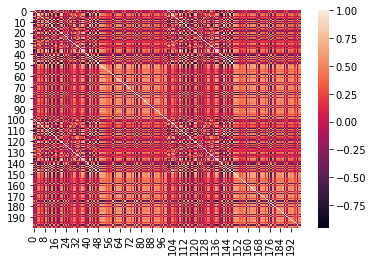

In [70]:
sns.heatmap(corr_test)

In [32]:
np.argsort(corr_test)

array([[ 11,  37, 106, ...,  18, 100,   0],
       [143,  43,  10, ...,  17, 101,   1],
       [ 46, 146, 111, ...,  41, 102,   2],
       ...,
       [136,  36,  21, ..., 177,  75, 197],
       [108,   8,  59, ...,  55, 181, 198],
       [ 41, 141,  59, ...,  93,  50, 199]])

In [33]:
corr_test[0,118]

0.7159248479213203

In [34]:
max_min = np.min(corr_test[0])

for row in corr_test:
    min_row = np.min(row)
    print(min_row)
    if min_row > max_min: max_min = min_row
        
print(max_min)

-0.7512174898425874
-0.4856767065597072
-0.713013242345403
-0.8558235760238285
-0.8284836339560058
-0.7481559245577664
-0.7694696270814373
-0.48260311368960185
-0.9265014793416253
-0.9169359396304086
-0.75526693711436
-0.8578124068421848
-0.8250667387271089
-0.9447734347978372
-0.8028032512675376
-0.8671909576596164
-0.6821765172883413
-0.5343017496040133
-0.8791847197363931
-0.5761919962799786
-0.879184719736393
-0.9084726822280502
-0.9259470480995158
-0.5176105147741898
-0.5051054695633913
-0.7449979919655478
-0.9424913988396396
-0.5251579090556853
-0.7045956838256028
-0.5023053331689528
-0.7833213736310736
-0.7987171965163952
-0.628936501572372
-0.5849121332613179
-0.6759976492402392
-0.6427104169660159
-0.8672834119057449
-0.7719904226339699
-0.8644443550034208
-0.6246976639834989
-0.715611683949707
-0.9536871841751734
-0.9195445400570439
-0.8644443550034207
-0.8124504493050095
-0.7691867582298877
-0.825969475911635
-0.7857461303960461
-0.8240485575156676
-0.9536871841751734
-0.711

<AxesSubplot:>

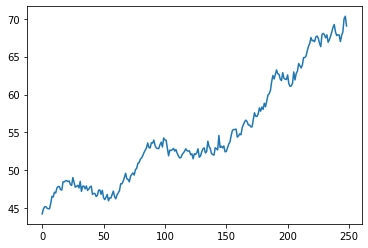

In [35]:
sns.lineplot(data = data_double[:,41])
#plt.axvline(x=78)

<AxesSubplot:>

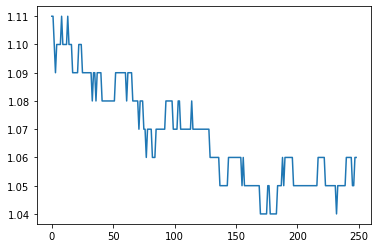

In [36]:
sns.lineplot(data = data_double[:,11])
#plt.axvline(x=83)

In [37]:
data_double[145:165,105]

array([ 9.8 ,  9.82, 10.09, 10.13, 10.05,  9.82,  9.66,  9.52,  9.54,
        9.35,  9.34,  9.33,  9.44,  9.2 ,  9.29,  9.38,  9.27,  9.22,
        9.25,  9.25])

In [38]:
data_double[140:160,0]

array([19.98, 20.21, 20.22, 20.39, 20.2 , 20.4 , 20.55, 20.55, 20.56,
       20.58, 20.39, 20.39, 20.29, 20.55, 20.82, 20.89, 20.81, 20.85,
       20.7 , 20.85])

# Visualising all 100 instruments

0


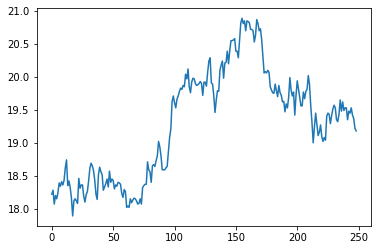

1


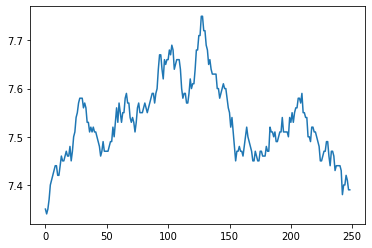

2


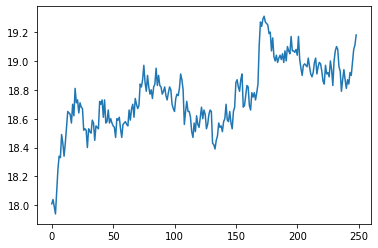

3


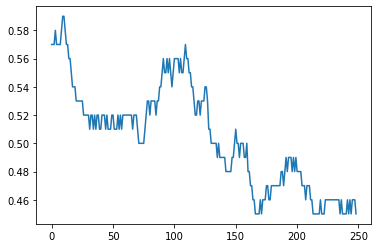

4


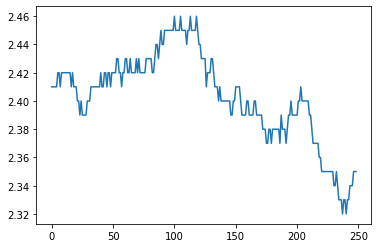

5


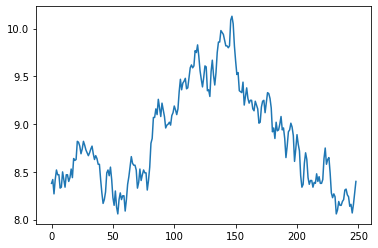

6


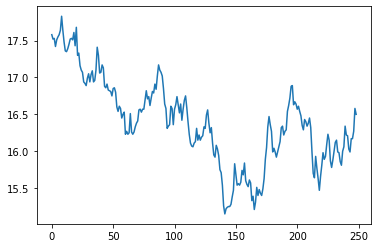

7


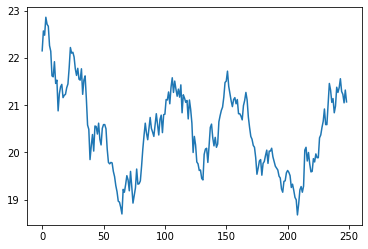

8


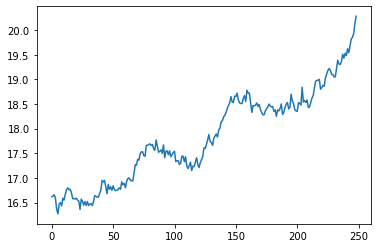

9


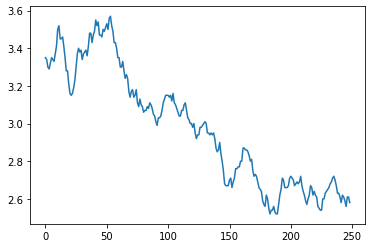

10


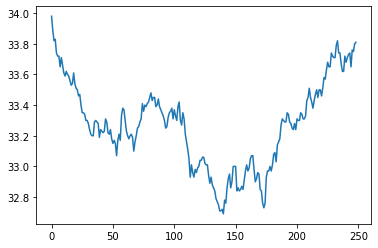

11


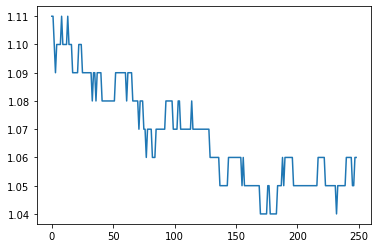

12


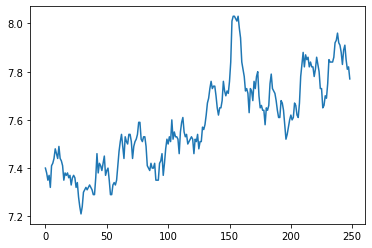

13


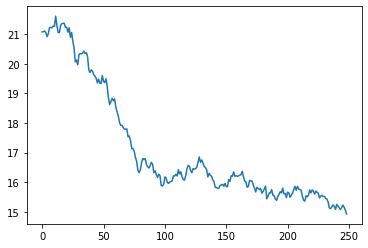

14


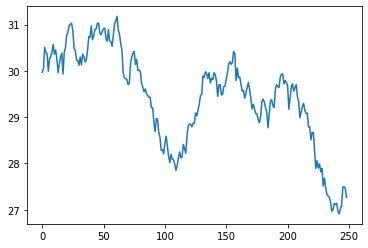

15


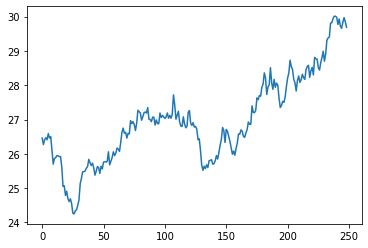

16


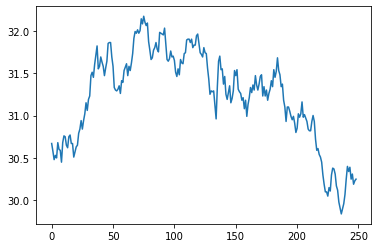

17


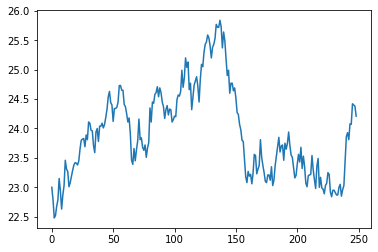

18


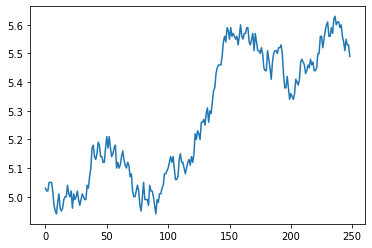

19


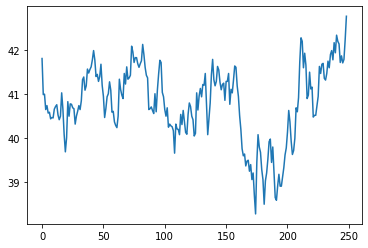

20


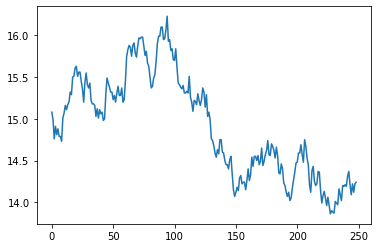

21


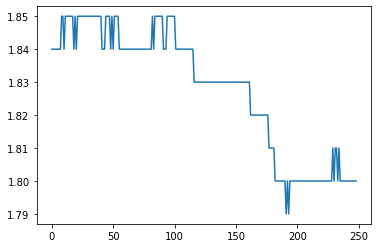

22


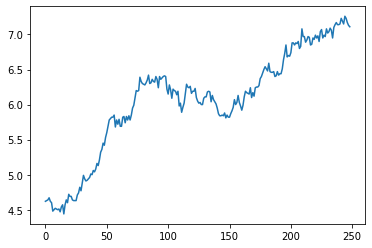

23


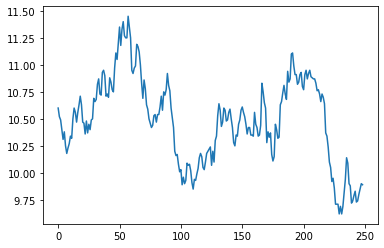

24


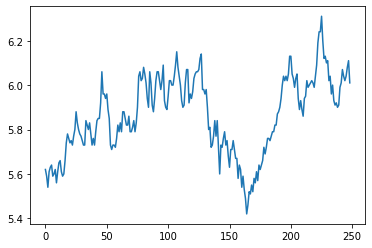

25


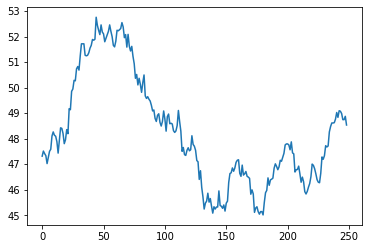

26


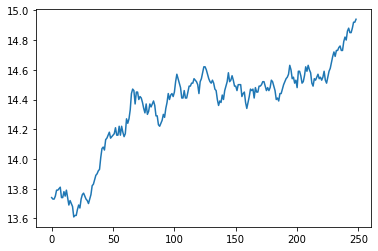

27


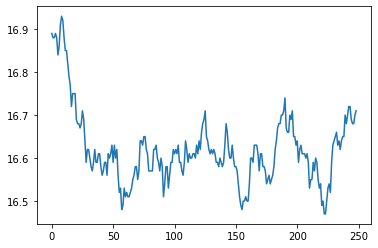

28


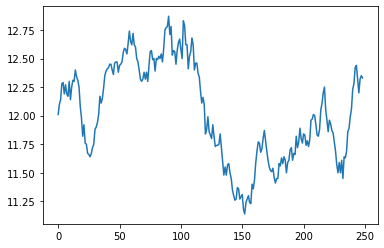

29


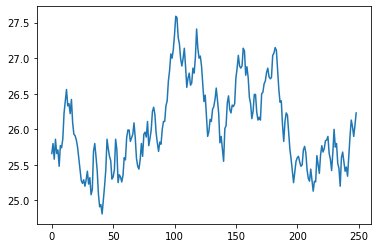

30


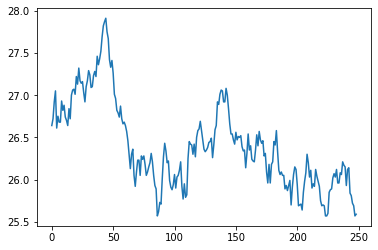

31


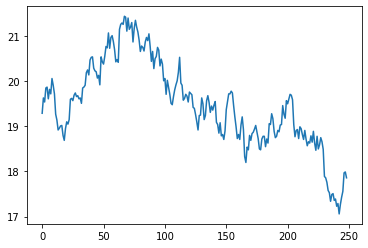

32


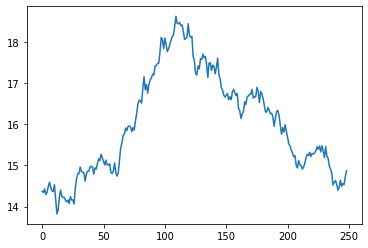

33


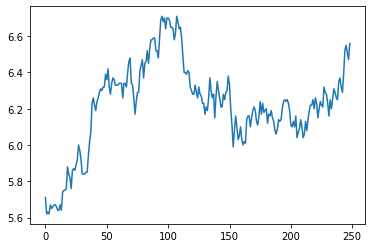

34


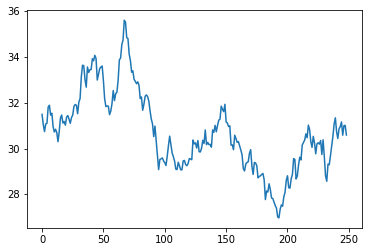

35


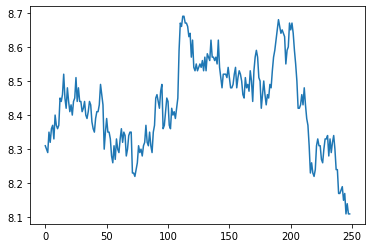

36


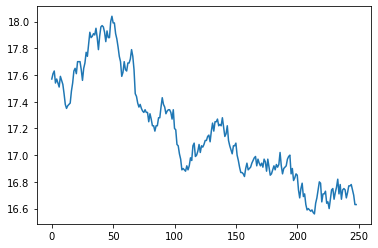

37


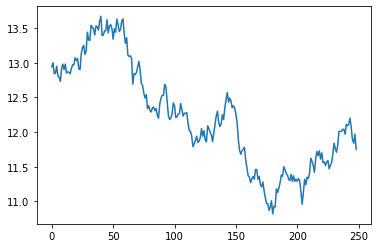

38


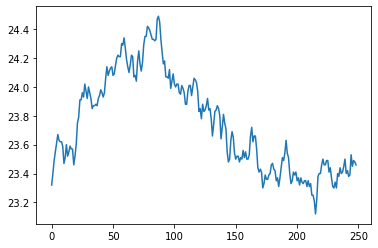

39


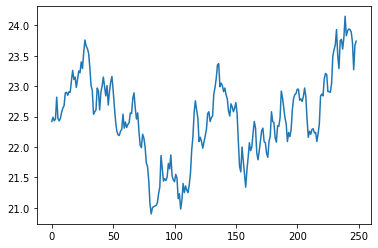

40


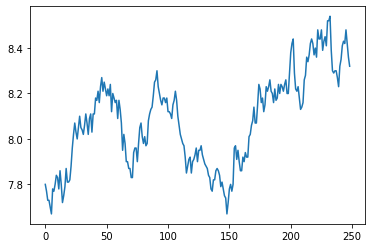

41


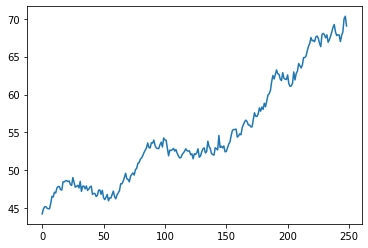

42


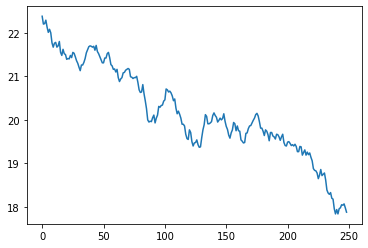

43


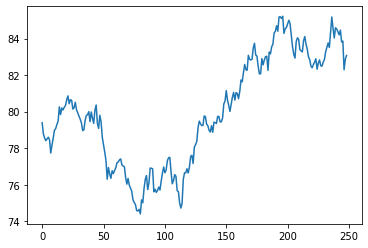

44


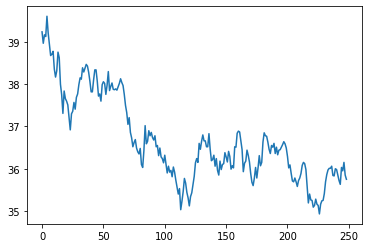

45


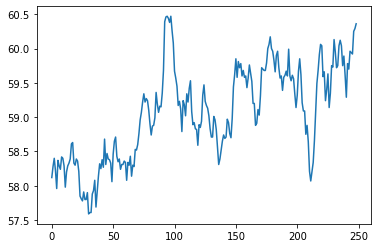

46


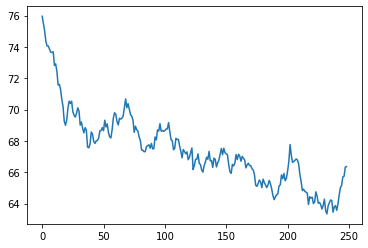

47


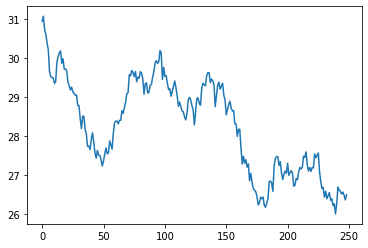

48


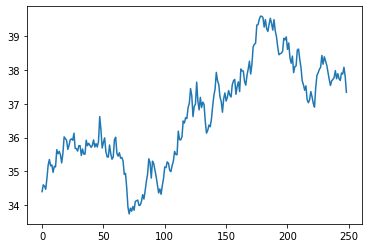

49


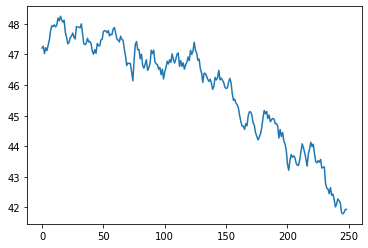

50


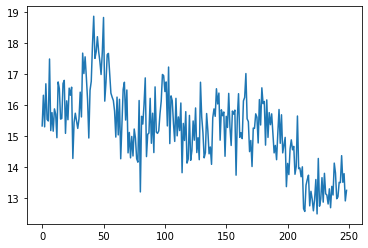

51


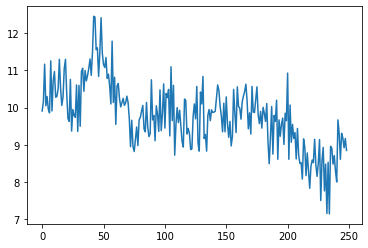

52


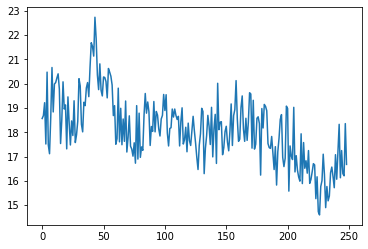

53


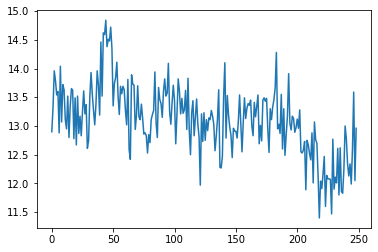

54


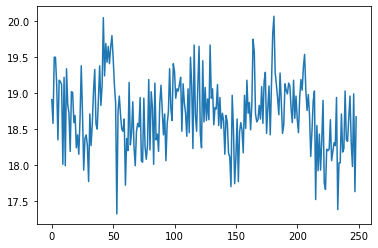

55


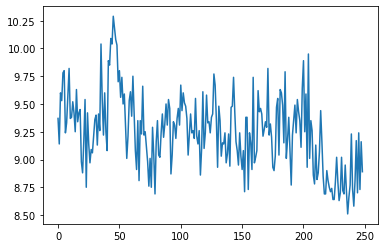

56


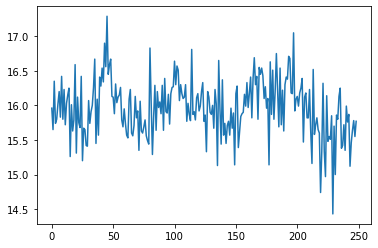

57


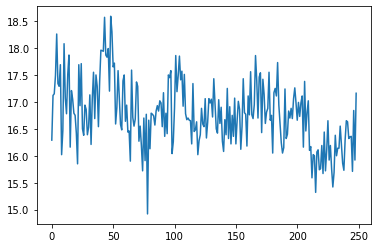

58


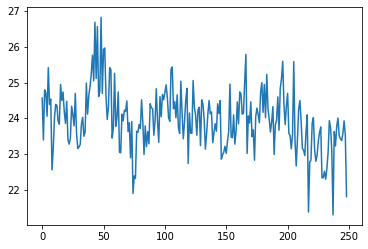

59


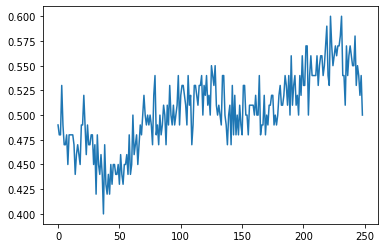

60


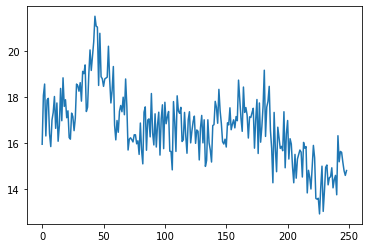

61


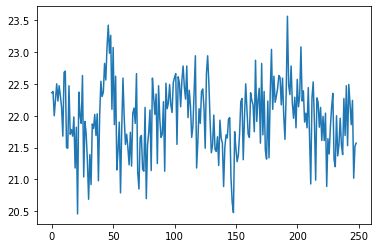

62


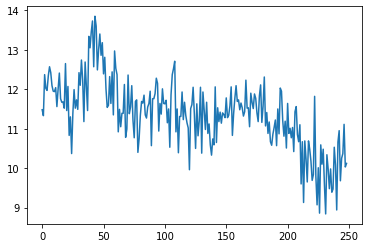

63


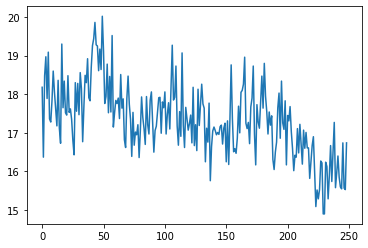

64


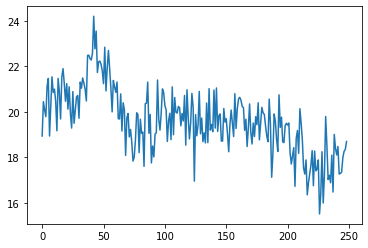

65


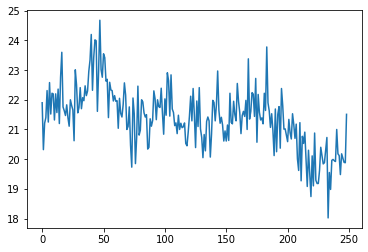

66


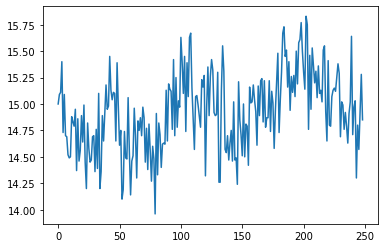

67


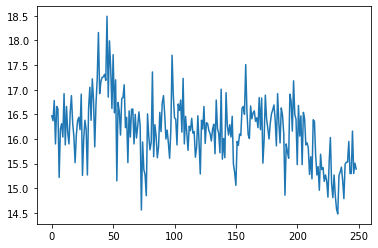

68


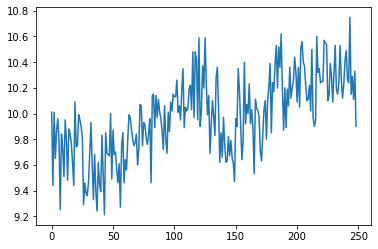

69


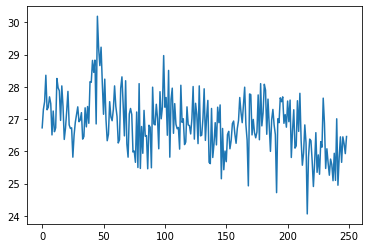

70


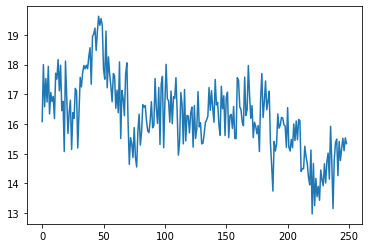

71


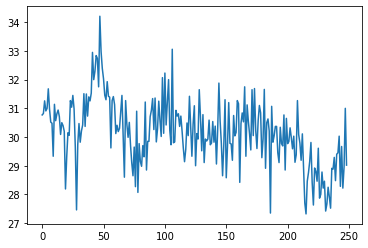

72


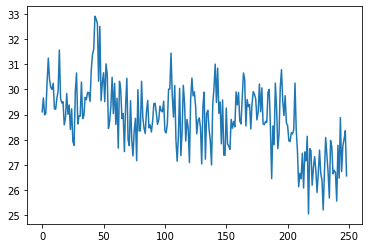

73


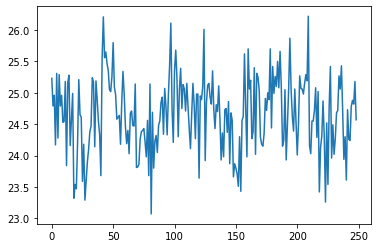

74


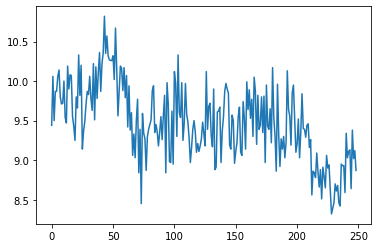

75


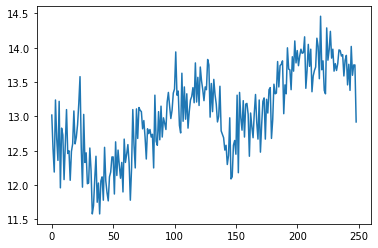

76


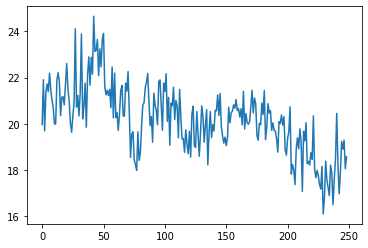

77


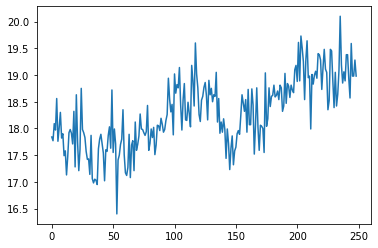

78


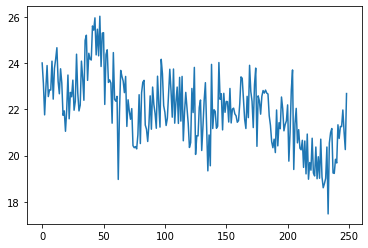

79


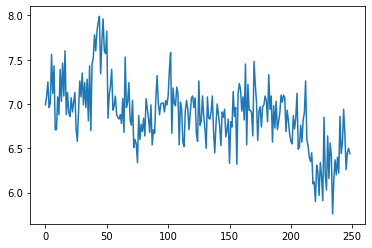

80


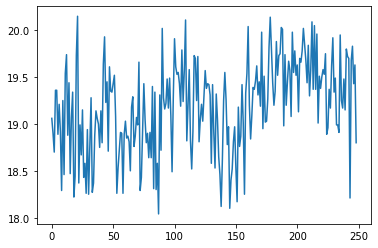

81


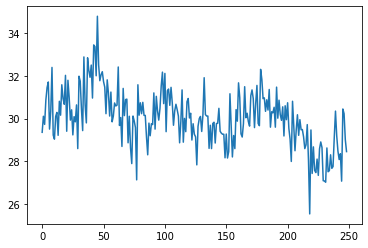

82


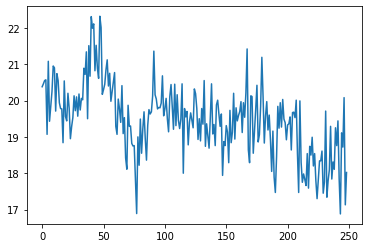

83


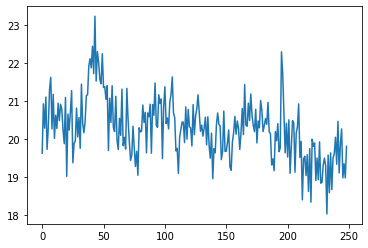

84


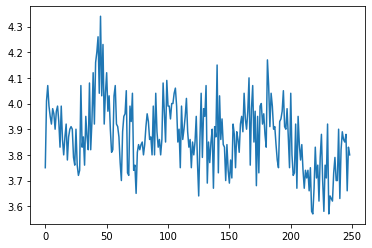

85


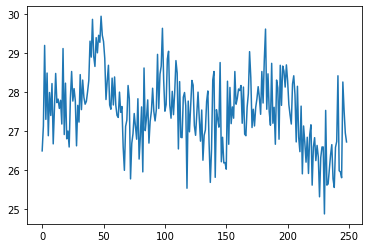

86


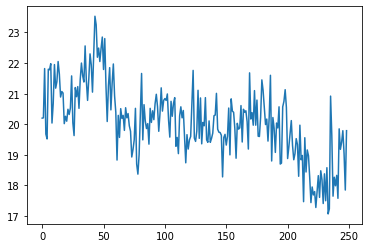

87


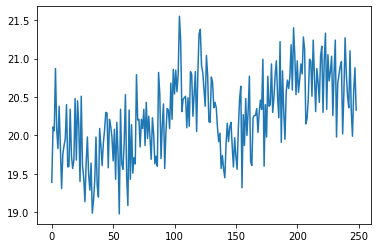

88


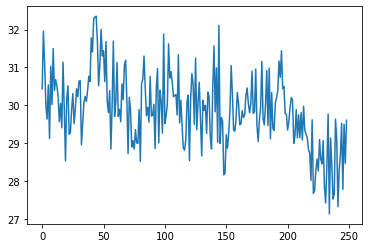

89


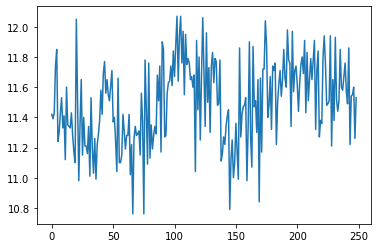

90


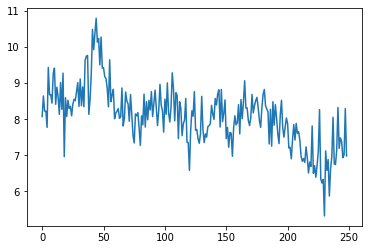

91


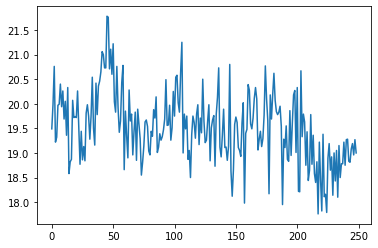

92


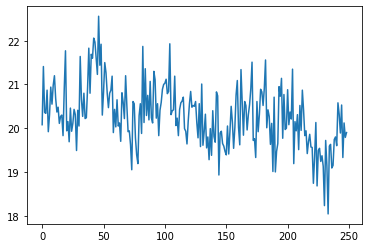

93


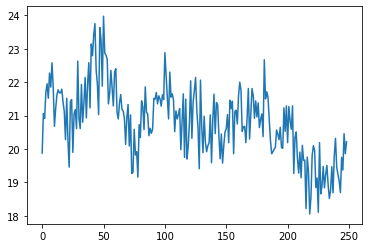

94


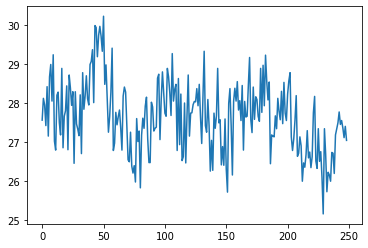

95


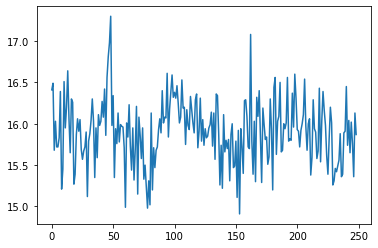

96


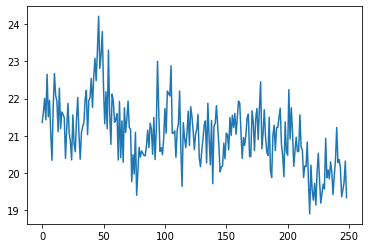

97


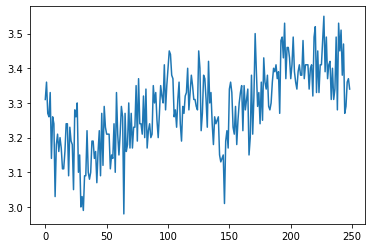

98


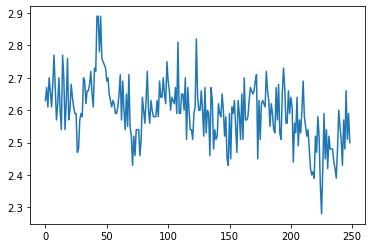

99


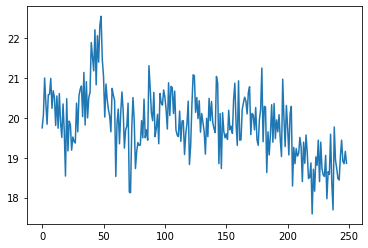

In [39]:
for i in range(100):
    sns.lineplot(data = data_double[:,i])
    print(i)
    plt.show()